In [1]:
from scipy.optimize  import curve_fit, fsolve
from scipy.special   import erf, betainc, gamma

from ROOT import TFile,TMVA,TH2F, TCanvas,TTree
import array, sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

from root_pandas import read_root

Welcome to JupyROOT 6.18/04


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:34: RuntimeWarning: ROOT 6.18/04 is currently active but you installed root_numpy against ROOT 6.05/02. Please consider reinstalling root_numpy for this ROOT version.
  RuntimeWarning)
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.15.0 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
# My Dependencies
from Samples.Data      import Data
from Plotter.Helper    import Helper
from Plotter.Plotter   import Plotter
from Cuts.Cuts         import Cuts

In [3]:
import os, datetime
from time import time

In [4]:
def dirStructure(figpath):
    date = datetime.datetime.now()
    fileName = str(date.year) + str(date.month) + str(date.day) + "/"
    
    try:
        os.mkdir(figpath+fileName)    
    except:
        print("Directory "+fileName+ " already exist")
        
    try :
        os.mkdir(figpath+fileName+'ShowerShapeMVA/')
    except:
        print("Directory "+fileName+'ShowerShapeMVA/ already exist')
    
    dirSubStructure(figpath + fileName + "Stacked/")
    dirSubStructure(figpath + fileName + "Unstacked/")
    
    dirSubStructure(figpath + fileName + "nJets/")
    for i in range(5):
        dirSubStructure(figpath + fileName + "nJets/Stacked_nJets"+str(i)+"/")
        dirSubStructure(figpath + fileName + "nJets/Unstacked_nJets"+str(i)+"/")
    
    return figpath+fileName  

def dirSubStructure(path):
    try:
        os.mkdir(path)
    except:
        print("Subdirectory for " + path + " already exists or failed.")
    
    try:
        os.mkdir(path+"log")
        os.mkdir(path+"log/Mult")
        os.mkdir(path+"linear")
        os.mkdir(path+"linear/Mult")
    except:
        print("Subdirectory for " + path + " already exists or failed.")

In [5]:
selection = 'mumug'
#selection = 'elelg'
#selection = 'ee'

#era = "2016"
#era = "2017"
era = "2018"

if   era == "2016":
    run = ['B','C','D','E','F','G','H']
    #DataGen = 'rereco'
    DataGen = 'legacy'
    if DataGen == 'legacy':
        #SampleSet = 'MatchZGpaper'
        #SampleSet = 'Rerun'
        SampleSet = 'Correction'
    else:
        SampleSet = 'MatchZGpaper_newAna'
elif era == "2017":
    if selection == "mumug":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        #SampleSet = 'V1'
        #SampleSet = 'V2_puWeight'
        #SampleSet = 'V2_puWeight_phID'
        #SampleSet = "V4_phID_isConv"
        #SampleSet = "V4_phID_isConv_MINUIT"
        #SampleSet  = "V5_mediumID"
        #SampleSet  = "V6_lPhoton"
        SampleSet  = "V6_Accept"
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ]          
    elif selection == "mumu":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        #SampleSet = 'V1'
        #SampleSet = 'V2_puWeight'
        SampleSet = 'V2_puWeight_phID'
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ]        
    elif selection == "ee":
        run = ['B','C','D','E','F']
        #run = ['D']
        DataGen = 'rereco'
        #SampleSet = 'EfficiencyCorrection/files_zee/CorrShower'
        SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv'
        
        LoadVars = [
                    #'runNumber','evtNumber',
                    'nPV',
                    'nPU',

                    #'genWeight',
                    'eventWeight','puWeight',
                    #'triggerWeight','photonIDWeight',
                    'photonOneEta',
                    #'leptonOneCharge','leptonTwoCharge',
                    #'photonOneMVA',
                    #'photonOneERes',

                    ############################# 

                    #'photonOneR9',
                    'photonOneSieie',
                    #'photonOneHoverE',

                    #'photonOneIneu','photonOneIph','photonOneIch',
                    #'photonOneSieip',
                    #'photonOneSipip',
                    #'photonOneSrr',
                    #'photonOneE2x2',
                    #'photonOneE5x5',
                    #'photonOneScEtaWidth',
                    #'photonOneScPhiWidth',
                    #'photonOneScRawE',
                    #'photonOnePhi',
                    #'photonOnePreShowerE',
                    #'photonOneScBrem',
                    #'Rho',
                    ##############################
                    #'genPhotonPt',
                    #'vetoDY',
                    #'genIsoPass',
                    #'passElectronVeto',
                    'ProbeIDPass','ProbeWorstPass',
                    ]
elif era == "2018":
    if selection == "mumug":
        run = ['A','B','C','D']
        DataGen = 'rereco'
        #SampleSet = 'V1_trigBits'
        SampleSet = 'V2_trigBits_pu'
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ] 
    elif selection == "elelg":
        run = ['A','B','C','D']
        DataGen = 'rereco'
        SampleSet = 'V1_trigBits'
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ]          
    elif selection == "mumu":
        run = ['A','B','C','D']
        DataGen = 'rereco'
        SampleSet = 'V1_trigBits'
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ]        
    elif selection == "ee":
        run = ['A','B','C','D']
        DataGen = 'rereco'
        #SampleSet = 'V1_trigBits'
        #SampleSet = 'EfficiencyCorrection/files_zee/CorrShower'
        SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv'
        
        LoadVars = [
                    #'runNumber','evtNumber',
                    'nPV',
                    'nPU',

                    #'genWeight',
                    'eventWeight','puWeight',
                    #'triggerWeight','photonIDWeight',
                    'photonOneEta',
                    #'leptonOneCharge','leptonTwoCharge',
                    #'photonOneMVA',
                    #'photonOneERes',

                    ############################# 

                    #'photonOneR9',
                    'photonOneSieie',
                    #'photonOneHoverE',

                    #'photonOneIneu','photonOneIph','photonOneIch',
                    #'photonOneSieip',
                    #'photonOneSipip',
                    #'photonOneSrr',
                    #'photonOneE2x2',
                    #'photonOneE5x5',
                    #'photonOneScEtaWidth',
                    #'photonOneScPhiWidth',
                    #'photonOneScRawE',
                    #'photonOnePhi',
                    #'photonOnePreShowerE',
                    #'photonOneScBrem',
                    #'Rho',
                    ##############################
                    #'genPhotonPt',
                    #'vetoDY',
                    #'genIsoPass',
                    #'passElectronVeto',
                    'ProbeIDPass','ProbeWorstPass',
                    ] 
    
pathMVA = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/ShowerShapeMVA/"
path    = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
figpath = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/"+era+"/"+DataGen+"/"+selection+"/"
pathSelections = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/Reduced"

figpath = dirStructure(figpath)   


Help    = Helper(era)

Help.SetPath(path)
Help.figpath = figpath

Plotter = Plotter(Help=Help)
Plotter.SetFig(Help.figpath)

Cut = Cuts(path = Help.path)


Directory 2020331/ already exist
Directory 2020331/ShowerShapeMVA/ already exist
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/nJets

Error in <TFile::TFile>: file output__0.root does not exist


In [6]:
#TestPlot = True
TestPlot = False
if TestPlot:
    Plotter.Plot(
                 data= [Plotter.Test,Plotter.Test,Plotter.Test],
                 var              = 'test',
                 part             = '',
                 signalInclude    = True,
                 stacked          = True,
                 density          = False,
                 log              = False,
                 weightCorrection = False,
                 Plotting         = False,
                 Blind            = False,
                 StatInclude      = False,
                 CustomeRangeBins = [],
                 CustomeSettings  = False,
                 Print            = True,
                 index            = 'test',
                );

In [7]:

# --------------------------------------
#  Data
# ---------------------------------------
if selection   == 'mumug':
    DoubleLepton = [Data(path+"DoubleMuon/","DoubleMuon_"+era,trigger = r,era = era,data=True, var = LoadVars) for r in run]
elif selection == 'elelg':
    DoubleLepton = [Data(path+"DoubleEG/","DoubleEG_"+era,trigger = r,era = era, data=True, var = LoadVars) for r in run]
elif selection == 'ee':
    #SingleLepton = [Data(path+"SingleElectron/","Electron_"+era,trigger = r,era = era, data=True, var = LoadVars) for r in run]
    #SingleLepton = [Data(path+"SingleElectron/","Electron_"+era,trigger = r,era = '2017_RunD', data=True, var = LoadVars) for r in run]
    #SingleLepton = [Data(path+"SingleElectron/","Electron_"+era,trigger = r,era = '2017_Run'+r, data=True) for r in run]
    SingleLepton = [Data(path+"SingleElectron/","Electron_"+era,trigger = 'D',era = '2017_RunD', data=True, var = LoadVars)]

#################################
if selection == 'mumug' or selection == 'elelg':
    Leptons = DoubleLepton[0]
    for i in np.arange(len(DoubleLepton[1:])):
        Leptons =   Leptons + DoubleLepton[1]
        del DoubleLepton[1]    
elif selection == 'ee':
    Leptons = SingleLepton[0]
    for i in np.arange(len(SingleLepton[1:])):
        Leptons =   Leptons + SingleLepton[1]
        del SingleLepton[1]    

----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DoubleMuon/output_DoubleMuon_2018A_v.root
Opening    tree::   tree_DoubleMuon_2018A
-------------------------------------------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DoubleMuon/output_DoubleMuon_2018B_v.root
Opening    tree::   tree_DoubleMuon_2018B
-------------------------------------------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DoubleMuon/output_DoubleMuon_2018C_v.root
Opening    tree::   tree_DoubleMuon_2018C
-------------------------------------------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DoubleMuon/output_DoubleMuon_2018D_v.root
Opening 

Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist


In [8]:
if selection == "mumug" or selection == "elelg":
    trigger    = "_v"
    DYJets     = Data(path +      "DYJets/",     "DYJets", trigger, era = era, var = LoadVars)
    
    if DataGen == "legacy" or era == '2017' or era == '2018':
        ZG     = Data(path +   "ZGToLLG/",   "ZGToLLG", trigger, era = era, var = LoadVars)
        WJets  = Data(path +     "WJets/",     "WJets", trigger, era = era, var = LoadVars)
        TT     = Data(path + "TTTo2L2Nu/", "TTTo2L2Nu", trigger, era = era, var = LoadVars)
    elif DataGen == "rereco":
        ZG     = Data(path +    "ZG_ZToLL/",   "ZG_ZToLL", trigger, era = era, var = LoadVars)
        TT     = Data(path +          "TT/",         "TT", trigger, era = era, var = LoadVars)
        W1Jets = Data(path + "W1JetsToLNu/","W1JetsToLNu", trigger, era = era, var = LoadVars)
        W2Jets = Data(path + "W2JetsToLNu/","W2JetsToLNu", trigger, era = era, var = LoadVars)
        W3Jets = Data(path + "W2JetsToLNu/","W3JetsToLNu", trigger, era = era, var = LoadVars)
        W4Jets = Data(path + "W3JetsToLNu/","W4JetsToLNu", trigger, era = era, var = LoadVars)

    WWTo2L2Nu  = Data(path +   "WWTo2L2Nu/",  "WWTo2L2Nu", trigger, era = era, var = LoadVars)

    ZZTo2L2Nu  = Data(path +   "ZZTo2L2Nu/",  "ZZTo2L2Nu", trigger, era = era, var = LoadVars)
    ZZTo2L2Q   = Data(path +    "ZZTo2L2Q/",   "ZZTo2L2Q", trigger, era = era, var = LoadVars)
    ZZTo4L     = Data(path +      "ZZTo4L/",     "ZZTo4L", trigger, era = era, var = LoadVars)

    WZTo2L2Q   = Data(path +    "WZTo2L2Q/",   "WZTo2L2Q", trigger, era = era, var = LoadVars)
    WZTo3LNu   = Data(path +    "WZTo3LNu/",   "WZTo3LNu", trigger, era = era, var = LoadVars)
elif selection == "ee":
    trigger    = "_v"
    DYJets     = Data(path +      "DYJets/",     "DYJets", trigger, era = era, var = LoadVars)
    if DataGen == "legacy" or era == '2017':
        ZG     = Data(path +   "ZGToLLG/",   "ZGToLLG", trigger, era = era, var = LoadVars)
    elif DataGen == "rereco":
        ZG     = Data(path +    "ZG_ZToLL/",   "ZG_ZToLL", trigger, era = era, var = LoadVars)
    WJets  = Data(path +     "WJets/",     "WJets", trigger, era = era, var = LoadVars)
    TT     = Data(path + "TTTo2L2Nu/", "TTTo2L2Nu", trigger, era = era, var = LoadVars)


-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DYJets/output_DYJets_v_0.root
Opening    tree::   tree_dyjets
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/ZGToLLG/output_ZGToLLG_v_0.root
Opening    tree::   tree_zgtollg
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/WJets/output_WJets_v_0.root
Opening    tree::   tree_wjets
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/TTTo2L2Nu/output_TTTo2L2Nu_v_0.root
Opening    tree::   tree_ttto2l2nu
-----------------------------------------------
-----------

Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/WWTo2L2Nu/output_WWTo2L2Nu_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/ZZTo2L2Nu/output_ZZTo2L2Nu_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/ZZTo2L2Q/output_ZZTo2L2Q_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/WZTo2L2Q/output_WZTo2L2Q_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/WZTo3LNu/output_WZTo3LNu_v_0.root does not exist


In [9]:
if selection != "ee":  
    print(' +++ Merging MC Samples')
    if DataGen == "rereco" and era == "2016":
        WJets = W1Jets + W2Jets + W3Jets + W3Jets

    WW = WWTo2L2Nu
    ZZ = ZZTo2L2Nu + ZZTo2L2Q + ZZTo4L
    WZ = WZTo2L2Q + WZTo3LNu

    VV = WWTo2L2Nu + ZZTo2L2Nu + ZZTo2L2Q + ZZTo4L + WZTo2L2Q + WZTo3LNu
    
    #del ZZTo2L2Nu, ZZTo2L2Q, ZZTo4L, WWTo2L2Nu, WZTo2L2Q, WZTo3LNu
    print('--Done')

 +++ Merging MC Samples
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Open

Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist


In [10]:
if selection == "mumug" or selection == "eleg":  
    data  = [            WJets,             VV,           TT,   DYJets,        ZG, Leptons]
    data, legend, colors, dataFlag = Help.SetDataOpt(data,selection = selection,exclude = [''])

    Plotter.SetPlotOpt(legend=legend,colors = colors)
elif selection == "ee":
    #data  = [            WJets,           TT,   DYJets,        ZG, Leptons]
    data  = [            WJets,           TT,   DYJets, Leptons]
    data, legend, colors, dataFlag = Help.SetDataOpt(data,selection = selection,exclude = [''])

    #colors = ['cornflowerblue','lightskyblue','lightcoral','plum','pink','k']
    colors = ['cornflowerblue','lightcoral','plum','k']
    
    Plotter.SetPlotOpt(legend=legend,colors = colors)

0 WJets cornflowerblue
1 WWTo2L2Nu lightskyblue
2 TTTo2L2Nu lightcoral
3 DYJets plum
4 ZGToLLG pink
5 DoubleMuon_2018 k


In [11]:
VV.name = "VV"
TT.name = "tt"
Leptons.name = "Data"

for d in data:
    print(d.name)

WJets
VV
tt
DYJets
ZGToLLG
Data


In [12]:
PU,PUmc = Help.GetMCPU(era)
#PUdata  = Help.GetDataPU(era,xsec)
print(len(PU),len(PUmc))

100 100


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


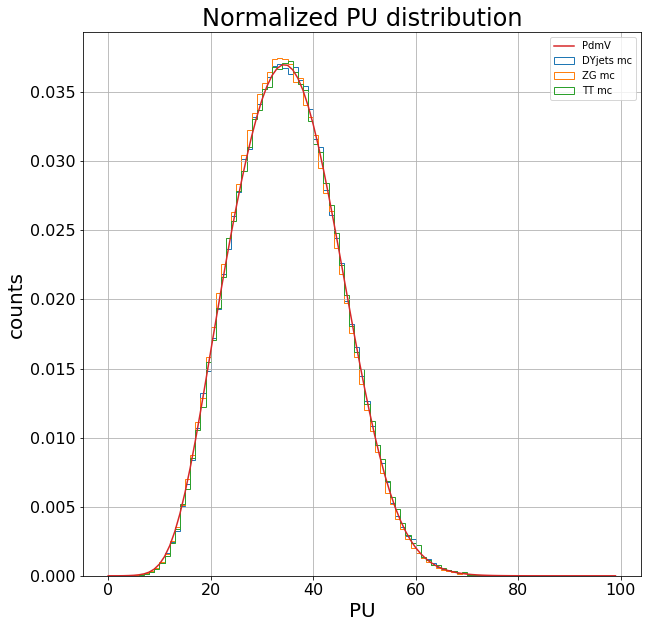

In [13]:
plt.figure(figsize=(10,10))

plt.hist(
        DYJets.df.nPU,
        bins     = PU,
        histtype = 'step',
        normed   = True,
        label    = 'DYjets mc',
        );
plt.hist(
        ZG.df.nPU,
        bins     = PU,
        histtype = 'step',
        normed   = True,
        label    = 'ZG mc',
        );
plt.hist(
        TT.df.nPU,
        bins     = PU,
        histtype = 'step',
        normed   = True,
        label    = 'TT mc',
        );

plt.plot(PU[:len(PUmc)],PUmc,
         label = 'PdmV'
        );

plt.title('Normalized PU distribution')
plt.xlabel('PU')
plt.ylabel('counts')
plt.legend()

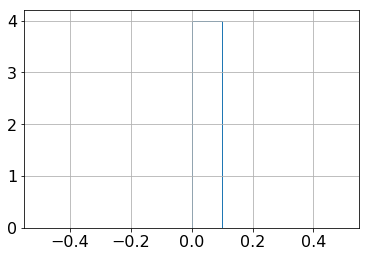

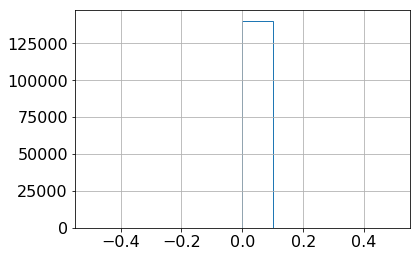

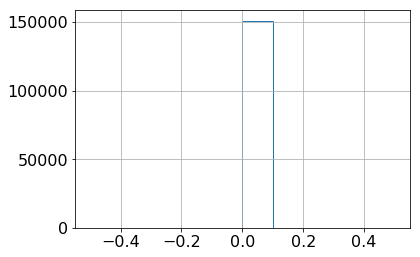

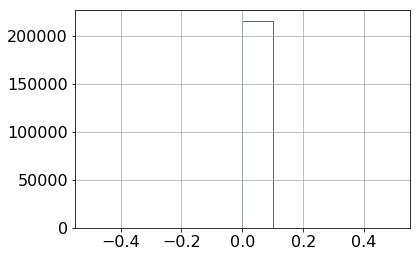

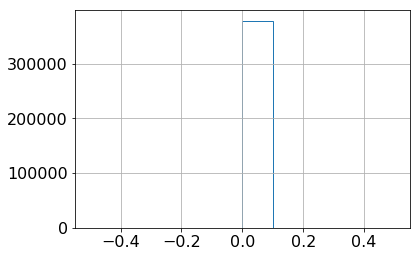

In [14]:

for d in data[:-1]:
    plt.figure()
    plt.hist(
             (np.array(d.weight)-np.array(d.weights)),
             #range = [-2,2],
             histtype = 'step',
            )

In [15]:
puWeights = {}
wei       = {}
weights   = {}
WEI       = {}

In [16]:
xsec_list = {
            '2016':['65','69p2','70','72p4'],
            '2017':['65','69p2','70','72p4'],
            '2018':['67','69p2','71','72','76','78','80'],
            }
xsec_1 = {
        '2016':'69p2',
        '2017':'70',
        '2018':'69p2',
        }
for xsec in xsec_list[era]:
    puWeights[xsec] = Help.SF_ratio(
                                     data,
                                     era   = era,
                                     #xsec1 = '70',
                                     xsec1 = xsec_1[era],
                                     xsec2 = xsec,
                                     Print = False,
                                    )
        
for xsec in xsec_list[era]:        
    wei[xsec],Var = Help.GET_WeiVAR(
                                   data,
                                   part = '',
                                   var  = 'nPV',
                                   ph   = '',
                                   weightCorrection = True,
                                    Print=True,
                                   )

/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1197: RuntimeWarning: invalid value encountered in true_divide
  rScale = r1/r2


Enter Weight Correction
Enter Weight Correction
Enter Weight Correction
Enter Weight Correction
Enter Weight Correction
Enter Weight Correction
Enter Weight Correction


In [17]:
for i in np.arange(len(data)):
    print(data[i].name,colors[i])

WJets cornflowerblue
VV lightskyblue
tt lightcoral
DYJets plum
ZGToLLG pink
Data k


In [19]:
for xsec in xsec_list[era]:
    weights[xsec] = Help.GetPUweight(era=era,xsec=xsec)

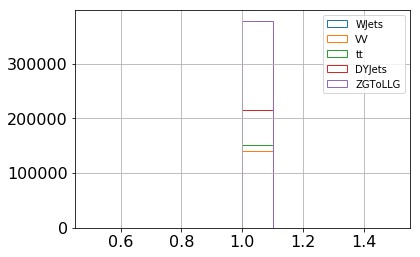

In [21]:
'''
for xsec in xsec_list[era]:
    plt.figure()
    plt.hist(puWeights[xsec],
            histtype = 'step',
            bins = 30,
            range = [0,3],
            label = xsec + " mb",
            )
    plt.legend()
'''

for d in data[:-1]:
    plt.hist(d.puWeight,
            histtype = 'step',
            #bins = 30,
            #range = [0,3],
            label = d.name,
            )
plt.legend()    

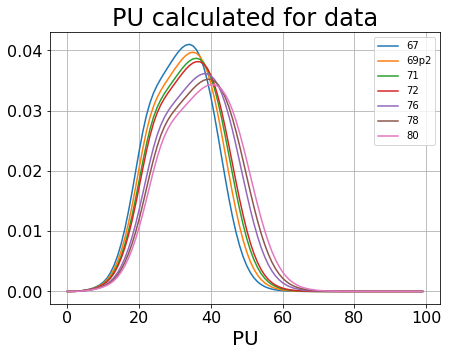

In [33]:
plt.figure(figsize=(7,5))
for xsec in xsec_list[era]:
    plt.plot(weights[xsec][0][:len(weights[xsec][2])],
             weights[xsec][2],
             label = xsec,
            )
plt.xlabel('PU')
plt.title('PU calculated for data')
plt.legend()

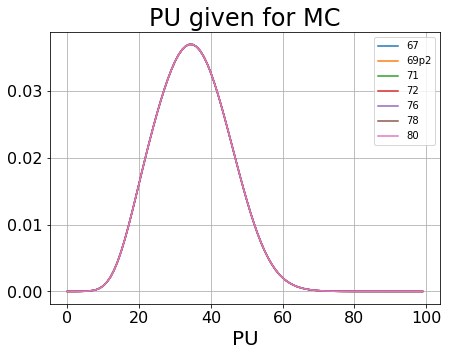

In [34]:
plt.figure(figsize=(7,5))
for xsec in xsec_list[era]:
    plt.plot(weights[xsec][0][:len(weights[xsec][2])],
             weights[xsec][3],
             label = xsec,
            )
plt.xlabel('PU')
plt.title('PU given for MC')
plt.legend()

(0, 3)

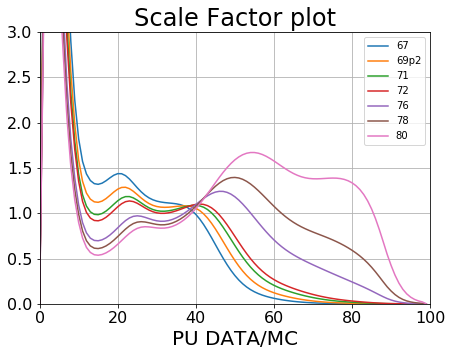

In [35]:
plt.figure(figsize=(7,5))
for xsec in xsec_list[era]:
    plt.plot(weights[xsec][0][:len(weights[xsec][2])],
             weights[xsec][1],
             label = xsec,
            )
plt.title('Scale Factor plot')
plt.xlabel('PU DATA/MC')
plt.legend()
ax = plt.gca()
ax.set_xlim([0,100])
ax.set_ylim([0,3])

In [24]:
if   era == "2016":
    xsec = '65'
elif era == "2017":
    xsec = '69p2'
elif era == "2018":
    xsec = '80'

for d in data[:-1]:
    print(d.name," : ",len(d.weights))
    
print()    
for d in data[:-1]:
    print(d.name)
    #if not d.df.empty():
    WEI[d.name] = np.array(d.weights)/np.array(d.df.puWeight)
        

WJets  :  4
VV  :  140295
tt  :  150857
DYJets  :  216106
ZGToLLG  :  378391

WJets
VV
tt
DYJets
ZGToLLG


In [25]:
#d.df.genWeight
#d.df.puWeight
#d.df.puWeight

#d.weight
#d.puWeight
#d.weights

In [26]:
import array
from ROOT import TGraph

In [27]:
VAR = "pileup_sf"

fileTrans = TFile(figpath+VAR+"_"+era+"_.root","recreate")
fileTrans.cd()

graph = {}
for xsec in xsec_list[era]:
    c1 = TCanvas(VAR+"_"+xsec,VAR,200,20,700,500)
    c1.SetFillColor(0)
    c1.SetGrid()

    x, y  = array.array('d'), array.array('d')
    hx,hxCorr = [],[]

    #N = len(weights[xsec][0])
    N = 79
    for i in np.arange(0,N):
        x.append(weights[xsec][0][i])
        y.append(weights[xsec][1][i])
    y = np.array(y)
    y[np.isinf(y)] = 0

    graph[xsec] = TGraph(N, x, y)

    graph[xsec].SetLineColor( 2 )
    graph[xsec].SetLineWidth( 0 )
    graph[xsec].SetMarkerColor( 4 )
    graph[xsec].SetMarkerStyle( 21 )
    graph[xsec].SetTitle(VAR)
    graph[xsec].GetXaxis().SetTitle( 'PU' )
    graph[xsec].GetYaxis().SetTitle( 'Counts' )
    graph[xsec].Draw("AP")
    c1.Update()

    graph[xsec].Write(VAR+"_"+xsec)
    if xsec == "71":
        graph[xsec].Write(VAR)
    fileTrans.Write()



In [28]:
def GetSF(xsec,PU):
    return graph[xsec].Eval(PU)

In [39]:
xsec_list

{'2016': ['65', '69p2', '70', '72p4'],
 '2017': ['65', '69p2', '70', '72p4'],
 '2018': ['67', '69p2', '71', '72', '76', '78', '80']}

In [64]:
if   era == "2016":
    xsec = '65'
elif era == "2017":
    xsec = '69p2'
elif era == "2018":
    xsec = '71'


newWei = {}
for d in data[:-1]:
    newWei[d.name] = []
    for sf,i in zip(map(lambda x : GetSF(xsec,x),d.df.nPU),np.arange(len(d.df.nPU))):
        newWei[d.name].append(sf*WEI[d.name][i])
newWei[data[-1].name] = list(np.ones(len(data[-1].df.nPU)))
        

In [65]:
#normalWeight = True
normalWeight = False

label = ""

D = data[:-1]

if normalWeight:
    for d in D:
        d.weight = d.weights
    label +="_originalWeight"
else:
    ####################
    #noPuWeight = True
    noPuWeight = False
    
    
    if noPuWeight:
        for d in D:
            d.weight = WEI[d.name]
        label +="_noPuWeight"

    else:
        for d in D:
            d.weight = newWei[d.name]    
        label +="_using"+xsec

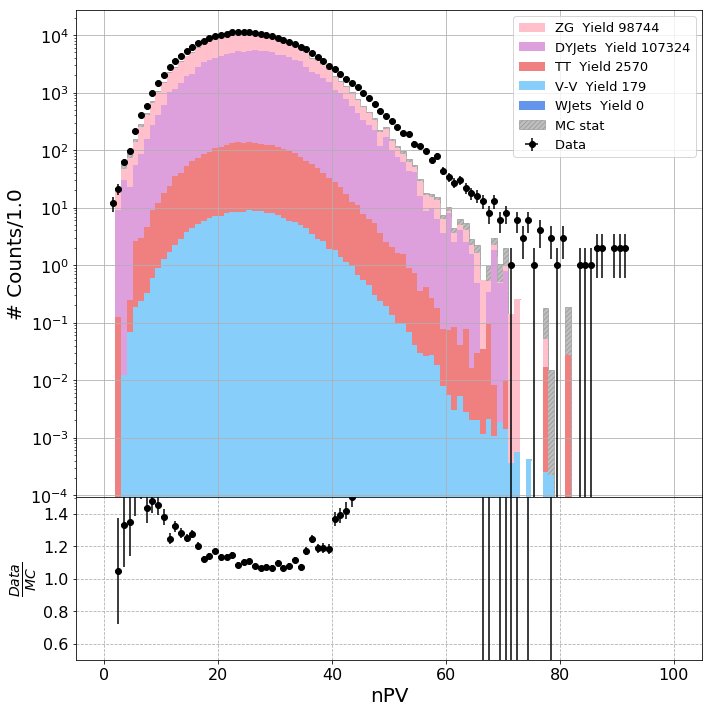

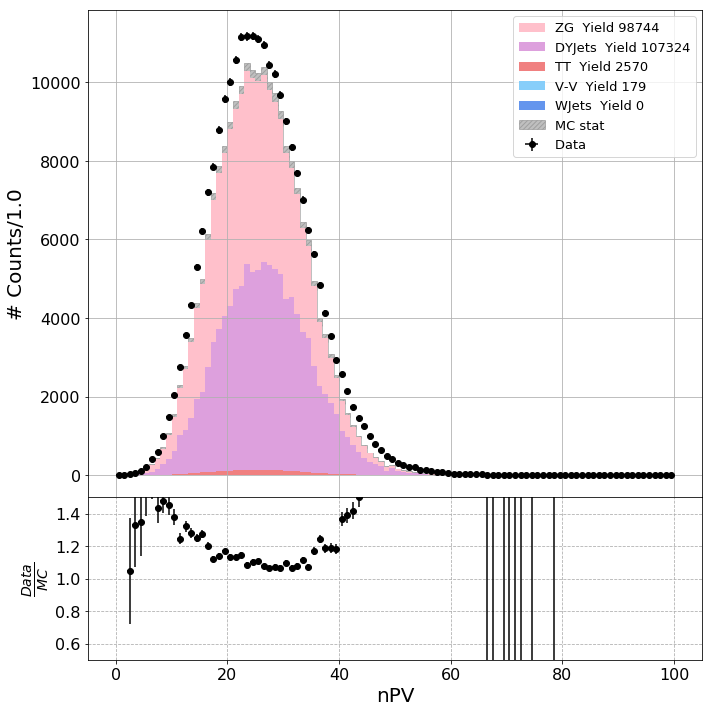

In [66]:
for log in [True,False]:
    for v in ['nPV']:
        for p in ['']:
            Plotter.Plot(
                         data,
                         var              = v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = True,
                         density          = False,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Plotting         = True,
                         Blind            = True,
                         StatInclude      = StatInclude,
                         CustomeRangeBins = [],
                         Print            = Print,
                         #index            = Region+'_'+phType+"_"+xsec,
                         index            = Region+'_'+phType+label,
                        );

In [67]:
for d in data[:-1]:
    print(d.name)
    print(len(WEI[d.name]))
    print(len(newWei[d.name]))
    print()

print(data[-1].name)
print(len(newWei[data[-1].name]))
print()

WJets
4
4

VV
140295
140295

tt
150857
150857

DYJets
216106
216106

ZGToLLG
378391
378391

Data
551950



In [68]:
data[2].weights

array([0.0725962 , 0.07841949, 0.10407097, ..., 0.10094236, 0.11484674,
       0.09226778])

In [69]:
################################
#stacked = False
stacked = True

LOG = 'both'
log = False
#log = True

#phType = 'ISR'
#phType = 'FSR'
phType = ''


ShowerShapeCorrection = True
#ShowerShapeCorrection = False

if selection == "mumug" or selection == "elelg":
    lgmDR = True
elif selection == "ee":
    lgmDR = False

################

#Region = ''

#Region = 'A'
#Region = 'B'
#Region = 'C'
#Region = 'D'

#Region = 'Ap'
#Region = 'Bp'
#Region = 'Cp'
#Region = 'Dp'


Region = 'AB'
#Region = 'CD'

#Region = 'Sig'
#Region = 'Inv Sig'

#Region = 'Sideband'
#Region = 'Compare'


#Region = ['Sig','IPFS']
#Region = ['Sig','noIPFS']
#Region = ['Inv Sig','IPFS']
#Region = ['Inv Sig','noIPFS']

################

#Charge = 'oposite'
#Charge = 'same'
Charge = ''

#customRange = True
customRange = False

weightCorrection = True
#weightCorrection = False

#StatInclude = False
StatInclude = True

MVA = False
#MVA = True

Print = False
#Print = True

vetoDY = True
#vetoDY = False

###############################
if stacked:
    Fol  = 'Stacked'
    stackLab  = ''
    histtype  = 'stepfilled'
    density   = False
    linewidth = 1
else:
    Fol  = 'Unstacked'
    stackLab  = ''
    histtype  = 'step'
    density   = True
    #density = False
    linewidth = 1.7
###############################    
if log:
    stackFol = Fol+'/log'
else:
    stackFol = Fol+'/linear'
###############################

######## CUTS ##############
Cut.PhaseSpace(
                data,
                phType = phType,
                Charge = Charge,
                Region = Region,
                Print  = Print,
                vetoDY = vetoDY,
                lgmDR  = lgmDR,
                MVA    = MVA,
              )

for d in data[:-1]:
    if not d.df.empty:
        d.AddCuts(np.array(d.df.nPU) > 0) 
        
#for d in data[:-1]:
#    if not d.df.empty:
#        d.AddCuts(np.array(d.df.photonOnePt) > 100)
###############################

In [70]:
      
def Multi_Ploting(
                  data,
                  stacked,
                  log,
                  customRange      = False,
                  weightCorrection = True,
                  Blind            = True,
                  Plotting         = True,
                  StatInclude      = False,
                 ):
    #################################################################
    var = ['Pt','Phi']
    part = ['leptonOne','leptonTwo','photonOne','dilepton','llg']
    part = [p+'_EE' for p in part]

    for v in var:

        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [2,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
        
    #################################################################
    var = ['Pt','Phi']
    part = ['leptonOne','leptonTwo','photonOne','dilepton','llg']
    part = [p+'_EB' for p in part]

    for v in var:

        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [2,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['DEta','DPhi','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB','l2Photon','l2Photon_EE','l2Photon_EB','dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB','dilepton']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [4,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )    
    #################################################################
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [3,1],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,            
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [3,1],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['M']    
    part = ['dilepton','dilepton_EE','dilepton_EB','llg','llg_EE','llg_EB']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,            
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [2,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################        
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB'] 
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,            
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [1,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['E2x2','E5x5','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [1,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['ScEtaWidth','ScPhiWidth','ScRawE','ScBrem']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,            
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [1,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )        

----------------Pt----------------
Just set plot param legend.loc empty


/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:169: RuntimeWarning: invalid value encountered in less
  Yield.append(np.sum(wei[i][np.array(data[i].GetWithCuts(part+var+ph)) < bins[-1] ]))
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1512: RuntimeWarning: invalid value encountered in greater
  Ind = np.logical_and(data[i].GetWithCuts(variable) > bins[j], data[i].GetWithCuts(variable) <= bins[j+1])
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1512: RuntimeWarning: invalid value encountered in less_equal
  Ind = np.logical_and(data[i].GetWithCuts(variable) > bins[j], data[i].GetWithCuts(variable) <= bins[j+1])


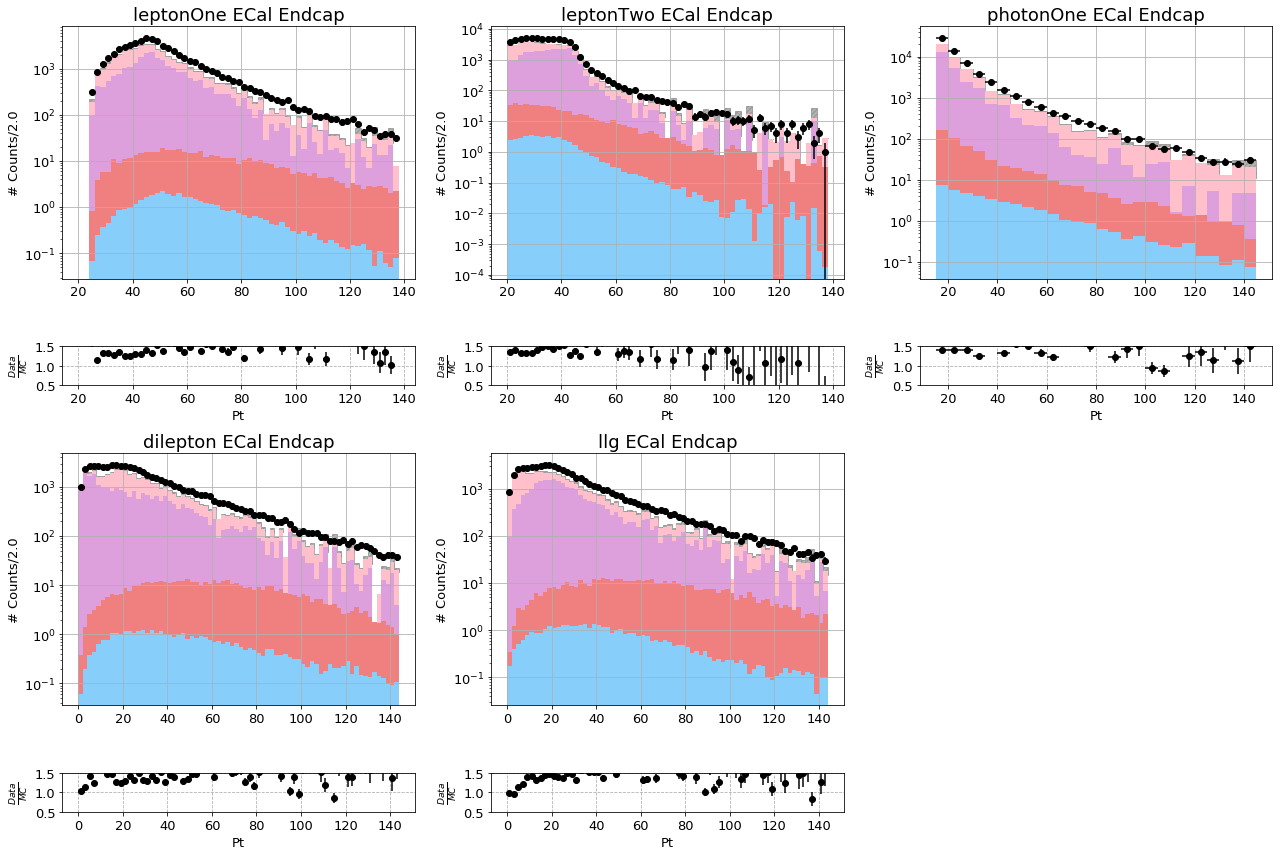

----------------Phi----------------
Just set plot param legend.loc empty


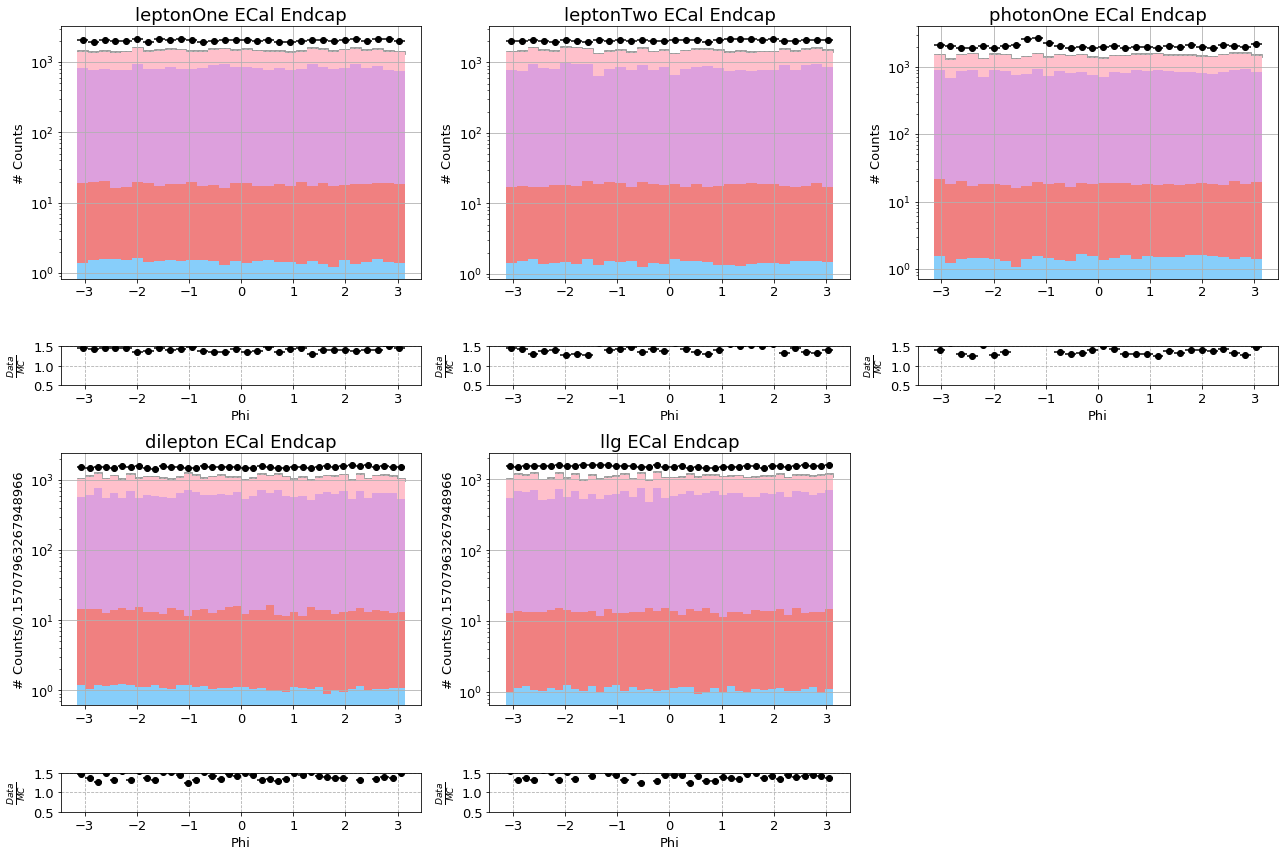

----------------Pt----------------
Just set plot param legend.loc empty


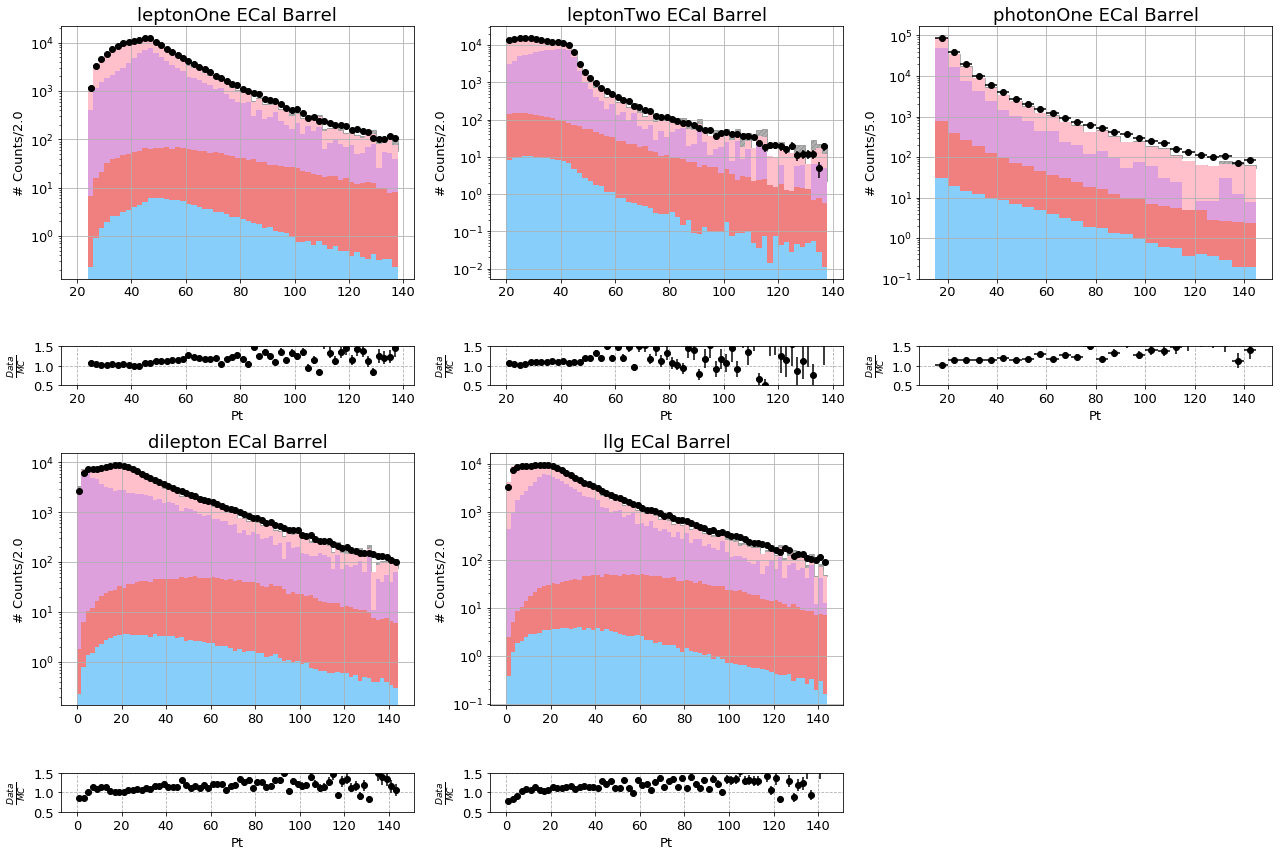

----------------Phi----------------
Just set plot param legend.loc empty


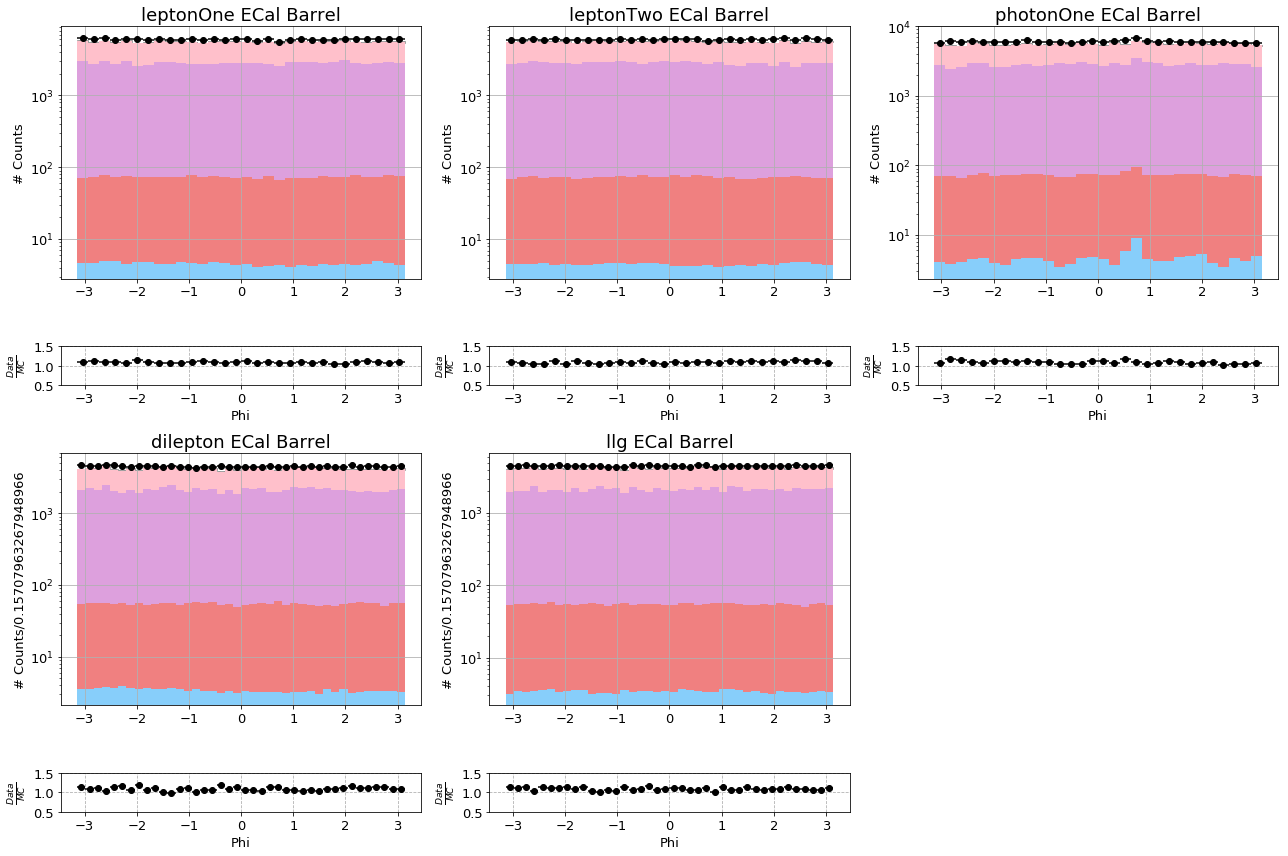

----------------DEta----------------
Just set plot param legend.loc empty


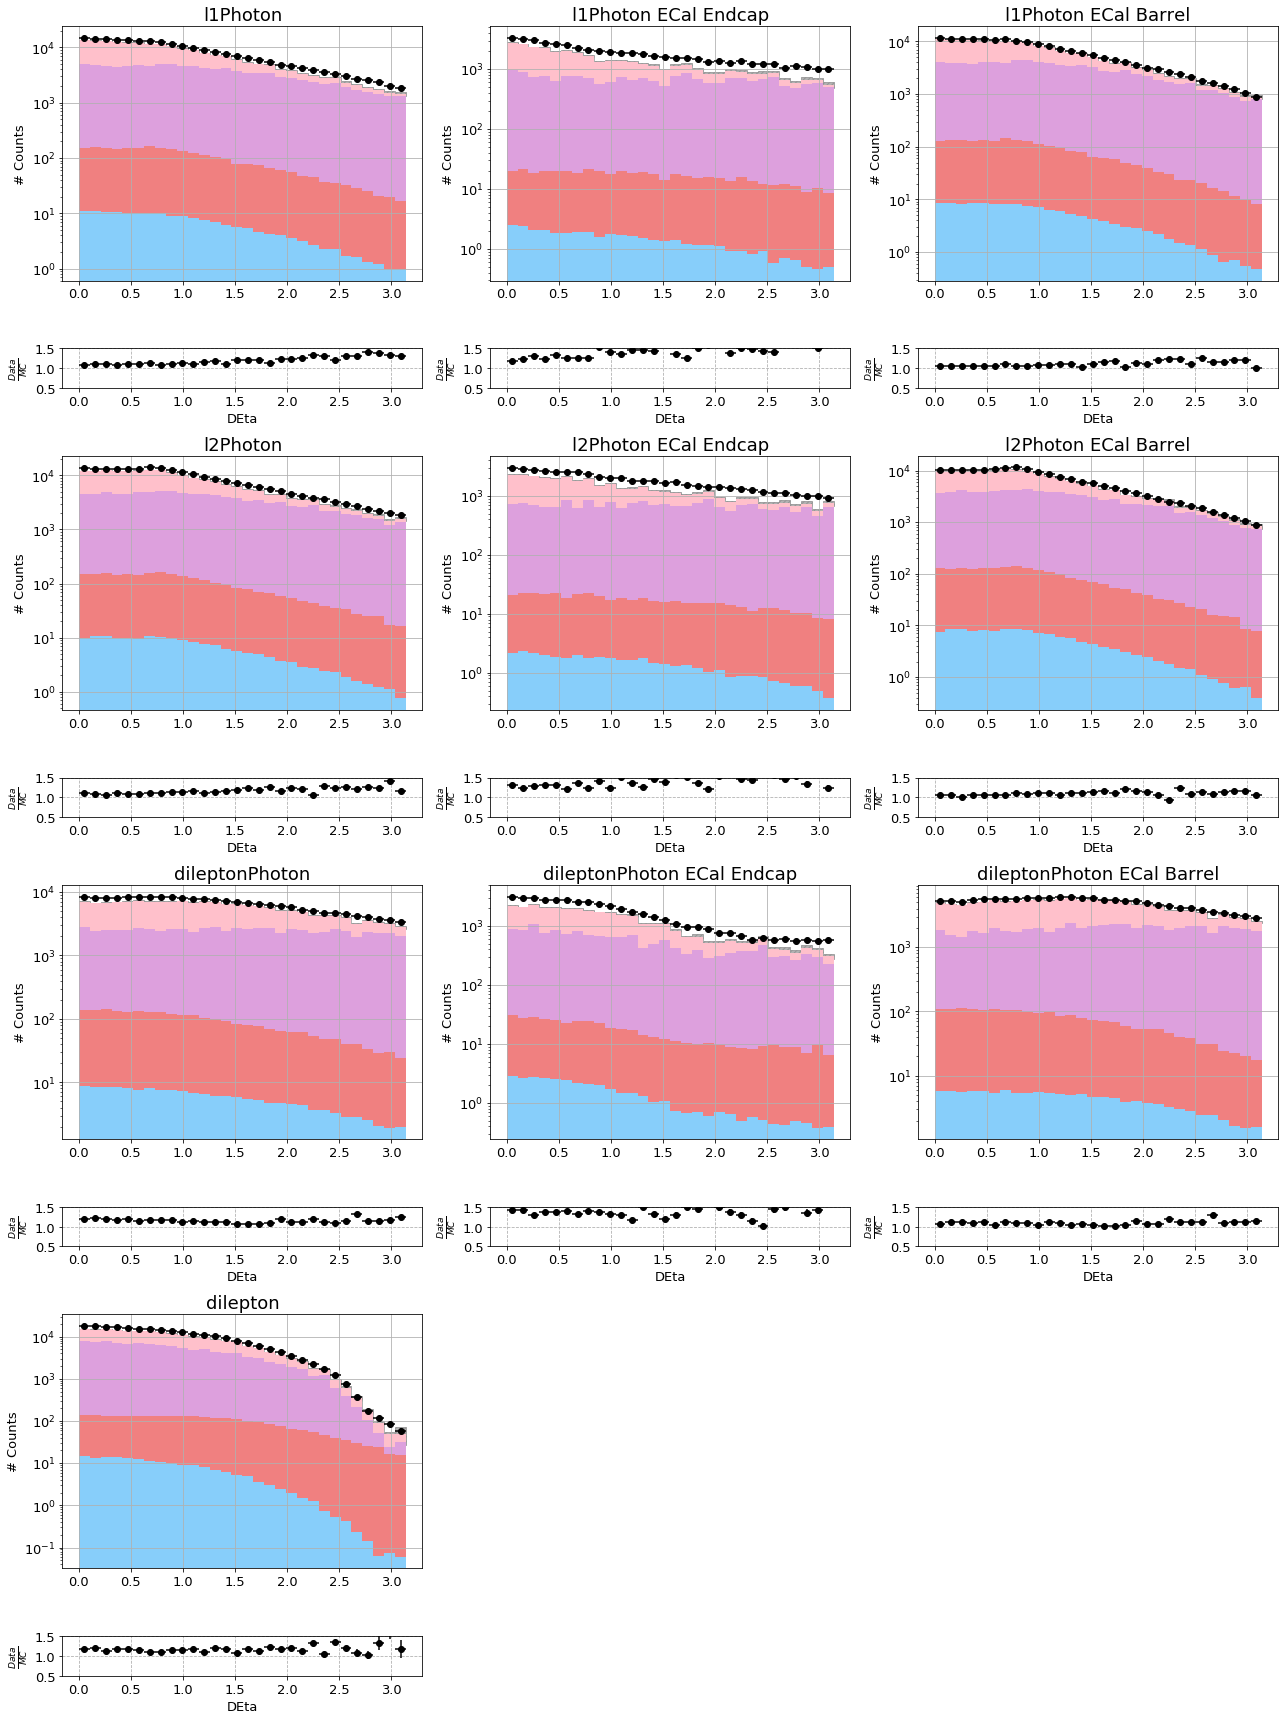

----------------DPhi----------------
Just set plot param legend.loc empty


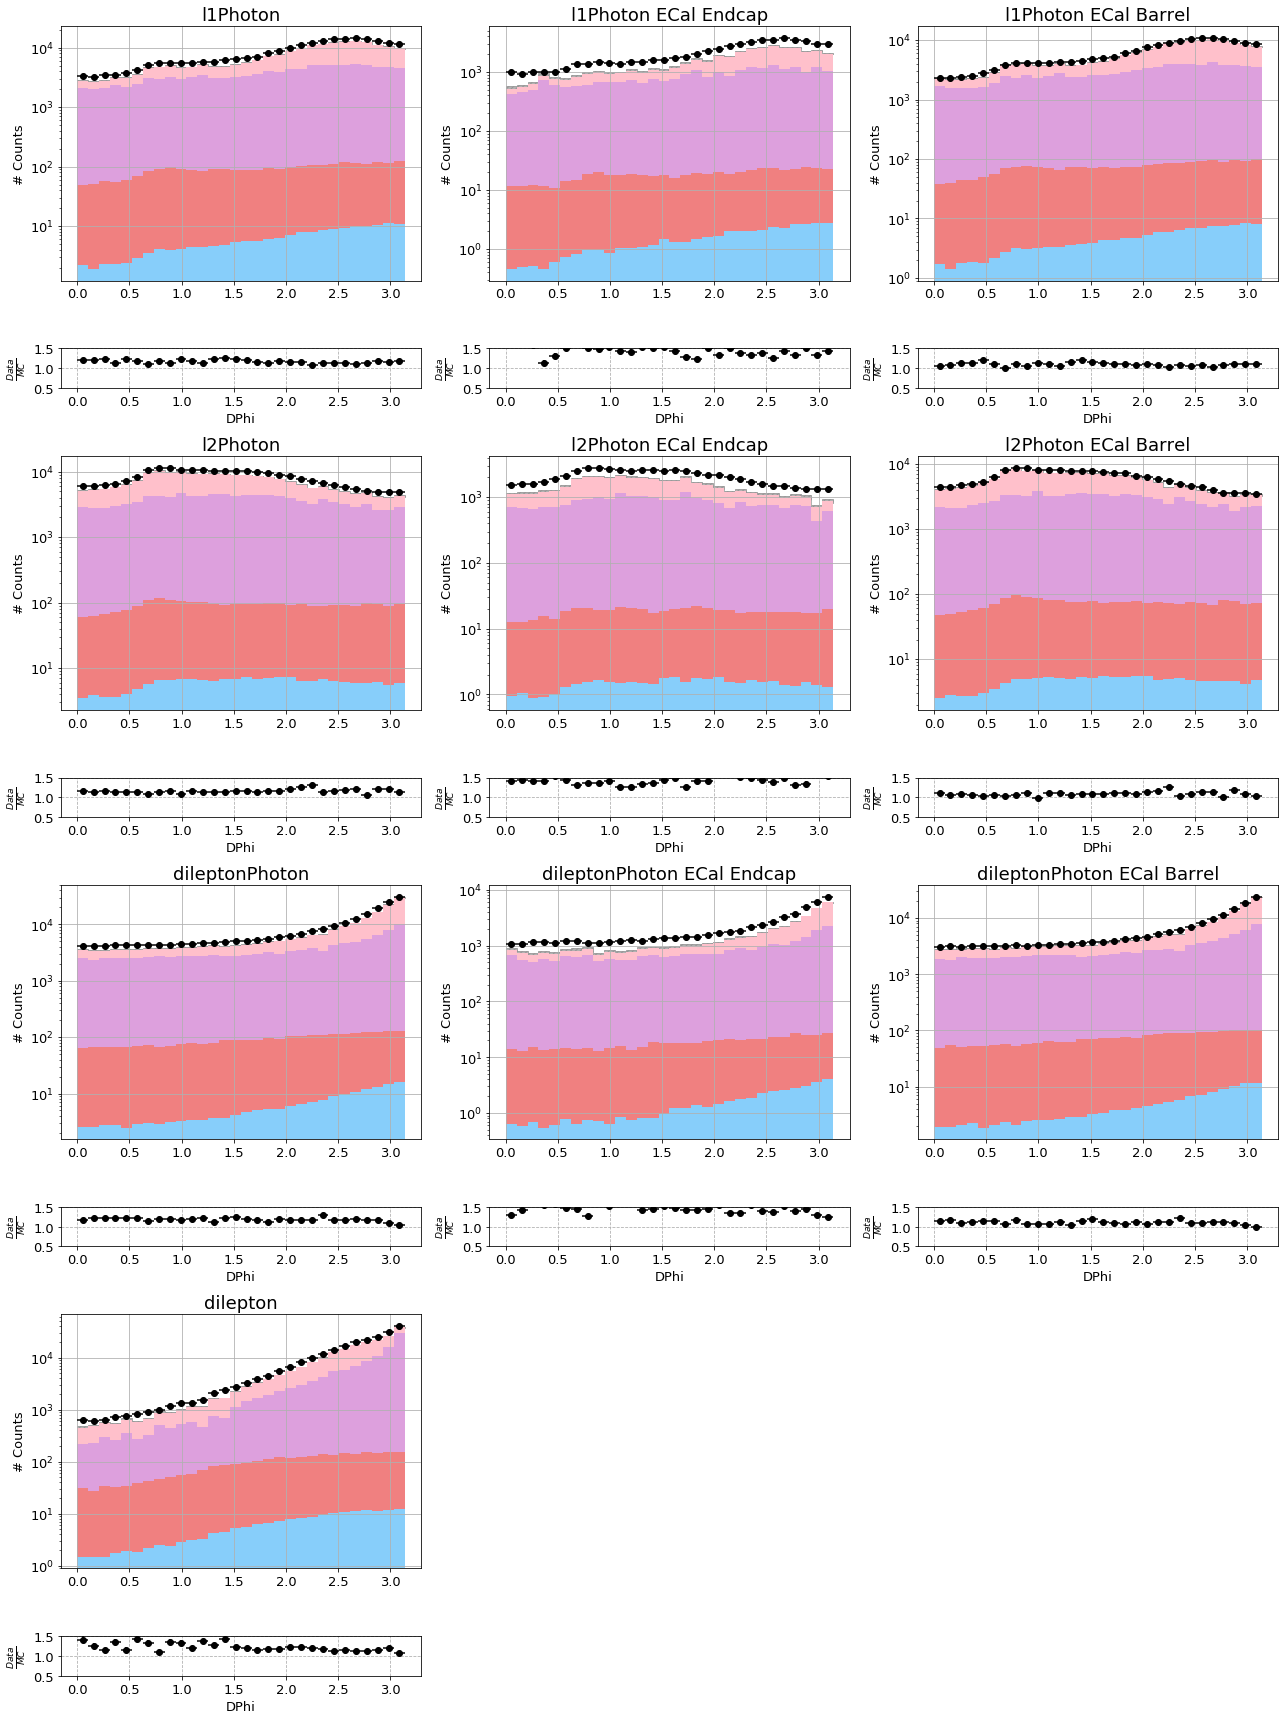

----------------DR----------------
Just set plot param legend.loc empty


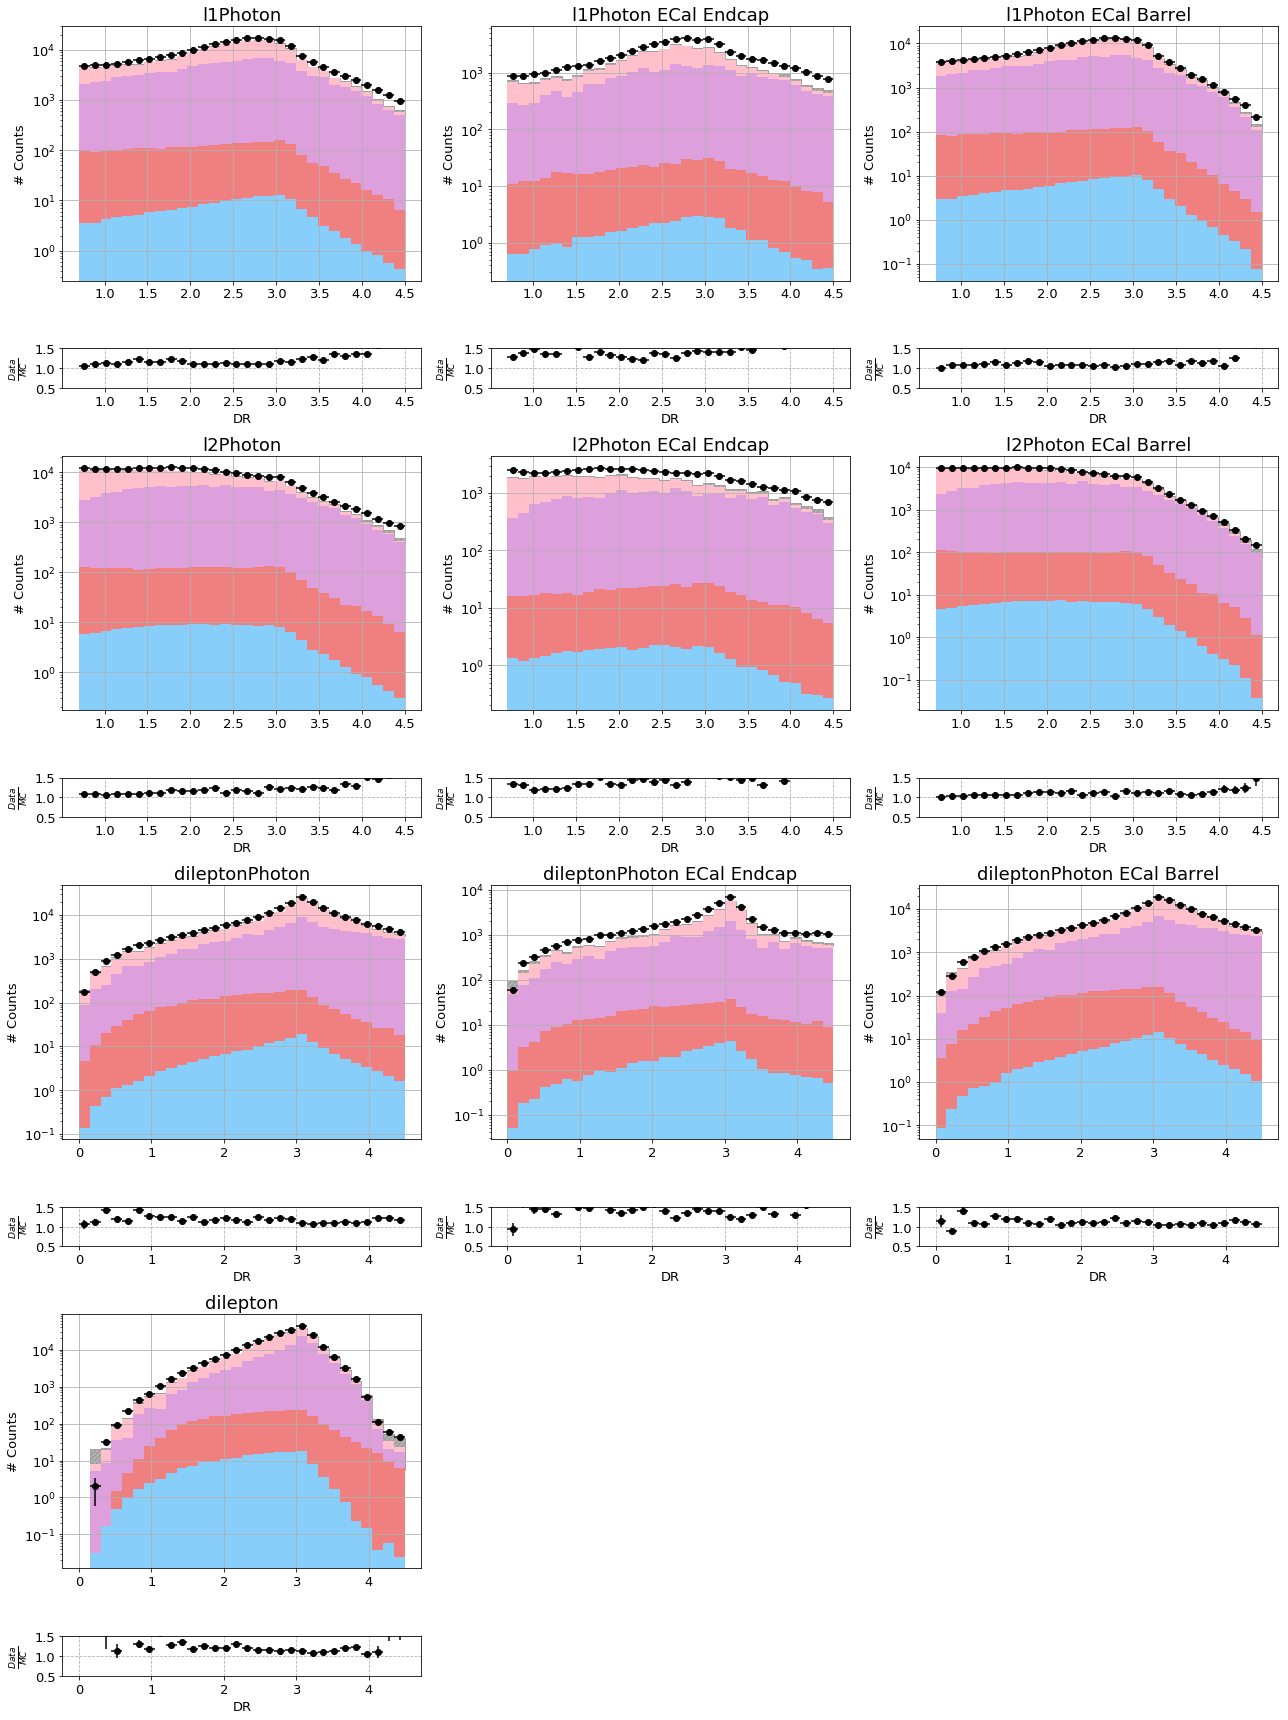

----------------HoverE----------------
Just set plot param legend.loc empty


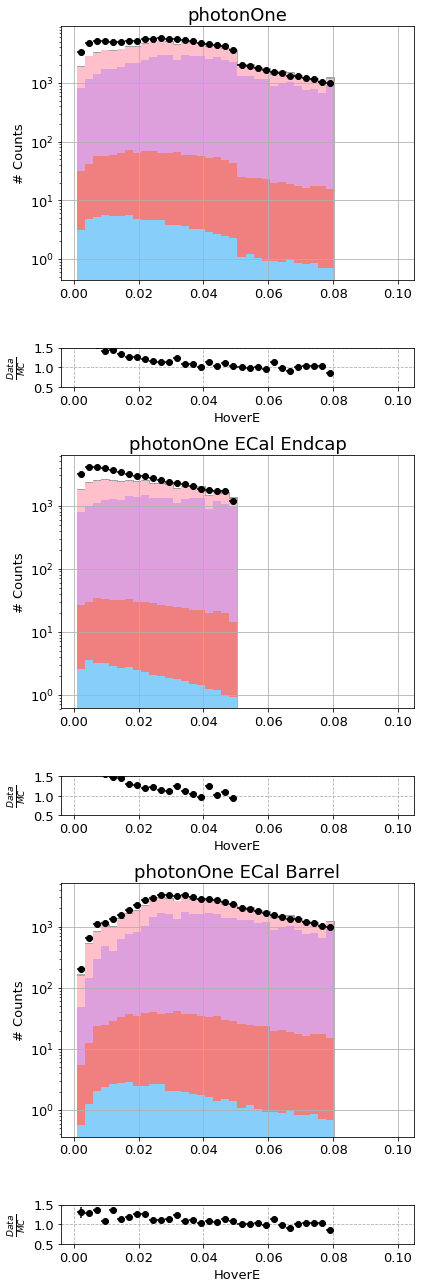

----------------R9----------------
Just set plot param legend.loc empty


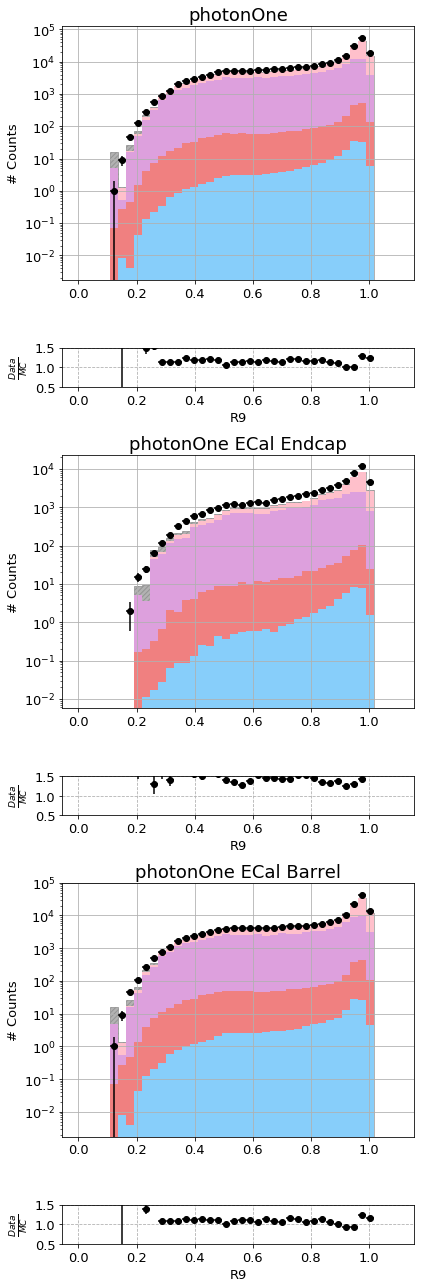

----------------MVA----------------
Just set plot param legend.loc empty


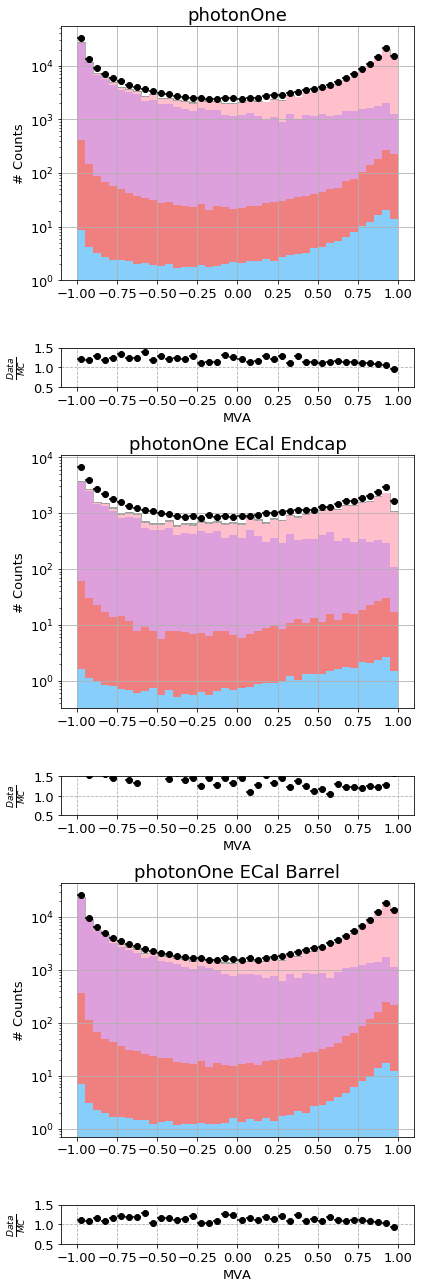

----------------Ich----------------
Just set plot param legend.loc empty


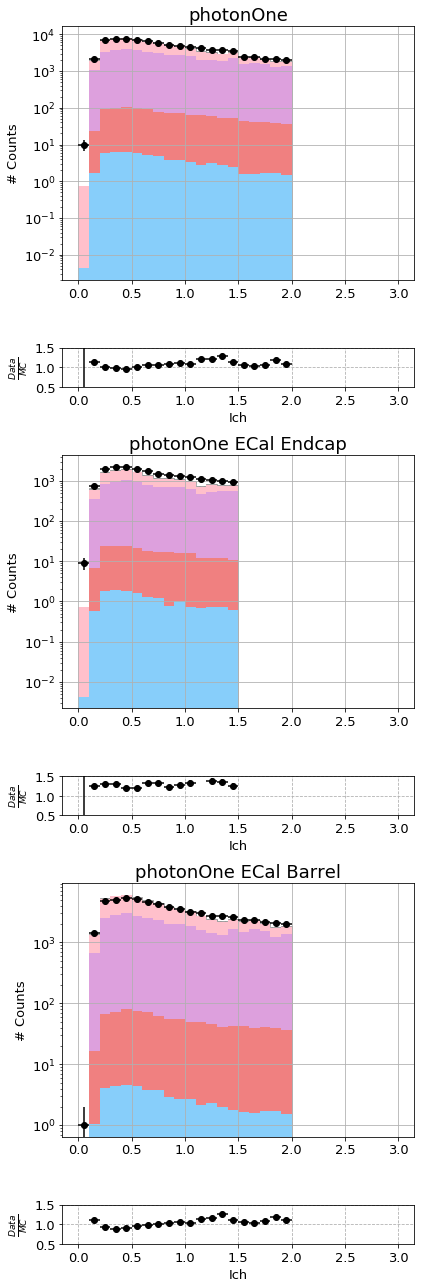

----------------Ineu----------------
Just set plot param legend.loc empty


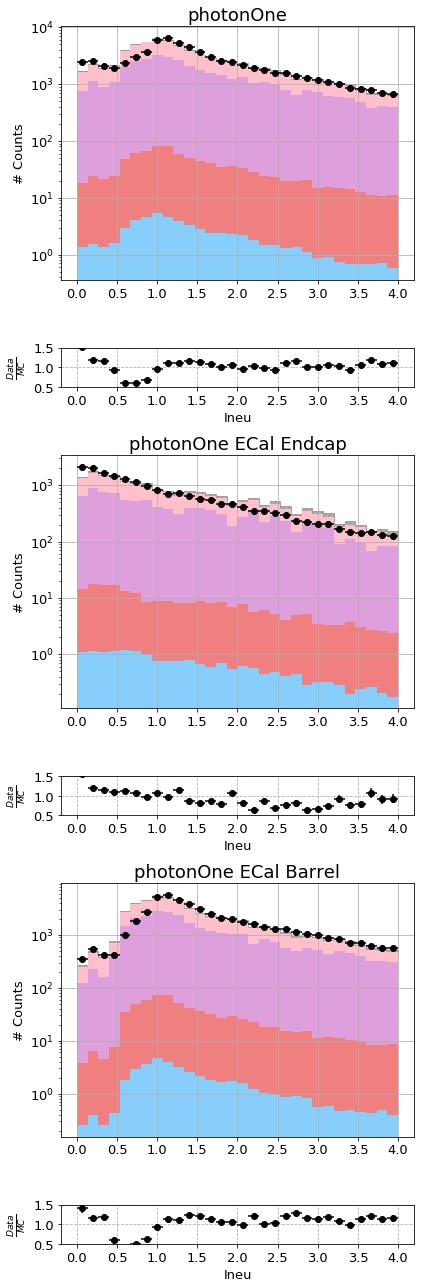

----------------Iph----------------
Just set plot param legend.loc empty


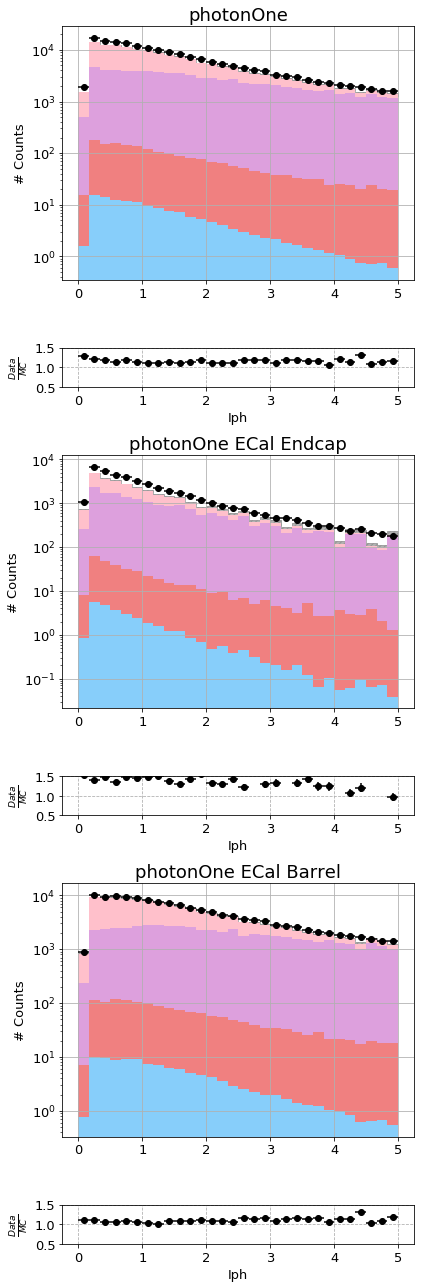

----------------M----------------
Just set plot param legend.loc empty


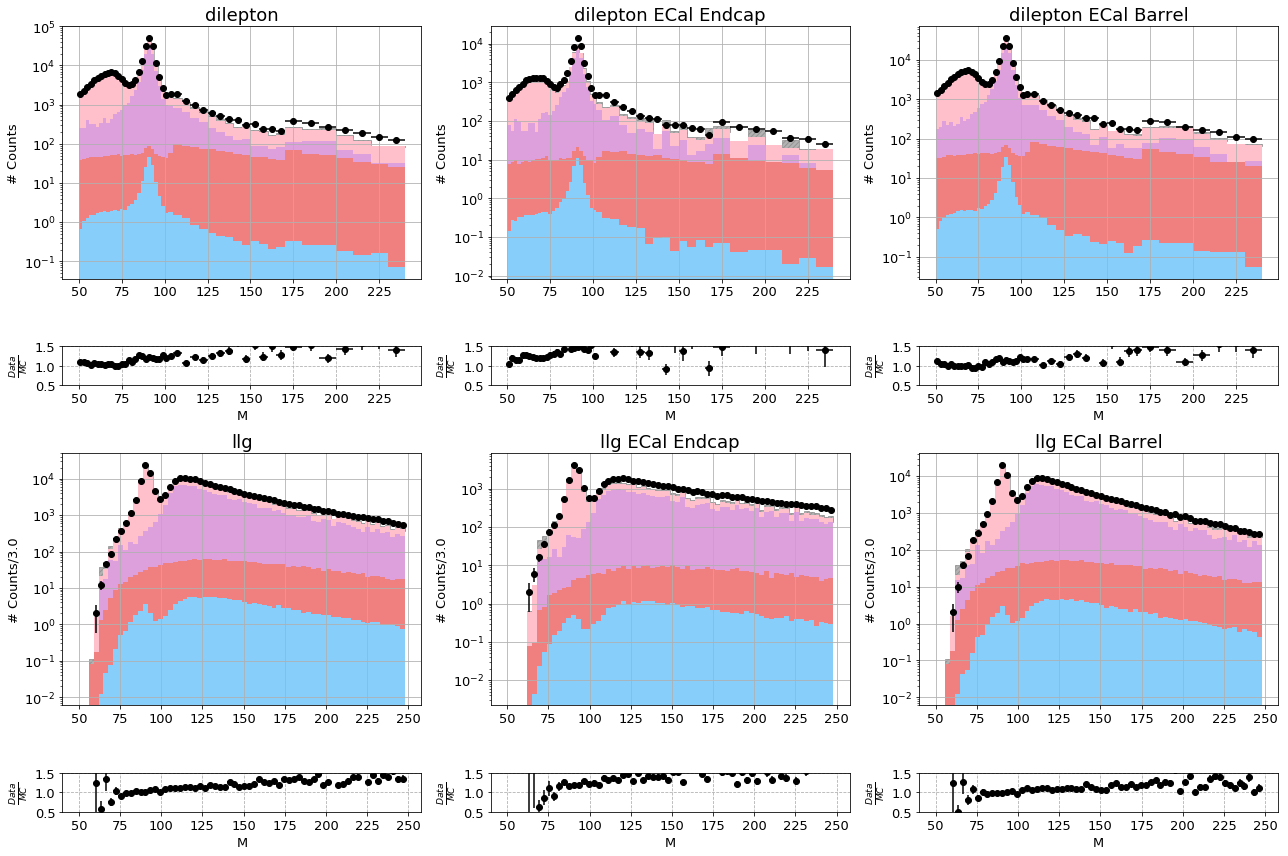

----------------Srr----------------
Just set plot param legend.loc empty


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


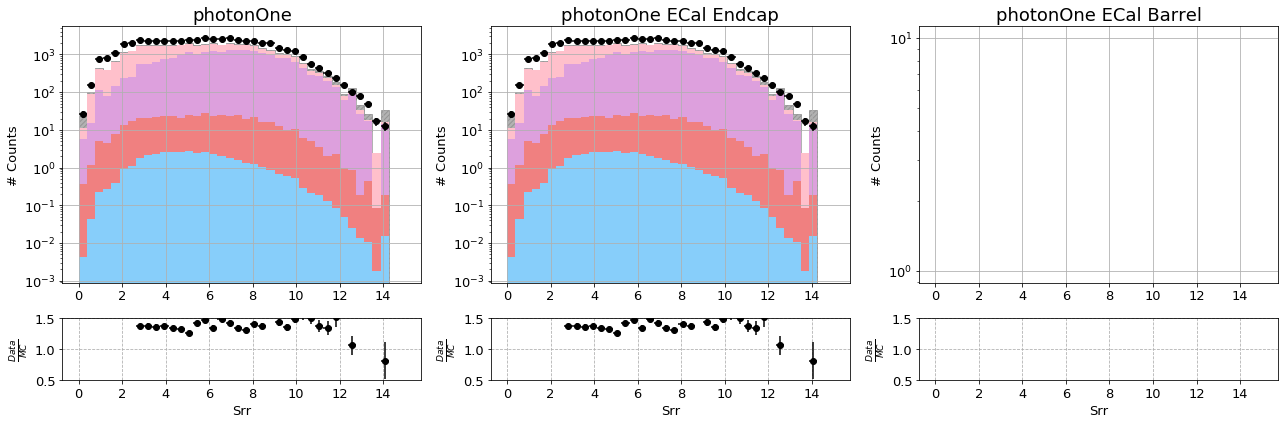

----------------Sipip----------------
Just set plot param legend.loc empty


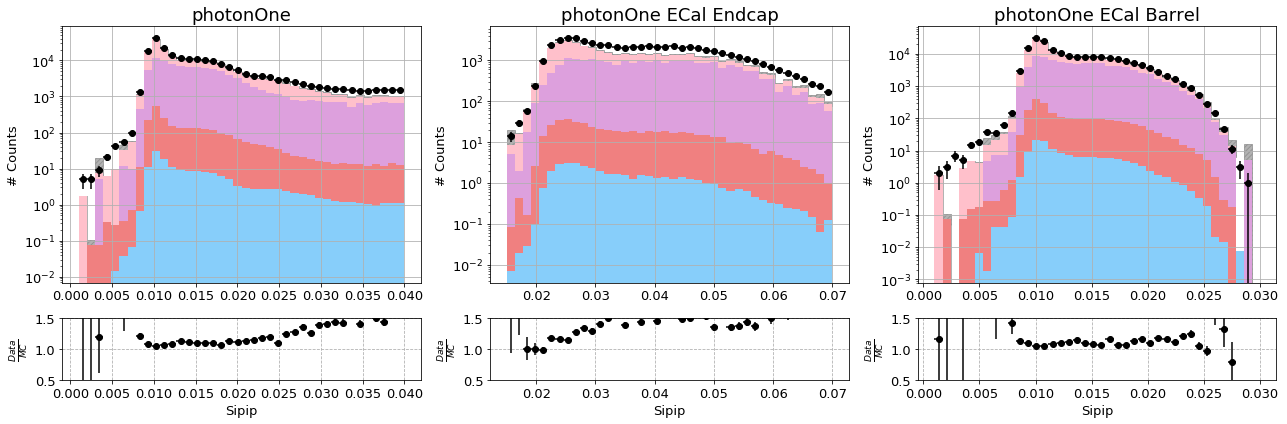

----------------Sieip----------------
Just set plot param legend.loc empty


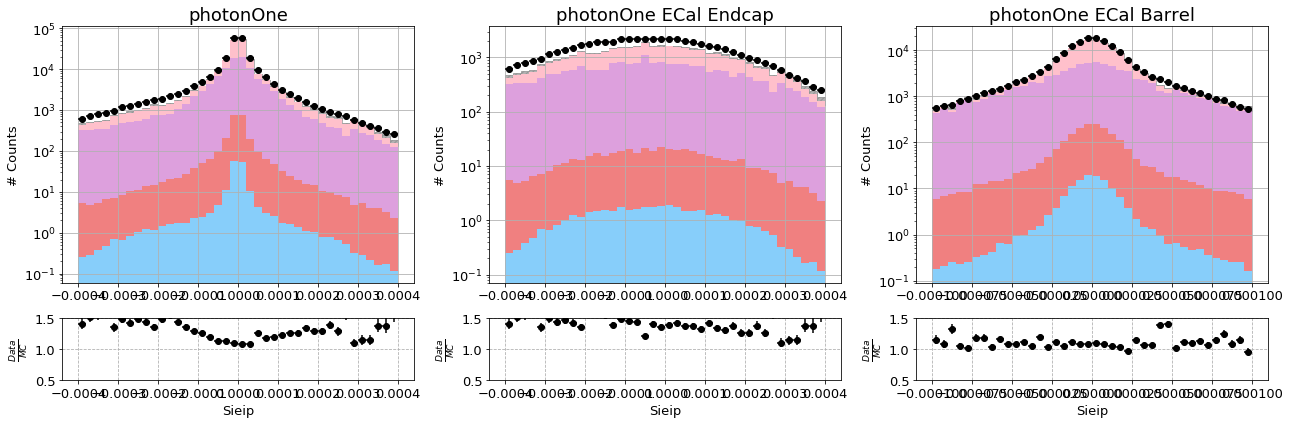

----------------Sieie----------------
Just set plot param legend.loc empty


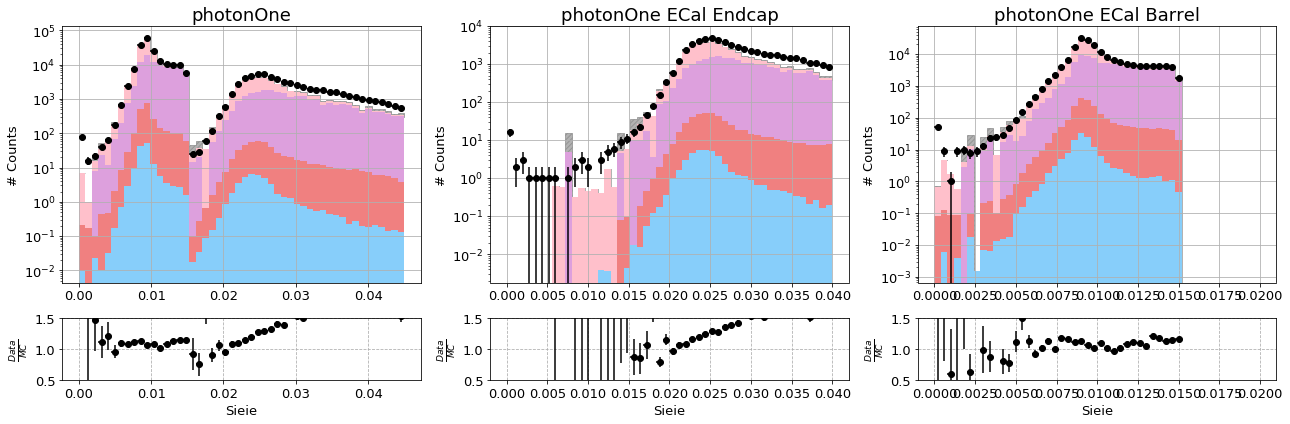

----------------E2x2----------------
Just set plot param legend.loc empty


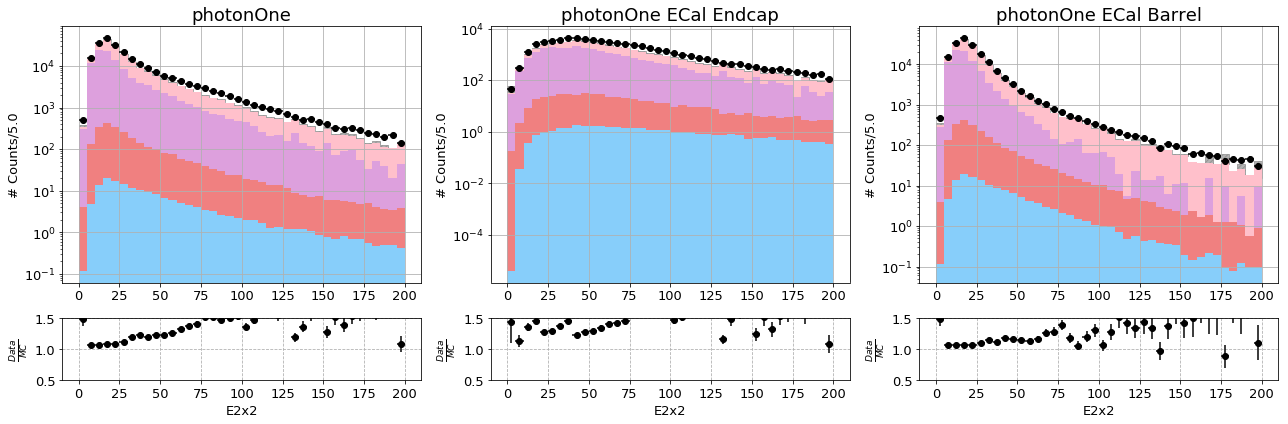

----------------E5x5----------------
Just set plot param legend.loc empty


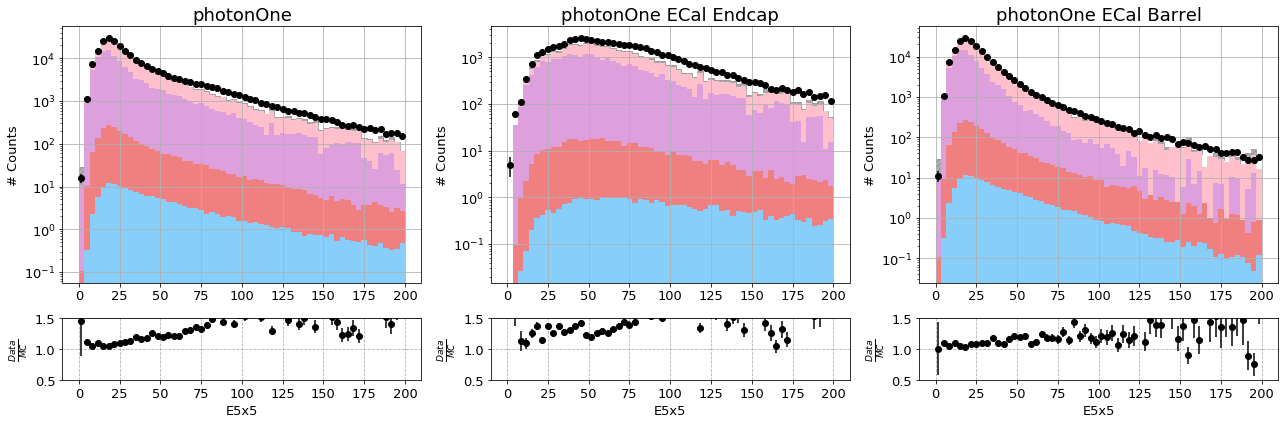

----------------PreShowerE----------------
Just set plot param legend.loc empty


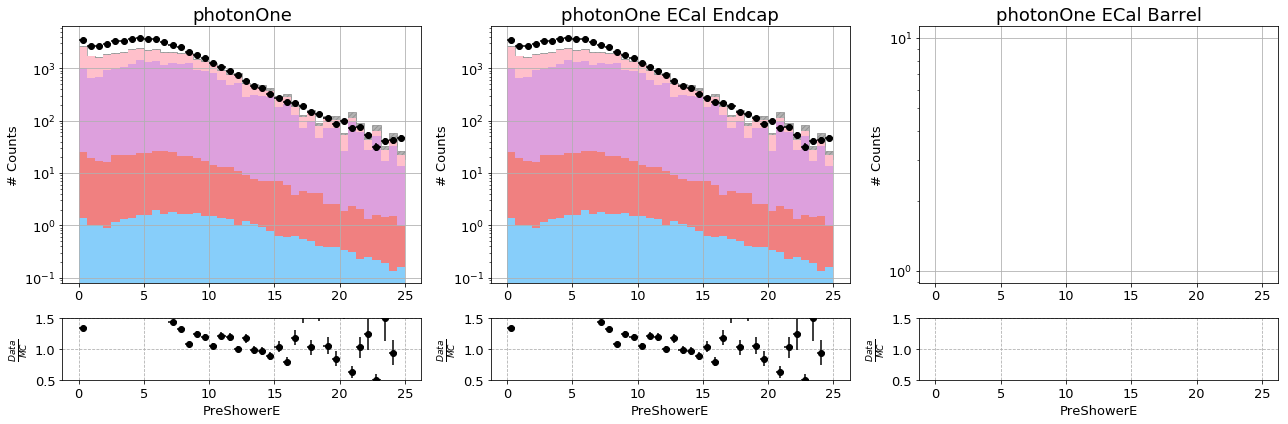

----------------ScEtaWidth----------------
Just set plot param legend.loc empty


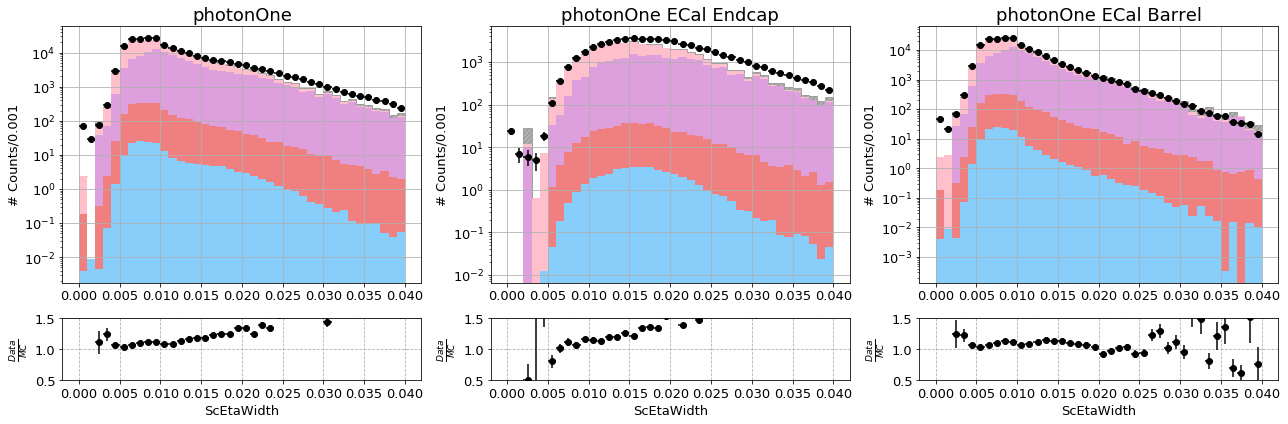

----------------ScPhiWidth----------------
Just set plot param legend.loc empty


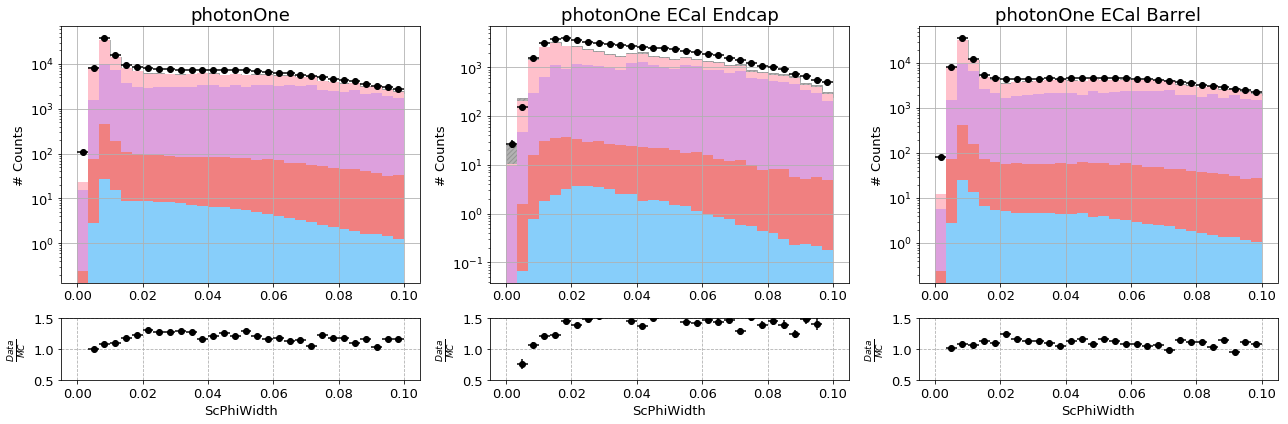

----------------ScRawE----------------
Just set plot param legend.loc empty


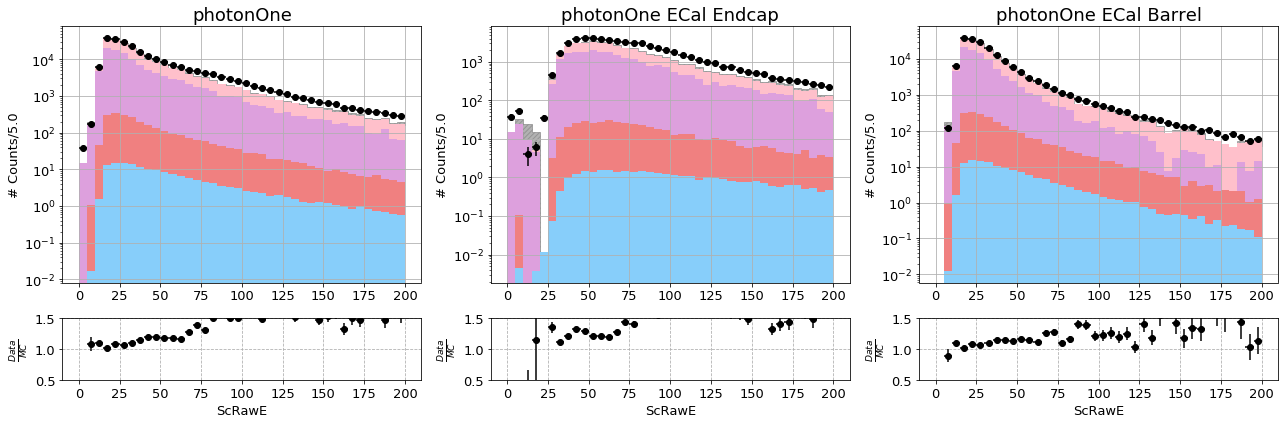

----------------ScBrem----------------
Just set plot param legend.loc empty


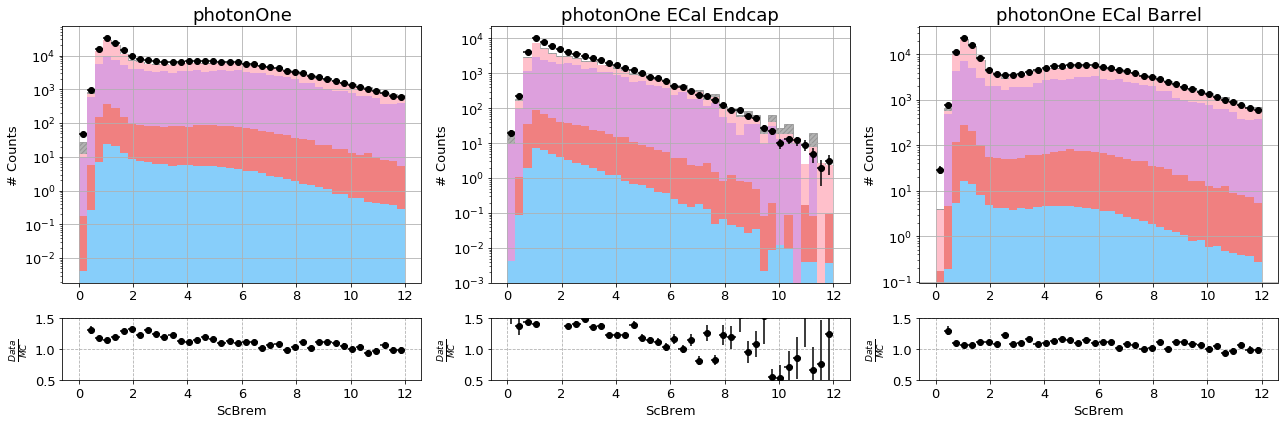

In [71]:
Multi_Ploting(data,
              stacked,
              log              = True,
              customRange      = False,
              weightCorrection = False,
              Blind            = True,
              Plotting         = True,
              StatInclude      = True,
              )


In [72]:
def Plot_Mult(
                  data,
                  var,
                  part,
                  signalInclude    = False,
                  figDim           = [2,3],
                  customRange      = False,
                  stacked          = True,
                  density          = False,
                  log              = False,
                  weightCorrection = True,
                  externalData     = None,
                  Blind            = True,
                  Plotting         = True,
                  StatInclude      = False,
                  index            = 0,
                 ):

        Plotter.PlotSettings(Single=False)



        nx,ny = figDim[0],figDim[1]
        rowSpan,colSpan = 3,1

        ##########################
        if not signalInclude:
            N = 2
        else:
            N = 1
        ##########################
        if stacked:
            histtype = 'stepfilled'
        else:
            histtype = 'step'
        ##########################

        htemp = []
        row,col =0 , 0


        fig = plt.figure(figsize = (6*ny, 6*nx))

        for j,k in zip(range(len(part)),part): 
            
            p,v,ph = Plotter.NamingFormat(k,var)

            ##########################

            ranges,bins = Plotter.Help.GET_RangeBins(p,v,ph, Blind=False,Plotting=Plotting)
            wei, VAR    = Plotter.Help.GET_WeiVAR(data, p,v,ph, 
                                               weightCorrection = weightCorrection,
                                              )
            label = Plotter.LabeledYields(data,part=p,var=v,ph=ph,wei=wei,ranges=ranges,bins=bins)

            ##########################

            nx,ny = figDim[0],figDim[1]

            if j != 0:
                if j%ny == 0:
                    row += 1
                    col = 0  

            ax = plt.subplot2grid((nx*(rowSpan+1),ny),(row*(rowSpan+1),col),rowspan = rowSpan, colspan = colSpan)    
            title_lab = k        




            h_bg = ax.hist(
                            VAR[:-N],                            
                            histtype  = histtype,
                            range     = ranges,
                            bins      = bins,
                            stacked   = stacked,
                            color     = Plotter.colors[:-N],
                            weights   = wei[:-N],
                            label     = label,
                            density   = density,
                            linewidth = Plotter.linewidth,
                            )
            htemp.append(h_bg)
            ax.set_title(title_lab)
            ax.grid(linestyle='--')
            ax.legend(prop={'size':10})
            

            #----------------------------------------------------------------
            #----------------------------------------------------------------
            if stacked:
                if not signalInclude:
                    h_sig = ax.hist(
                                    VAR[-N],
                                    bins      = bins,
                                    range     = ranges,
                                    histtype  = Help.plotOpsAll[-N]['histtype'],
                                    stacked   = Help.plotOpsAll[-N]['stacked'],
                                    color     = Plotter.colors[-N],
                                    weights   = wei[-N],
                                    label     = label[-N] ,
                                    linewidth = Plotter.linewidth+1,
                                    )
                    ax.legend(prop={'size': 10})
                else:
                    h_sig = h_bg[0][-1]

                if type(bins) is float or type(bins) is int:
                    step = (ranges[1]-ranges[0])/bins
                    bins = np.array([ranges[0]+i*step for i in np.arange(bins+1)])   

                ax = plt.gca()
                if StatInclude:
                    x,value,statUp,statDown = Plotter.Help.GET_StatUncertainty(data = data, hist = h_bg[0], part=p,var=v,ph=ph, bins = h_bg[1])
                    ax.fill_between(x,value-statDown,value+statUp,facecolor='lightgrey',color = 'grey',hatch='/////',alpha=0.6,label='MC stat')


                #---------------------
                #---- Ploting the Data    
                #---------------------
                # Blind the data Plot
                ranges,bins = Plotter.Help.GET_RangeBins(p,v,ph,Blind=Blind,Plotting=Plotting)

                x3,y3,x3b,xlim = Plotter.PlotData(ax,VAR[-1],ranges,bins,log)


                #------------------------
                #---- Ploting the Data/MC    
                #-------------------------
                
                
                ax.xaxis.labelpad = 0
                ax.yaxis.labelpad = 4
                
                ax1 = plt.subplot2grid((nx*(rowSpan+1),ny),(row*(rowSpan+1)+3,col),
                                       rowspan = 1, colspan = colSpan,
                                       sharex = ax
                                      )    

                # Data/MC  y-RANGE
                ylim = [0.5,1.5]
                try:
                    Plotter.PlotDataMC(ax1,
                           lims    = [xlim, ylim],
                           Data    = [x3b, y3],
                           Bkg     = h_bg[0][-1],
                           Sig     = h_sig[0],
                           ranges  = ranges,
                           bins    = bins,
                          )
                except:
                    Plotter.PlotDataMC(ax1,
                           lims    = [xlim, ylim],
                           Data    = [x3b, y3],
                           Bkg     = h_bg[0],
                           Sig     = h_sig[0],
                           ranges  = ranges,
                           bins    = bins,
                          )

            col+=1
            if log:
                ax.set_yscale('log')
            ax1.set_title(None)
            ax1.set_xlabel(None)
            ax1.set_xlabel(v)
            
            
            

            #########################################################

        
        #fig.tight_layout()
        #fig.subplots_adjust(top=0.4)
        
        plt.show()


----------------Pt----------------
Just set plot param legend.loc empty


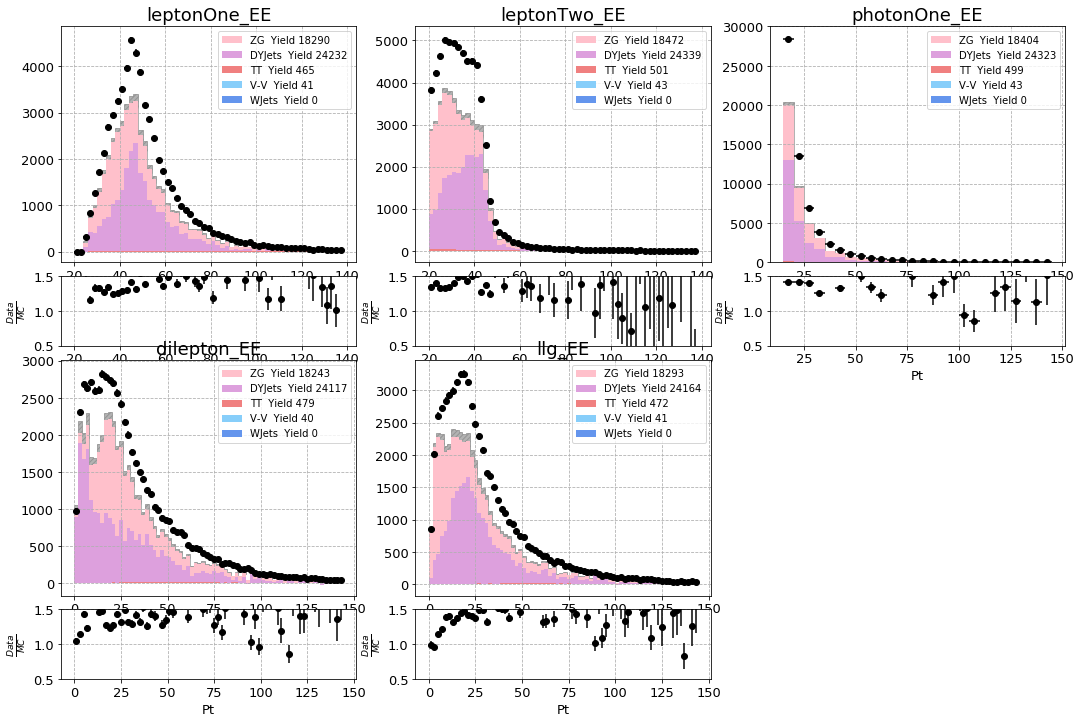

----------------Phi----------------
Just set plot param legend.loc empty


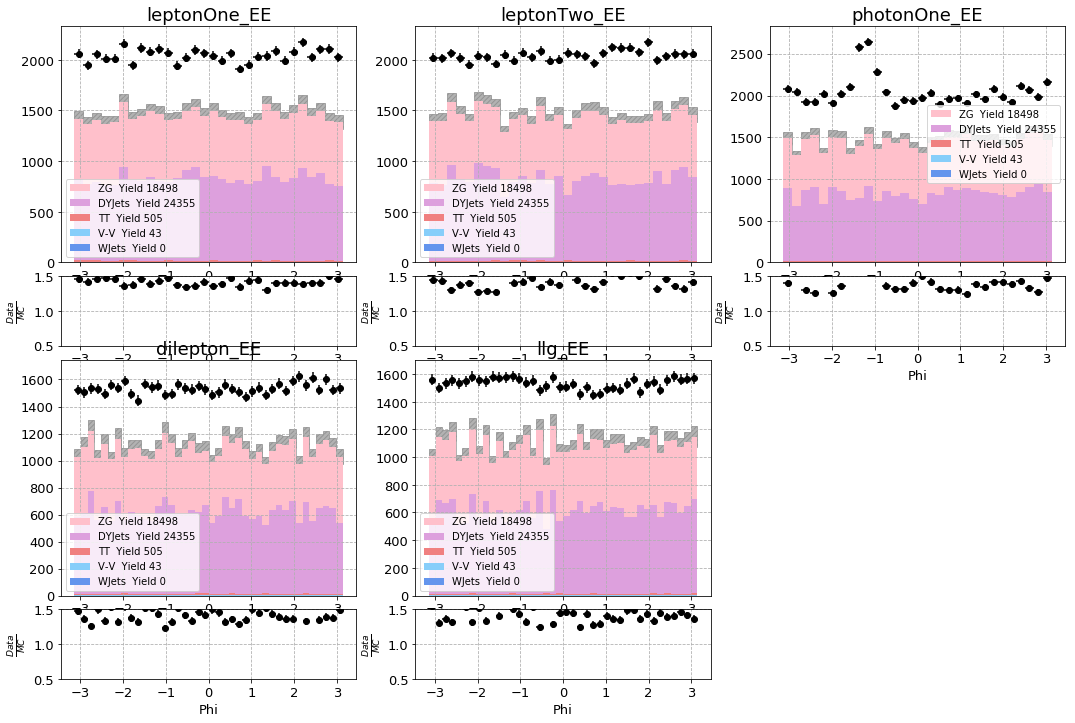

In [73]:
#################################################################
var = ['Pt','Phi']
part = ['leptonOne','leptonTwo','photonOne','dilepton','llg']
part = [p+'_EE' for p in part]

for v in var:

    print('----------------'+str(v)+'----------------')
    Plot_Mult(
              data,
              var              = v,
              part             = part,
              signalInclude    = True,
              figDim           = [2,3],
              customRange      = customRange,
              stacked          = stacked,
              log              = log,
              weightCorrection = weightCorrection,
              Plotting         = True,
              StatInclude      = StatInclude,
             )

In [74]:
'''
plt.hist(DYJets.df.photonIDWeight
        )
'''
DF = read_root("/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V1_trigBits/DYJets/output_DYJets_v_0.root")

In [75]:
DF.photonIDWeight

0         1.036713
1         1.132832
2         1.088515
3         1.070086
4         1.025425
            ...   
216101    0.938685
216102    0.969321
216103    1.036713
216104    1.036713
216105    1.132832
Name: photonIDWeight, Length: 216106, dtype: float32

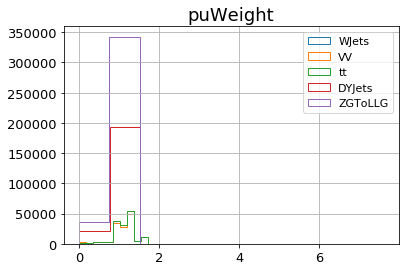

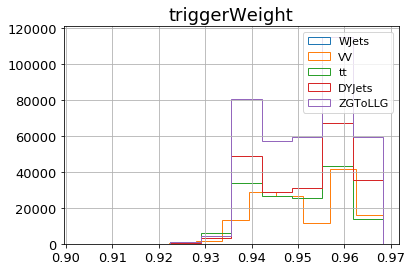

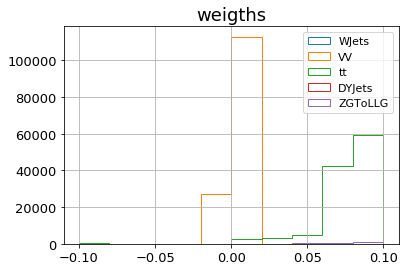

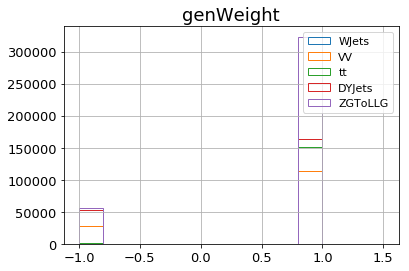

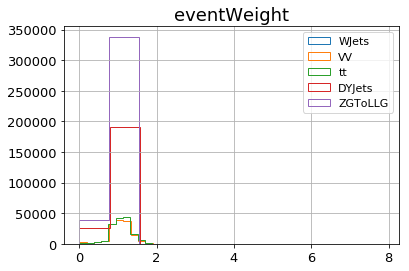

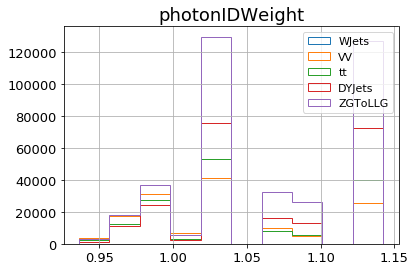

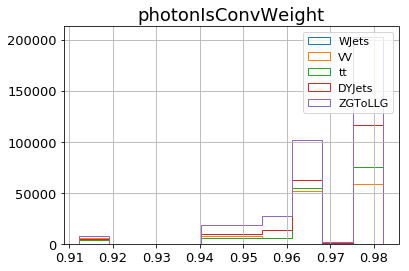

In [77]:
var = 'puWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()

var = 'triggerWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()





plt.figure()
var = 'weights'
plt.title('weigths')
for d in data[:-1]:
    plt.hist(getattr(d,var),
             histtype = 'step',
                range = [-0.1,0.1],
             label = d.name,
            )
plt.legend()


var = 'genWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()

var = 'eventWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()

var = 'photonIDWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()

var = 'photonIsConvWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()





#([self.ScaleFactor(era) for _ in range(self.sampLength)]))

In [78]:
Print = False

# Test Plot

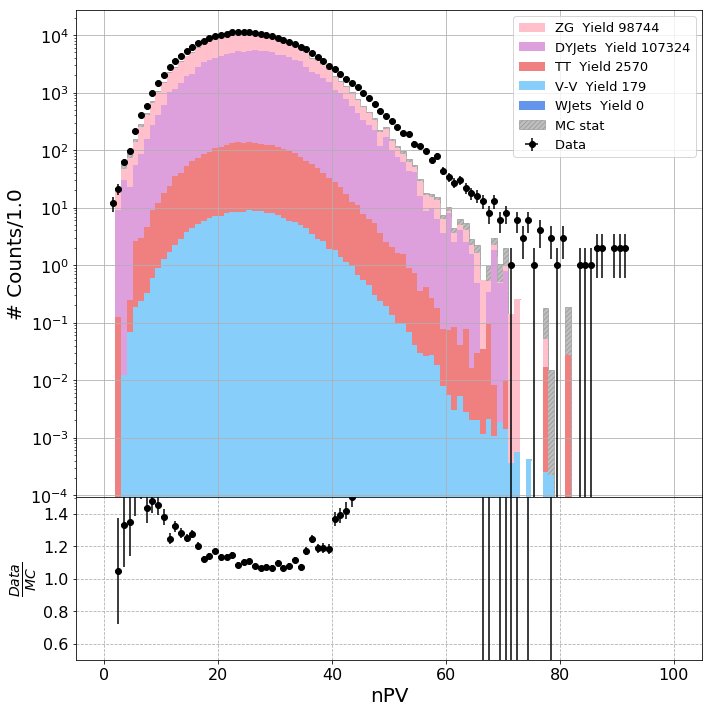

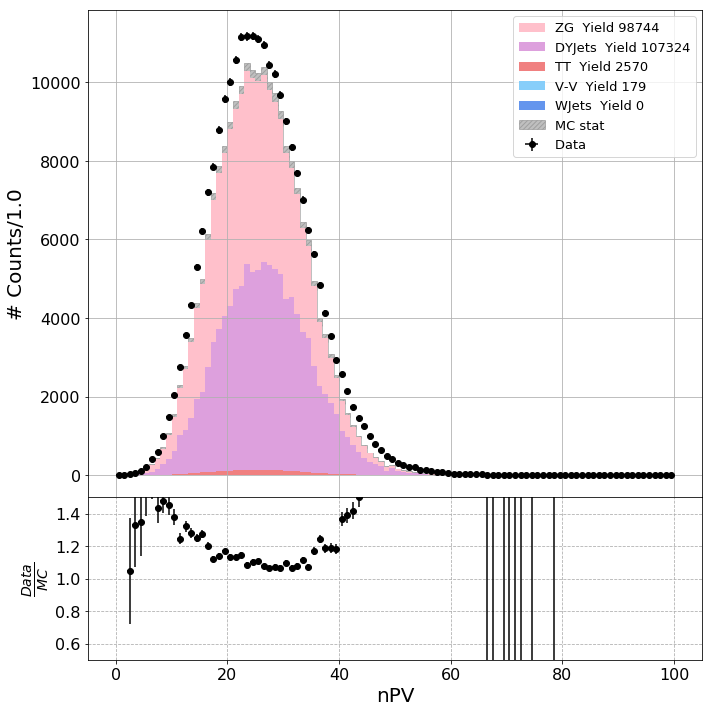

In [79]:
for log in [True,False]:
    for v in ['nPV']:
        for p in ['']:
            Plotter.Plot(
                         data,
                         var              = v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = True,
                         density          = False,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Plotting         = True,
                         Blind            = True,
                         StatInclude      = StatInclude,
                         CustomeRangeBins = [],
                         Print            = Print,
                         #index            = Region+'_'+phType+"_"+xsec,
                         index            = Region+'_'+phType+label,
                        );

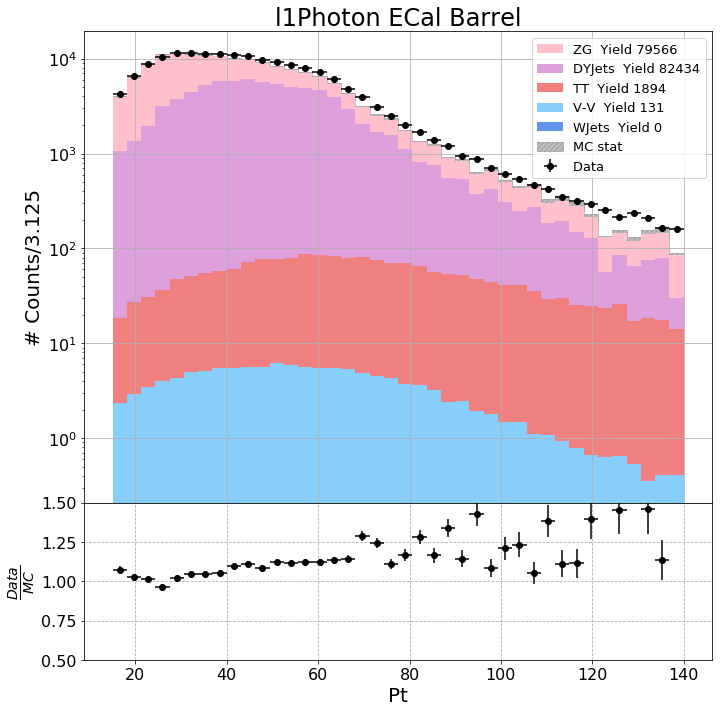

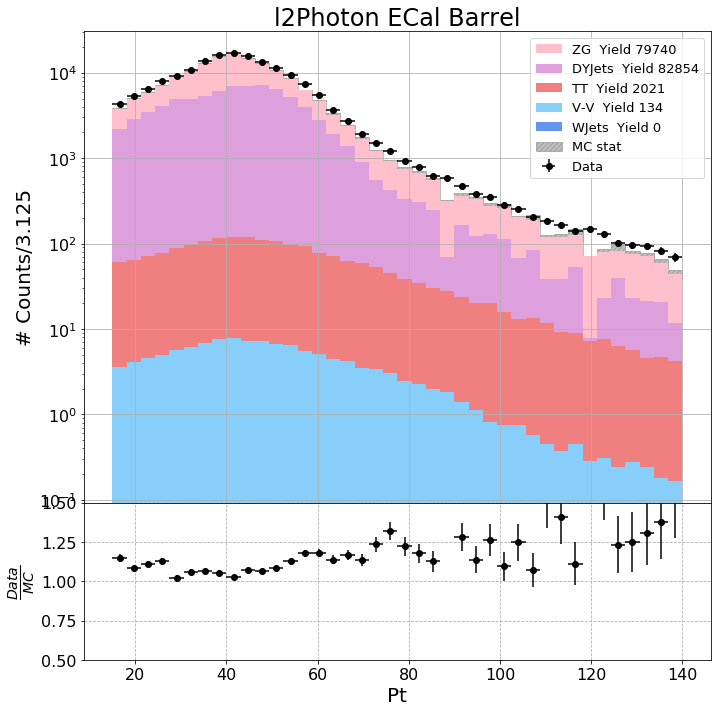

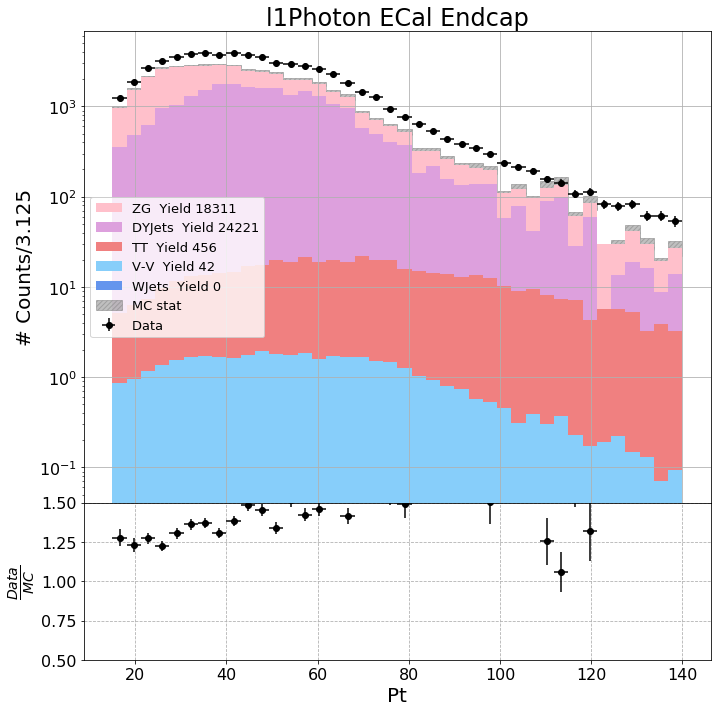

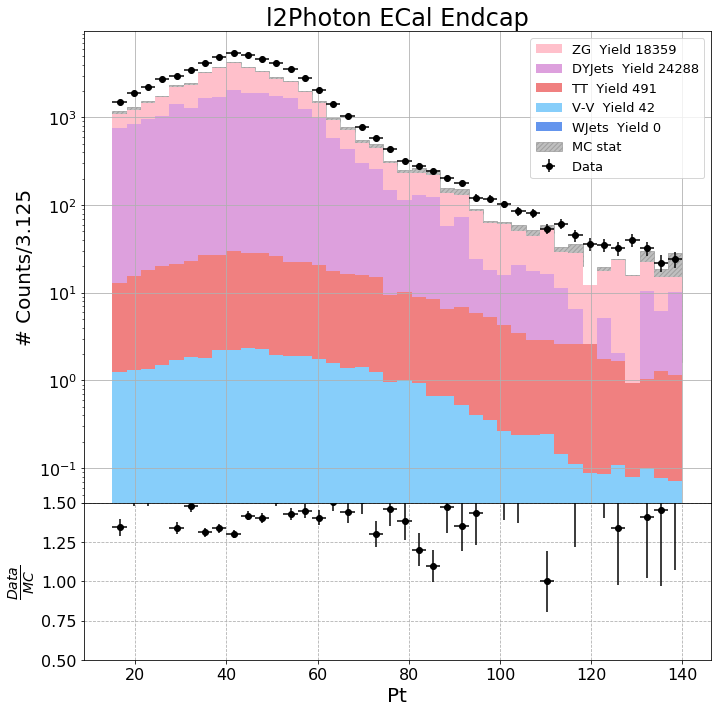

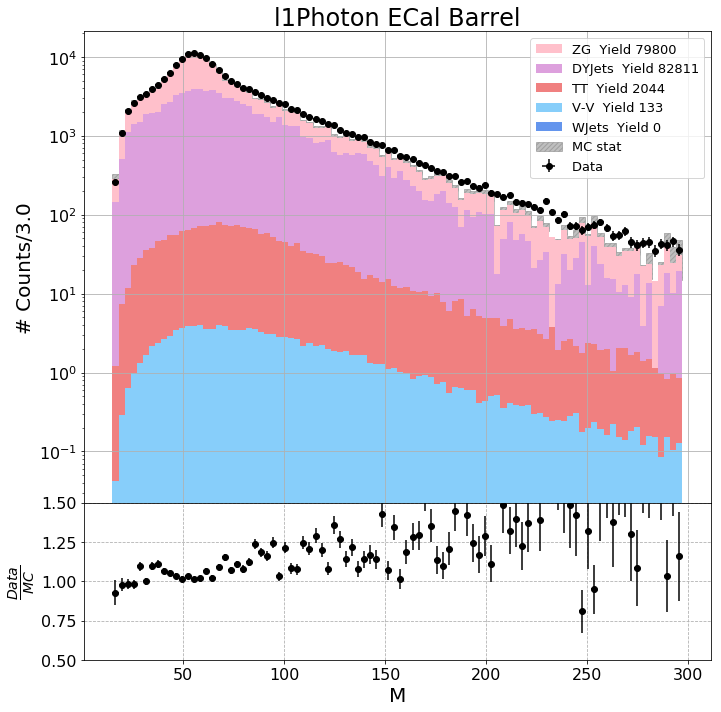

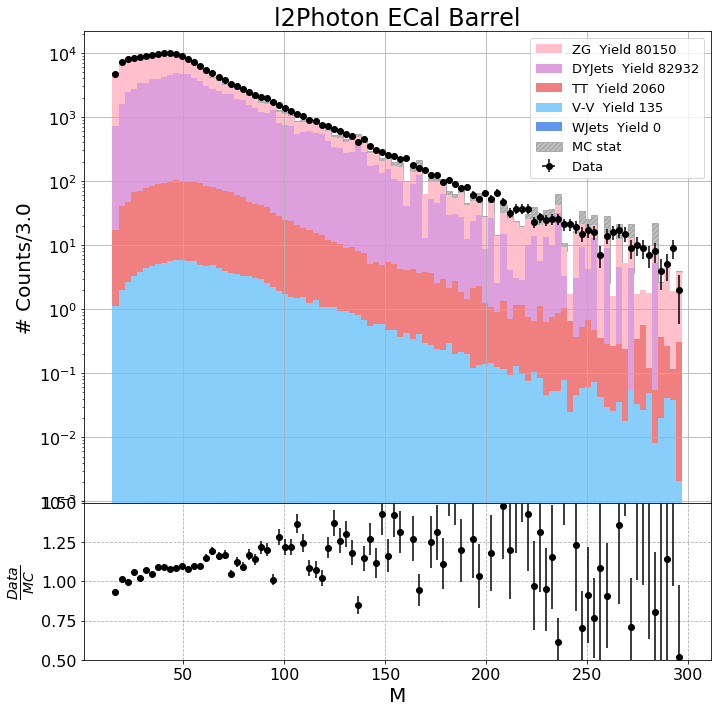

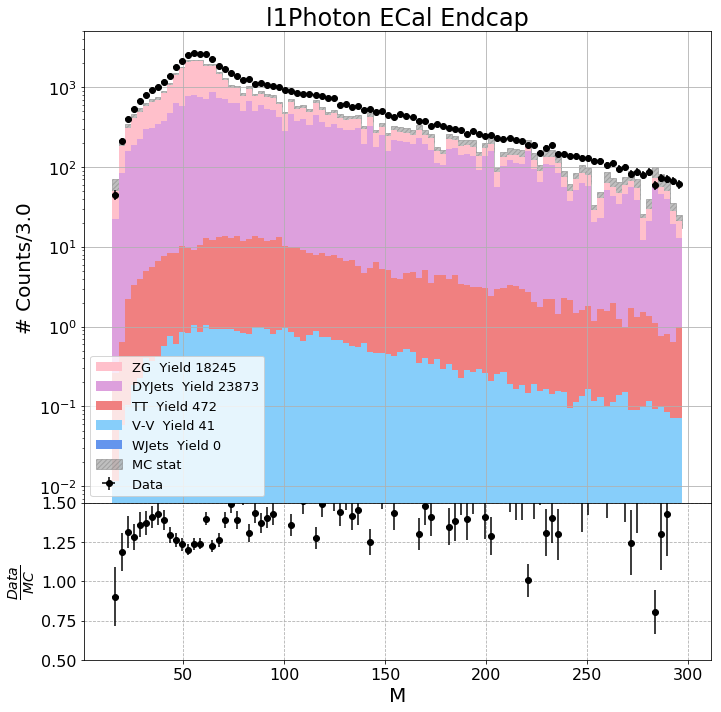

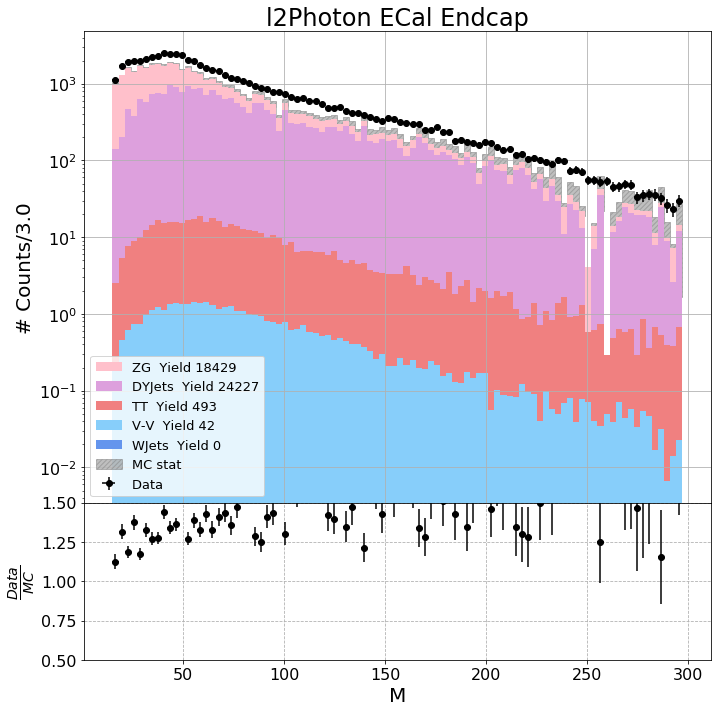

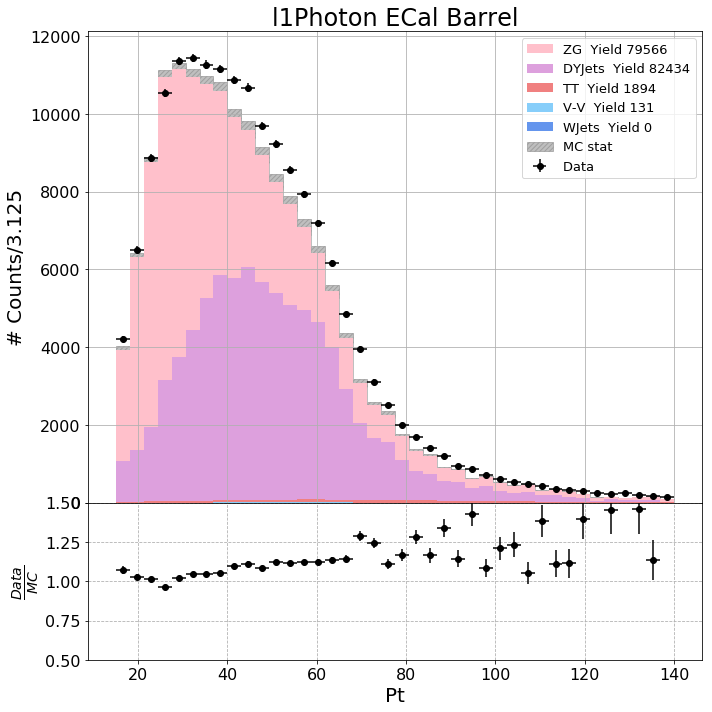

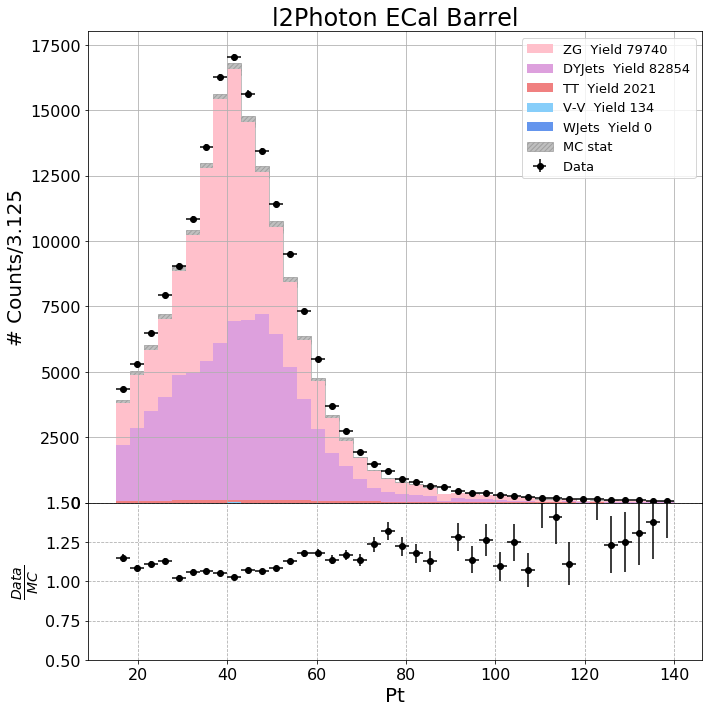

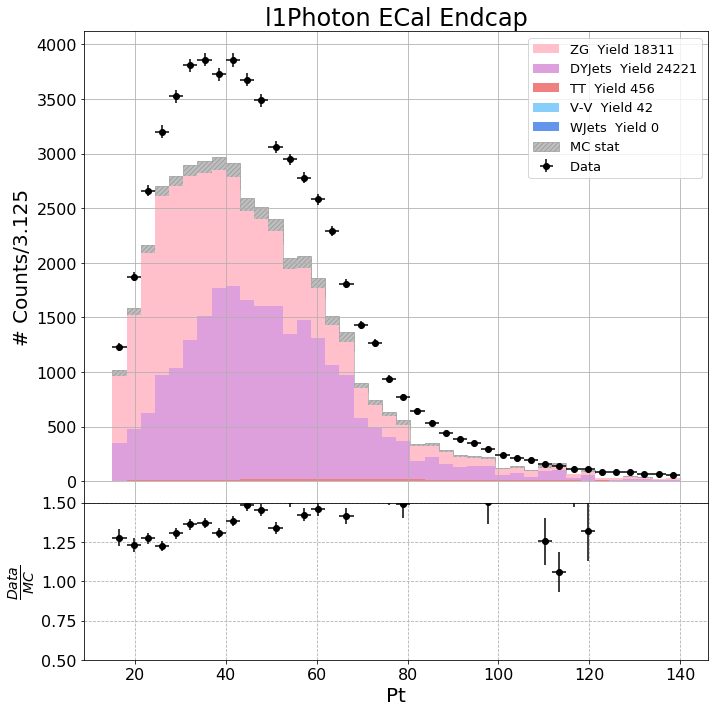

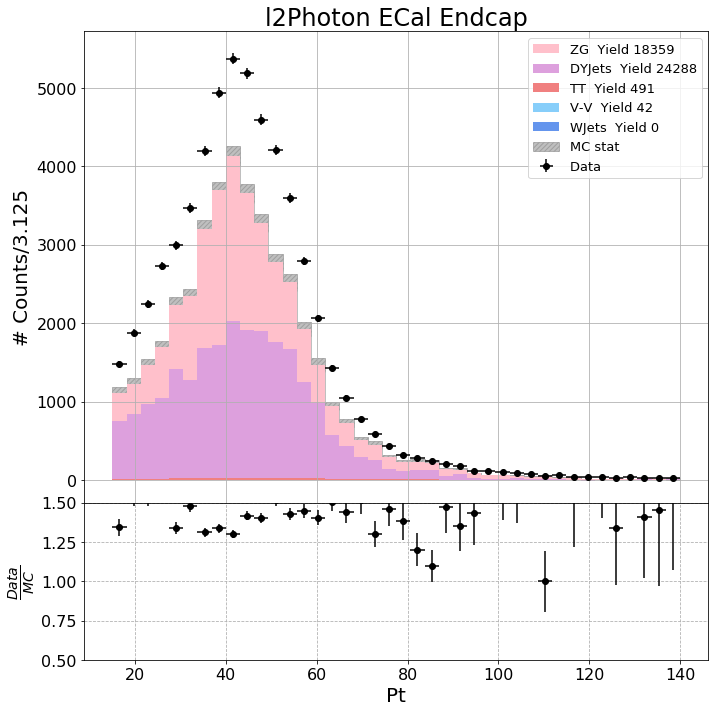

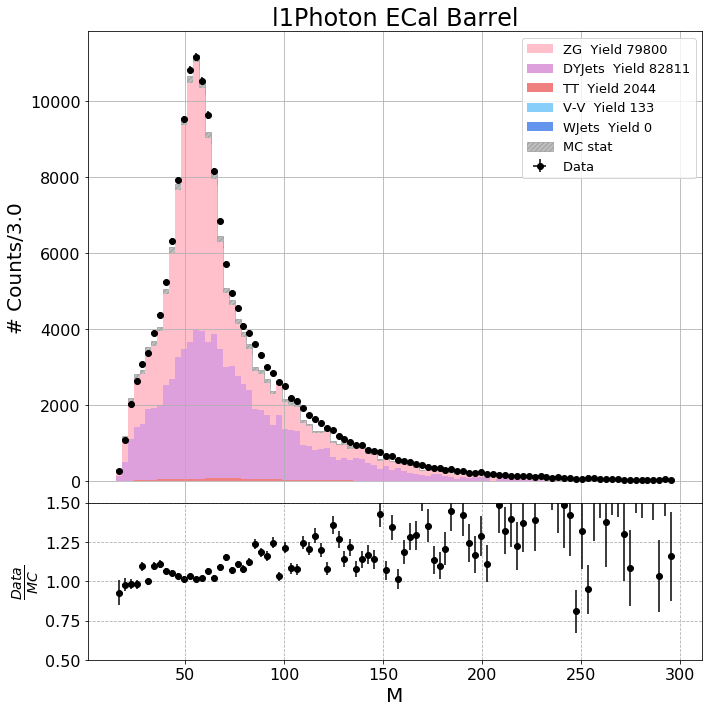

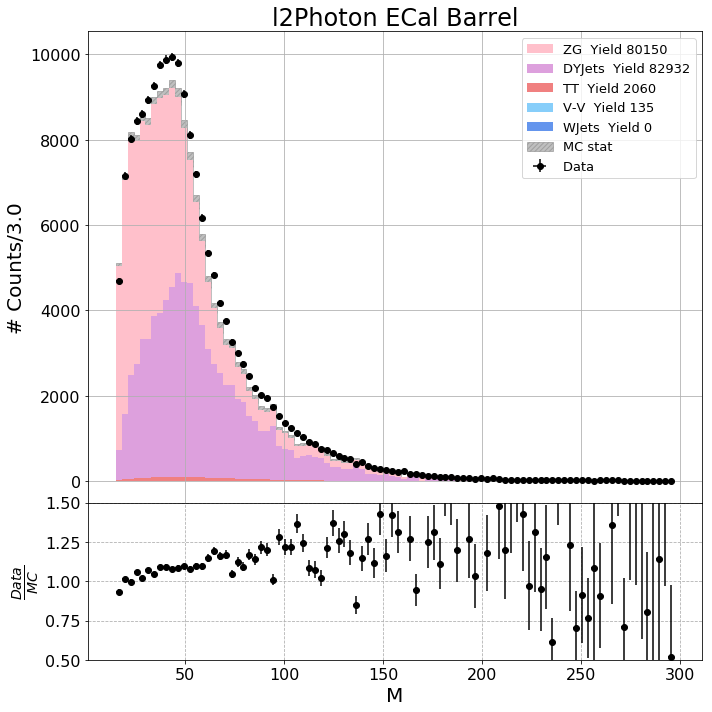

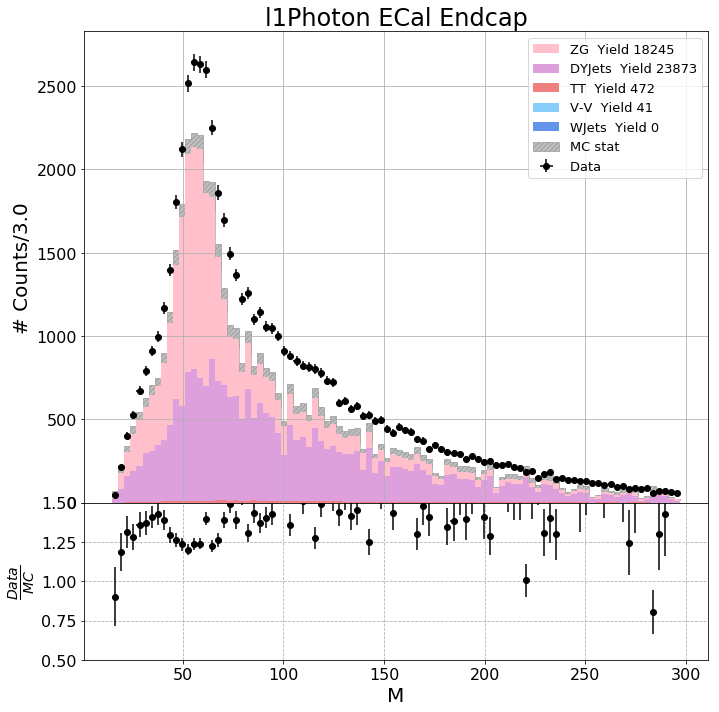

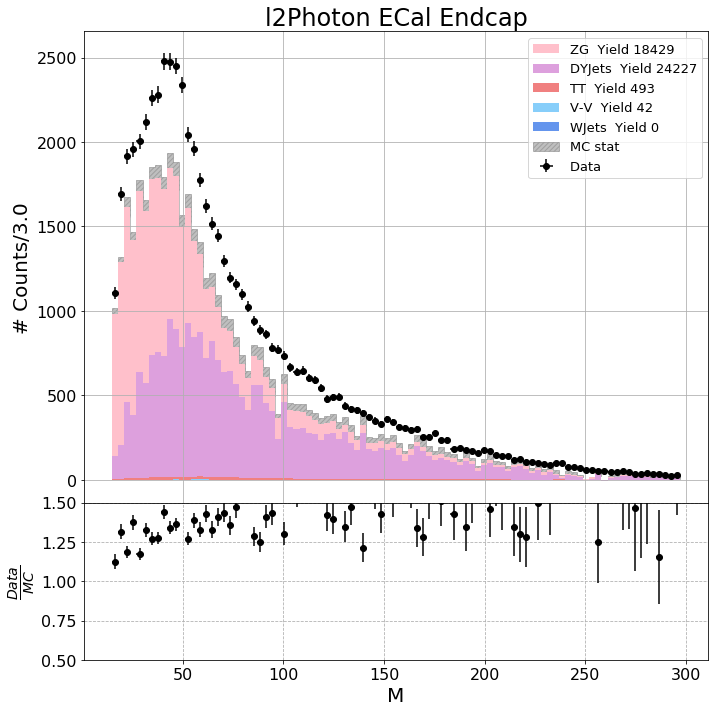

In [80]:
for log in [True,False]:
    for v in ['Pt','M']:
        for phType in ['_EB','_EE']:
            for p in ['l1Photon'+phType,'l2Photon'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = True,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             Print            = Print,
                             index            = Region+'_'+phType,
                            );

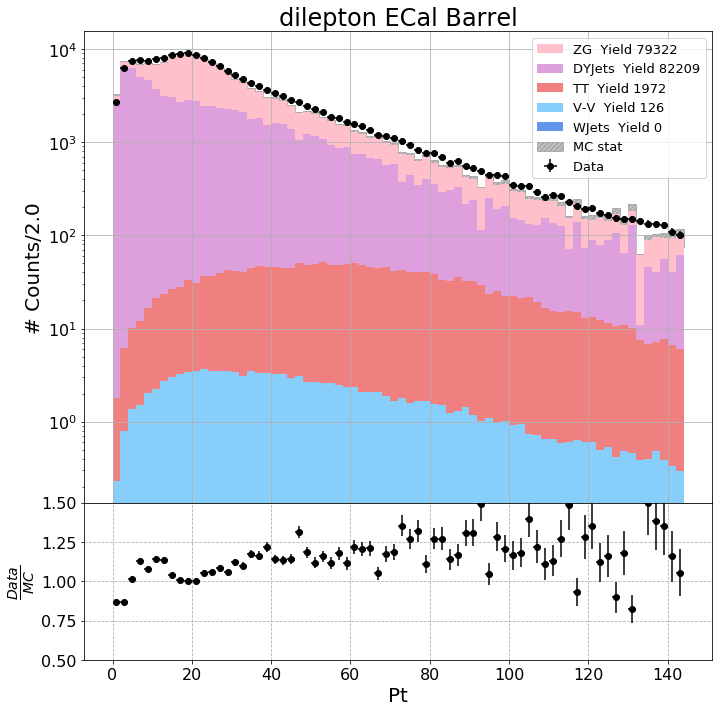

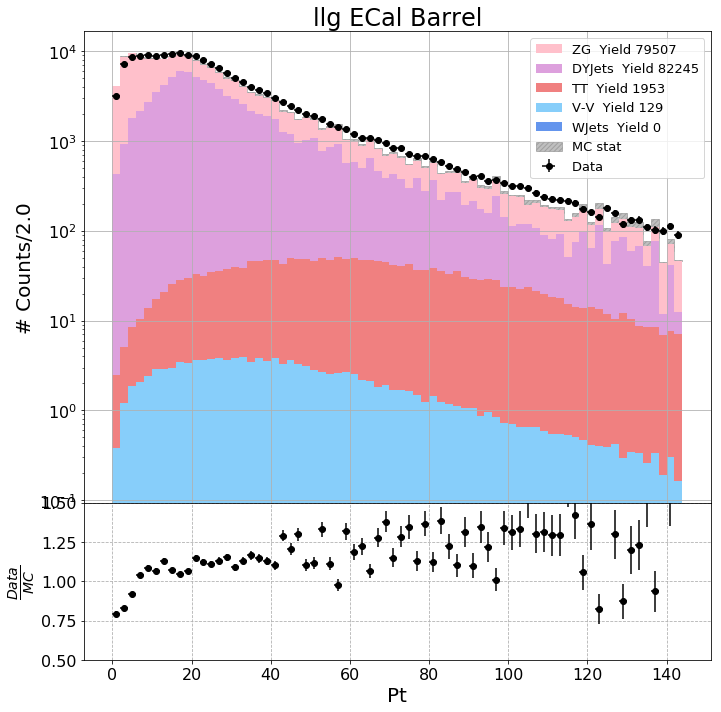

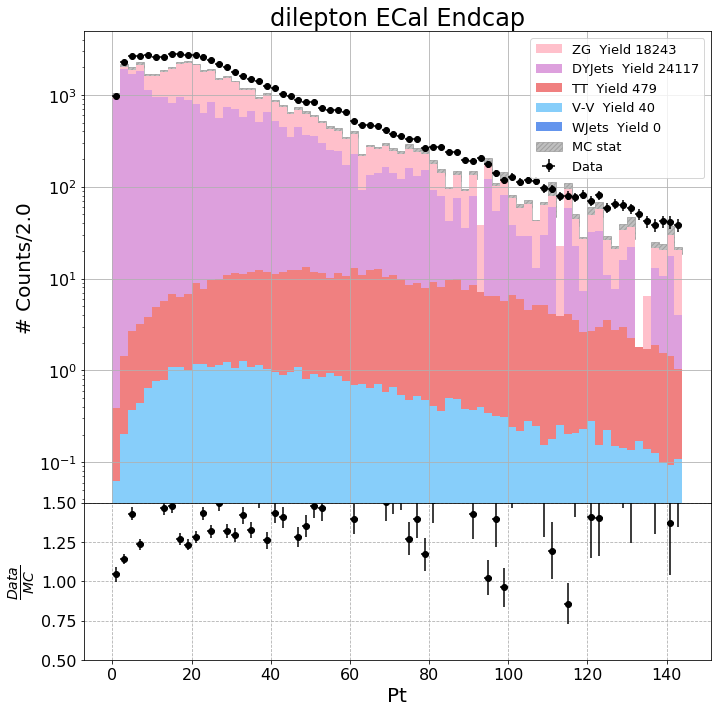

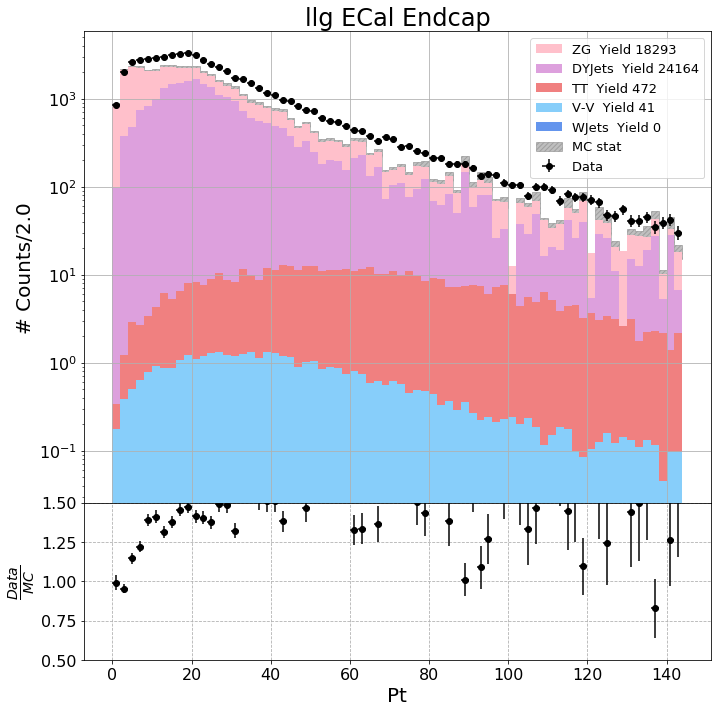

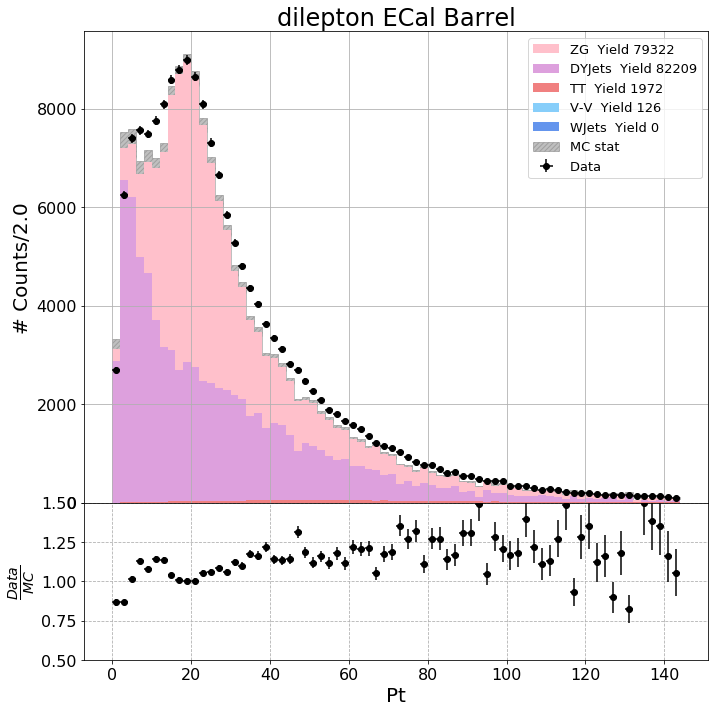

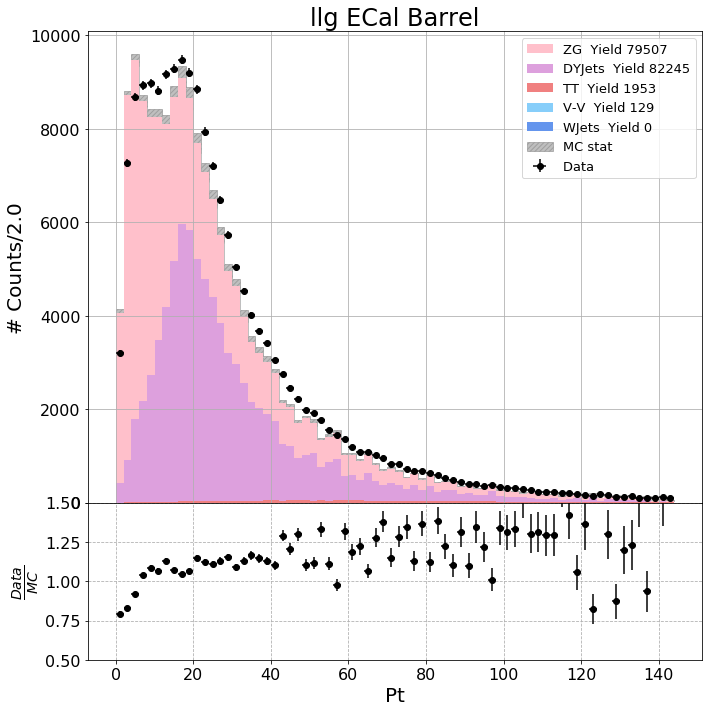

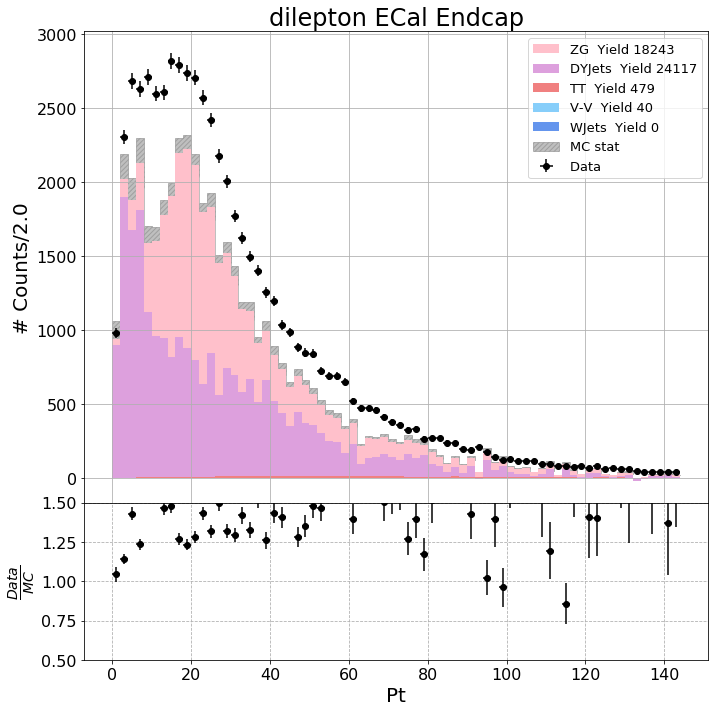

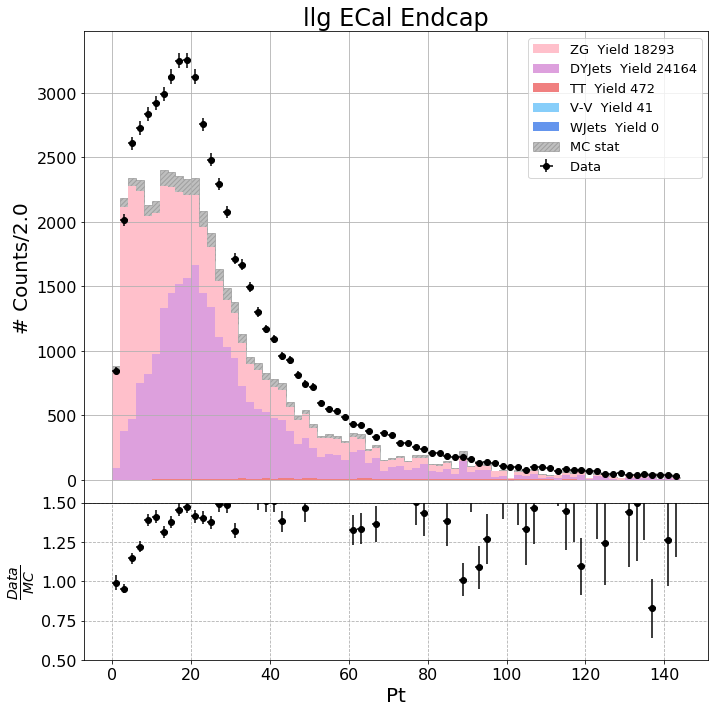

In [81]:
for log in [True,False]:
    for v in ['Pt']:
        for phType in ['EB','EE']:
            for p in ['dilepton_'+phType,'llg_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             Print            = Print,
                             index            = Region+'_'+phType,
                            );

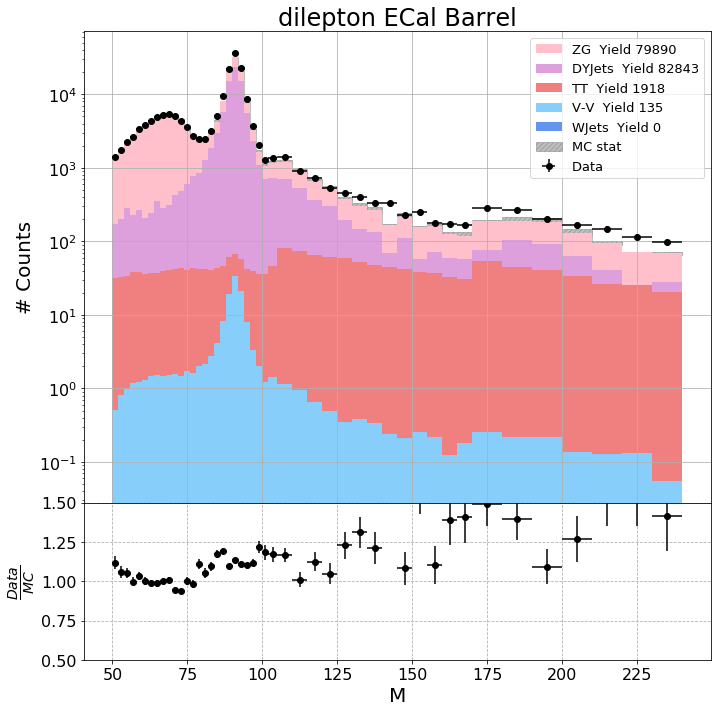

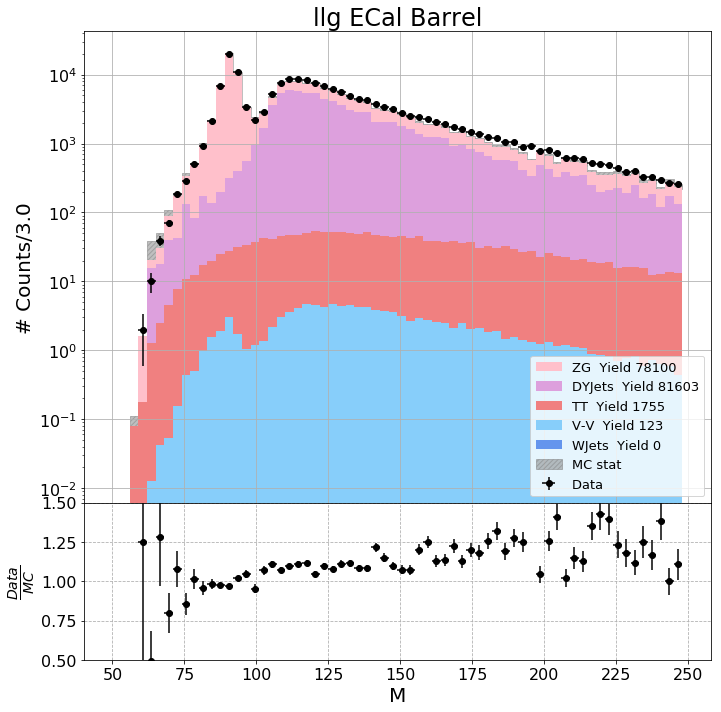

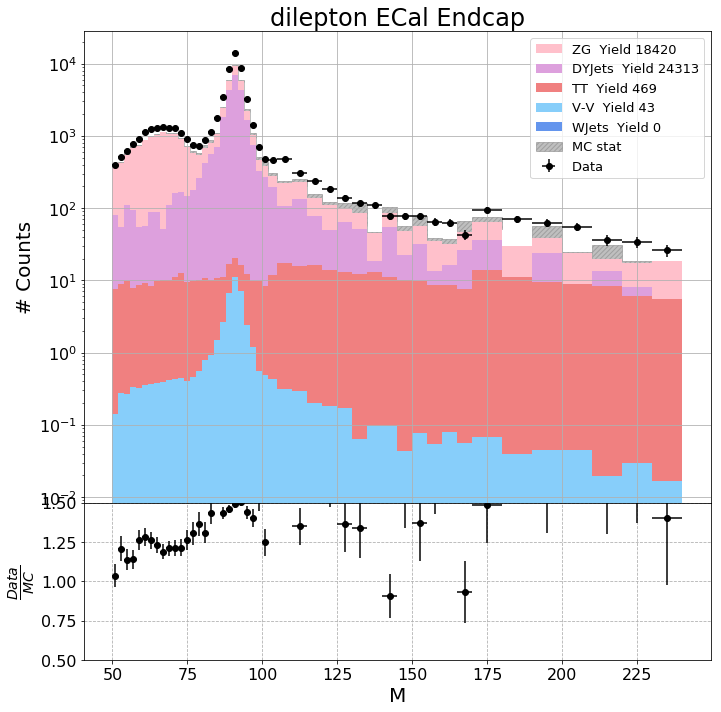

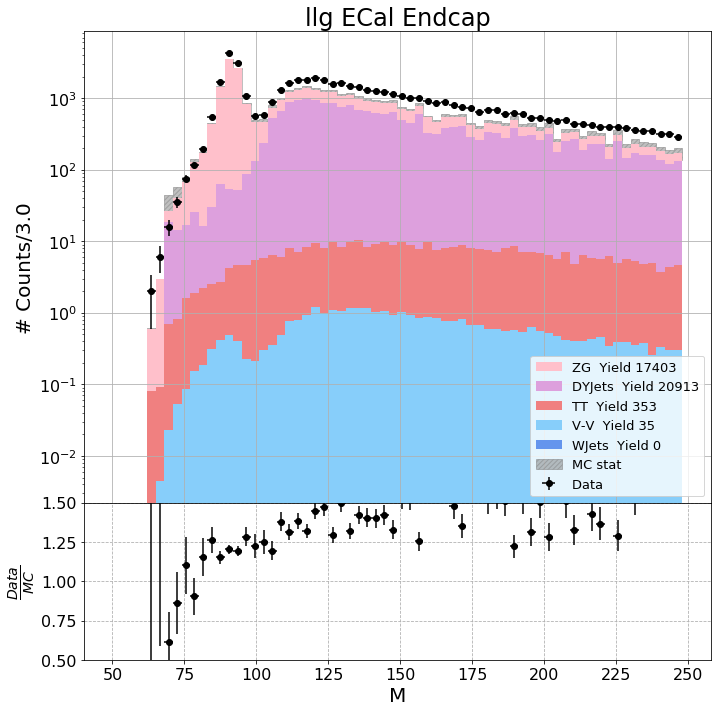

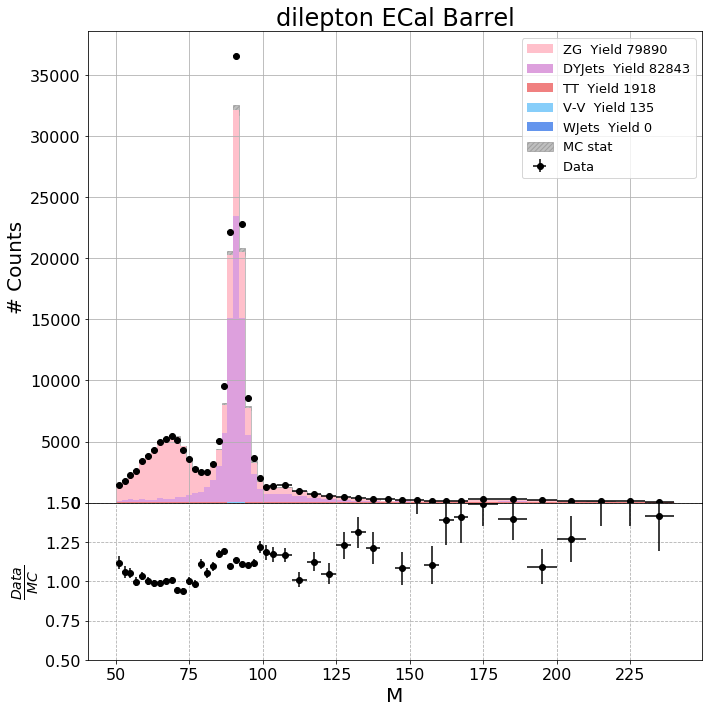

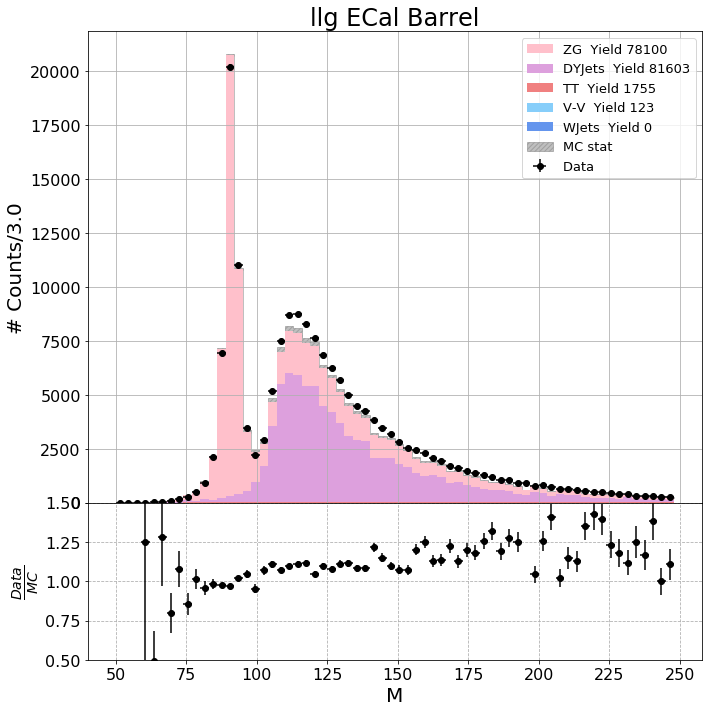

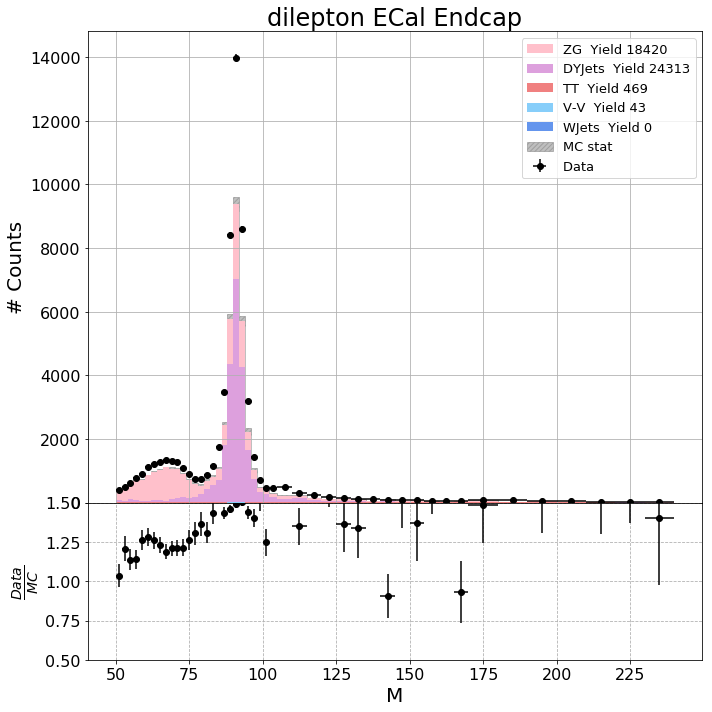

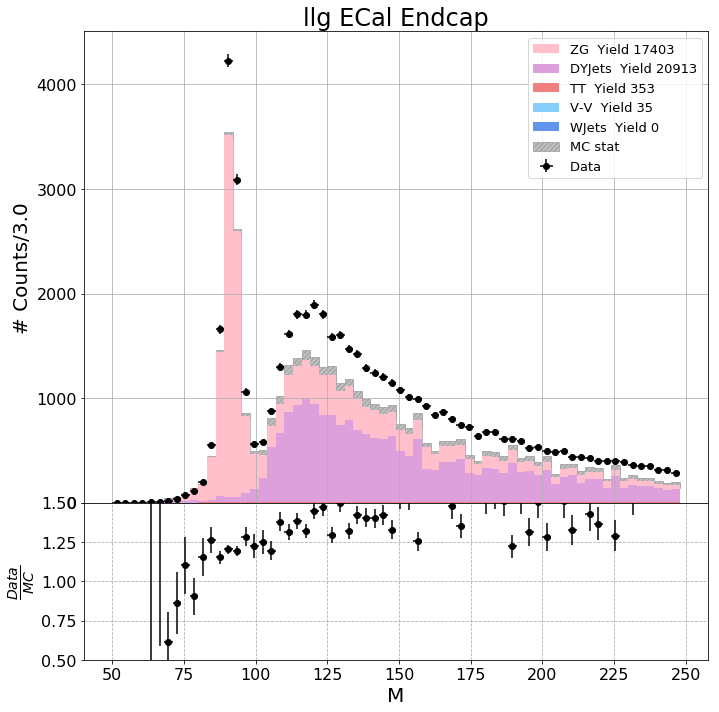

In [82]:
for log in [True,False]:
    for v in ['M']:
        for phType in ['EB','EE']:
            for p in ['dilepton_'+phType,'llg_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             Print            = Print,
                             index            = Region+'_'+phType,
                            );

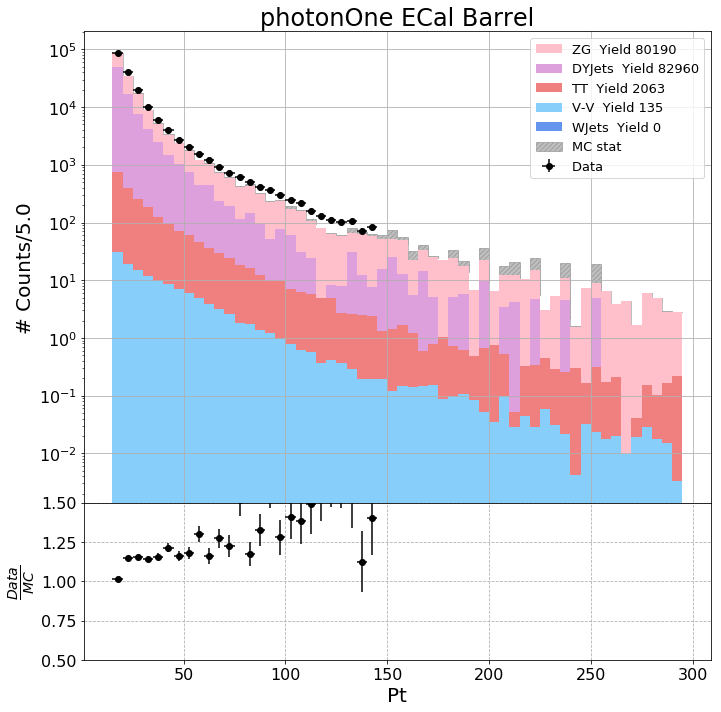

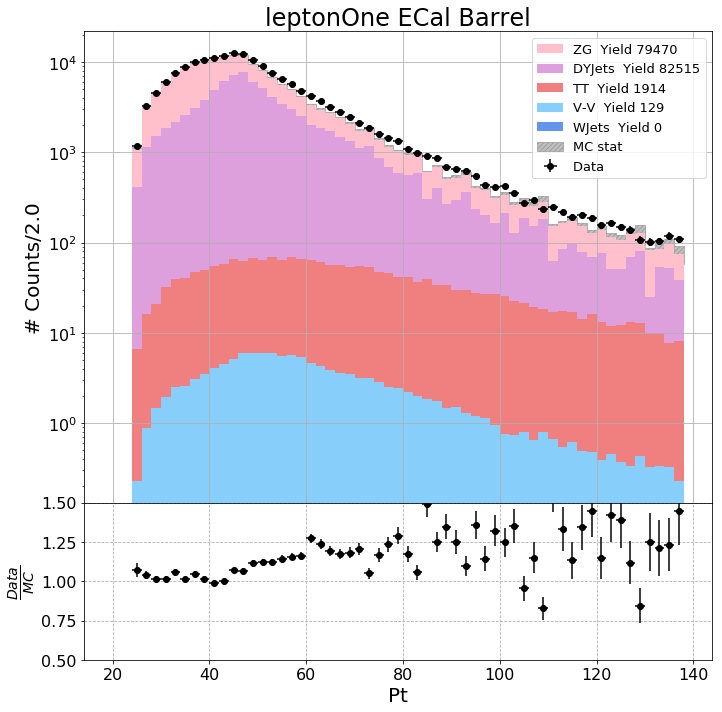

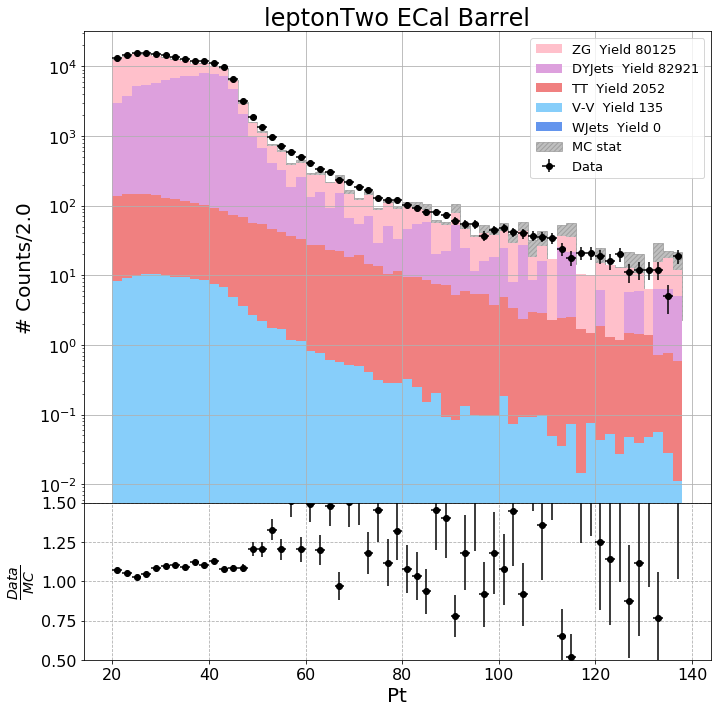

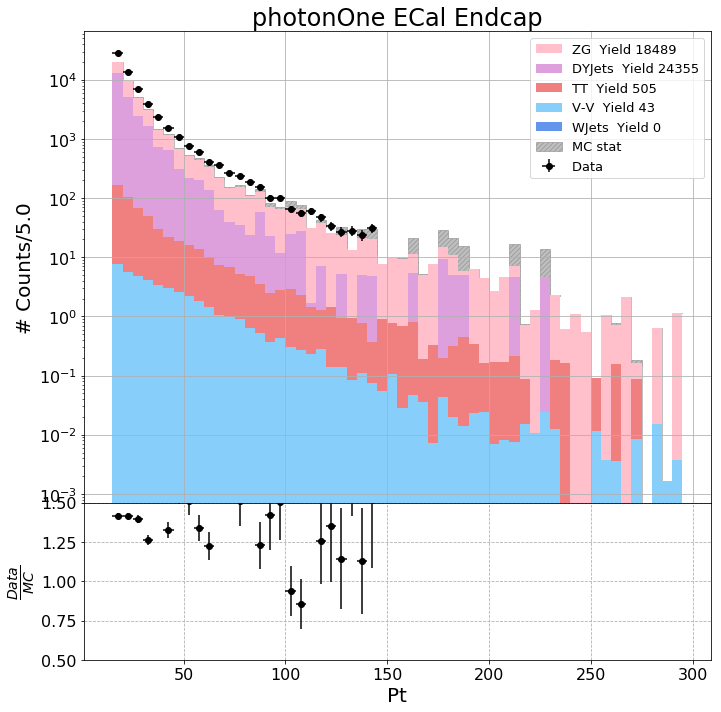

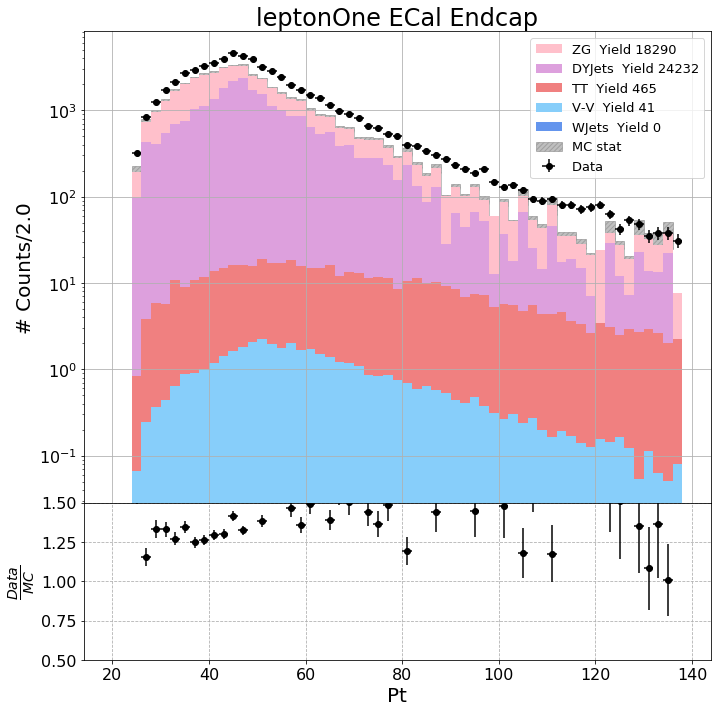

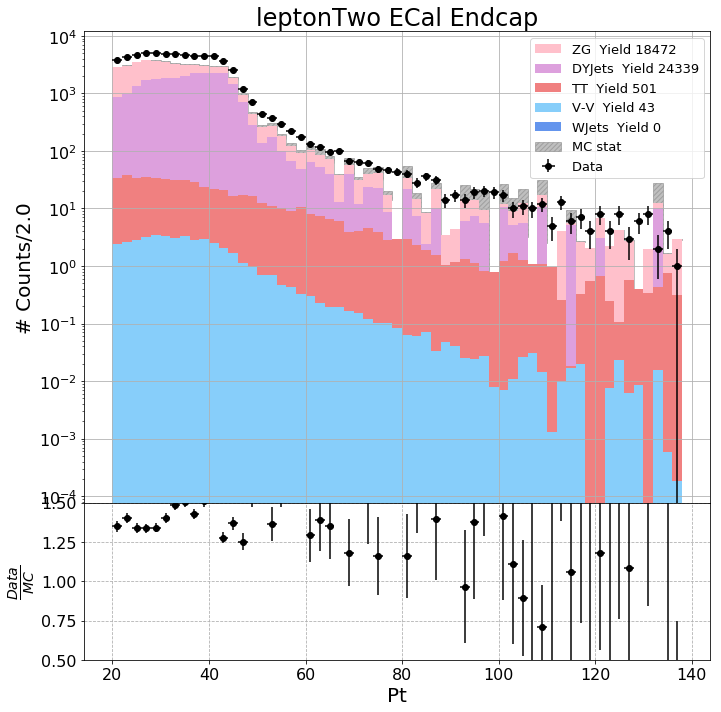

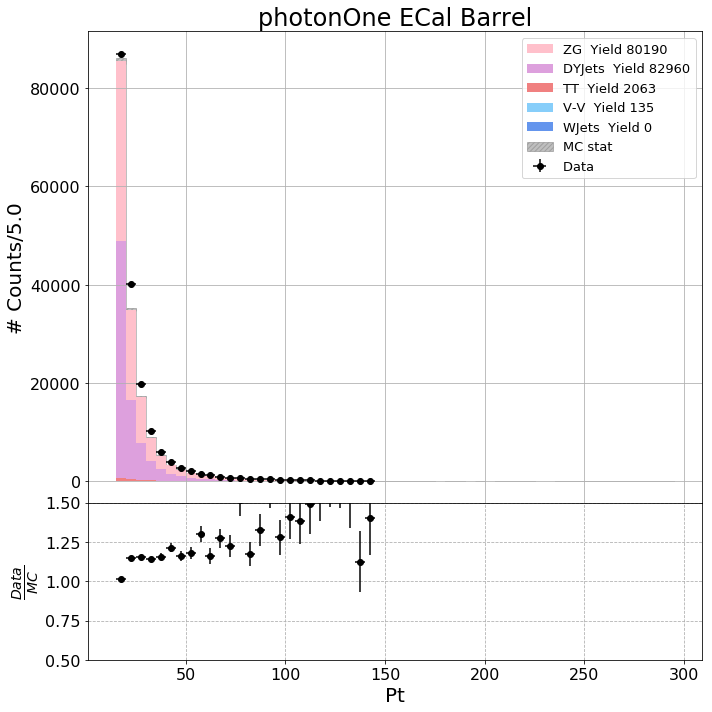

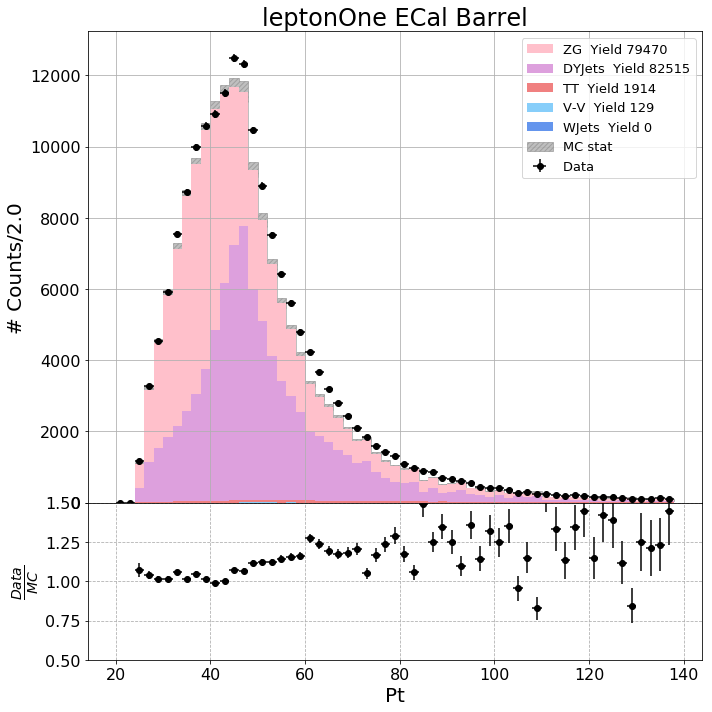

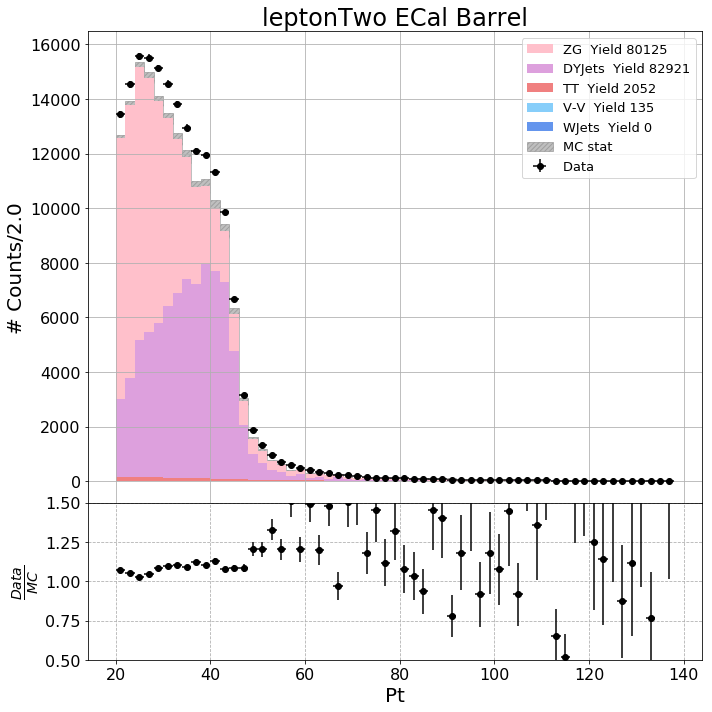

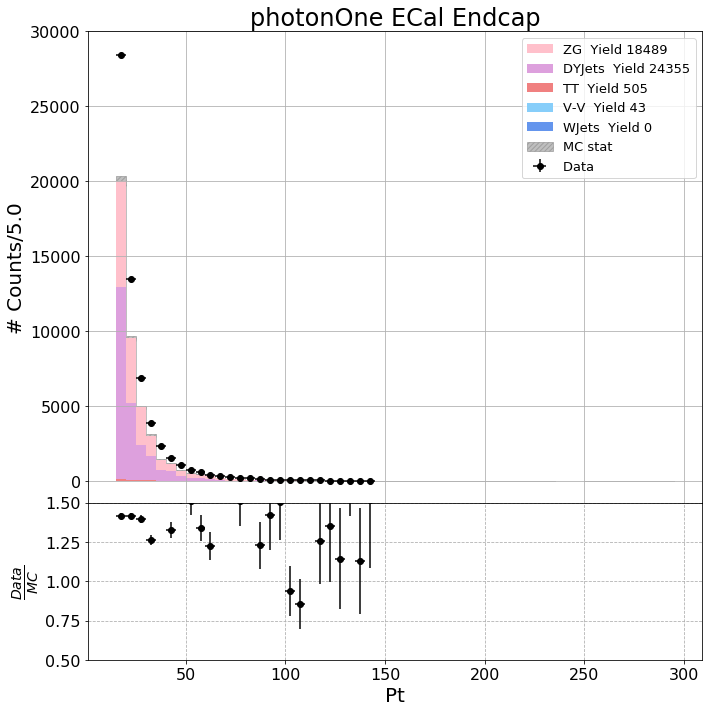

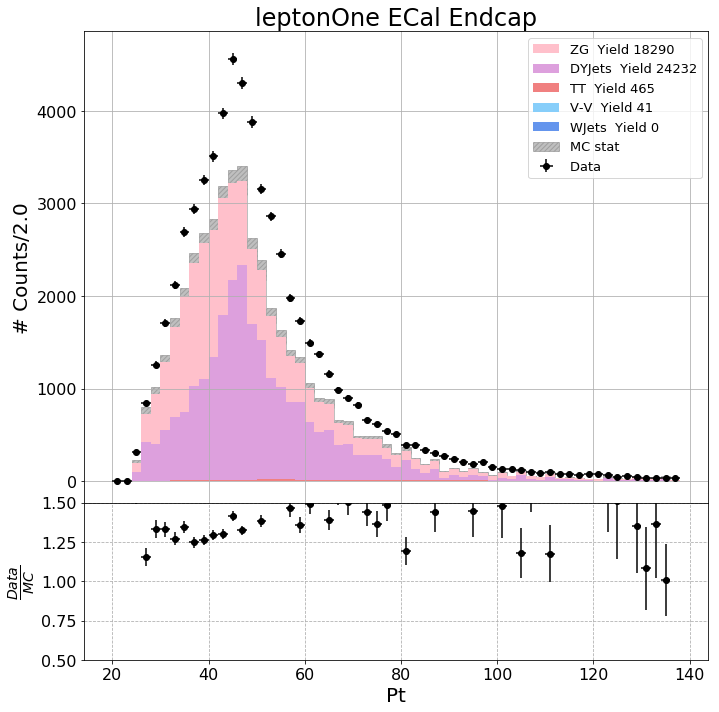

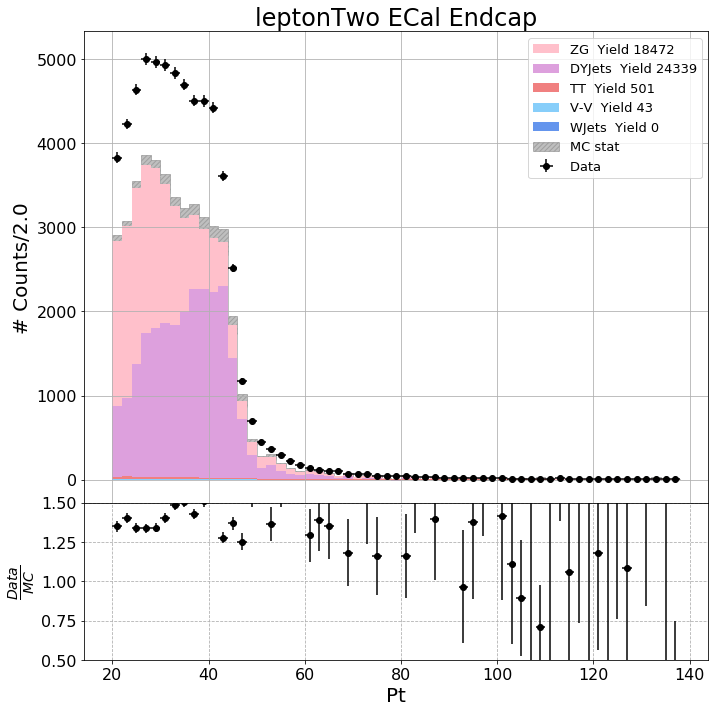

In [83]:
for log in [True,False]:
    for v in ['Pt']:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType,'leptonOne_'+phType,'leptonTwo_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType,
                            );

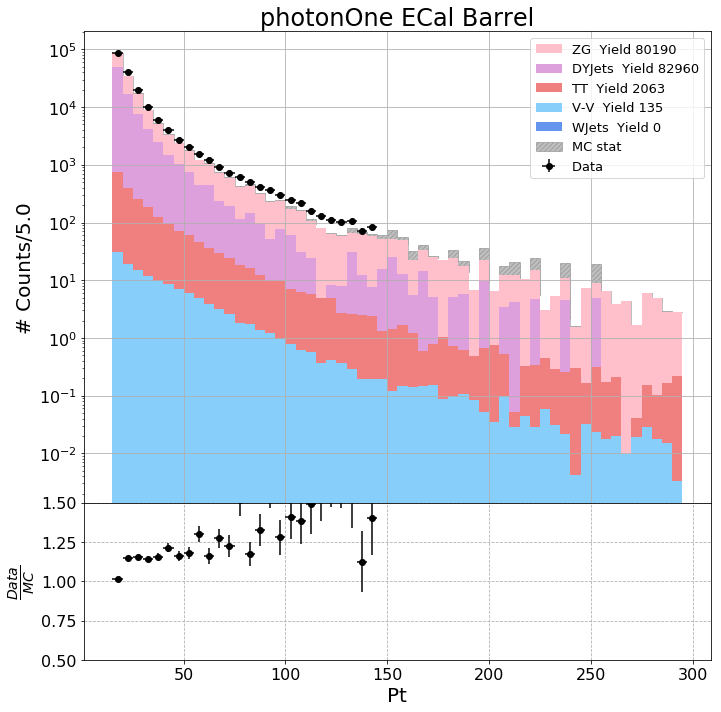

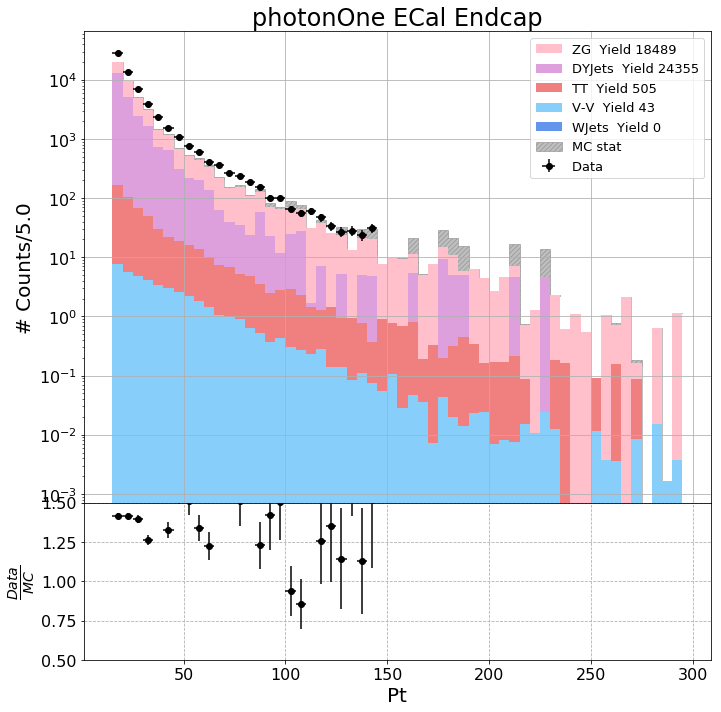

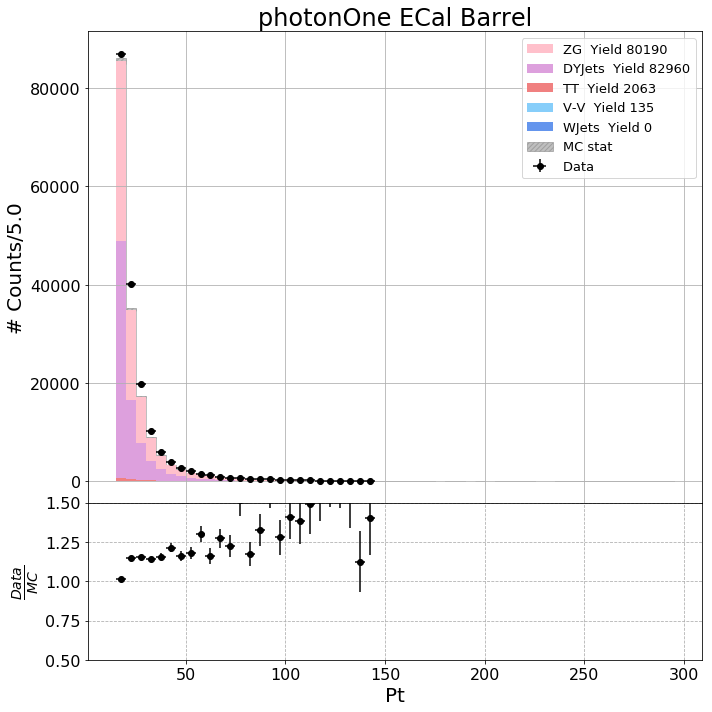

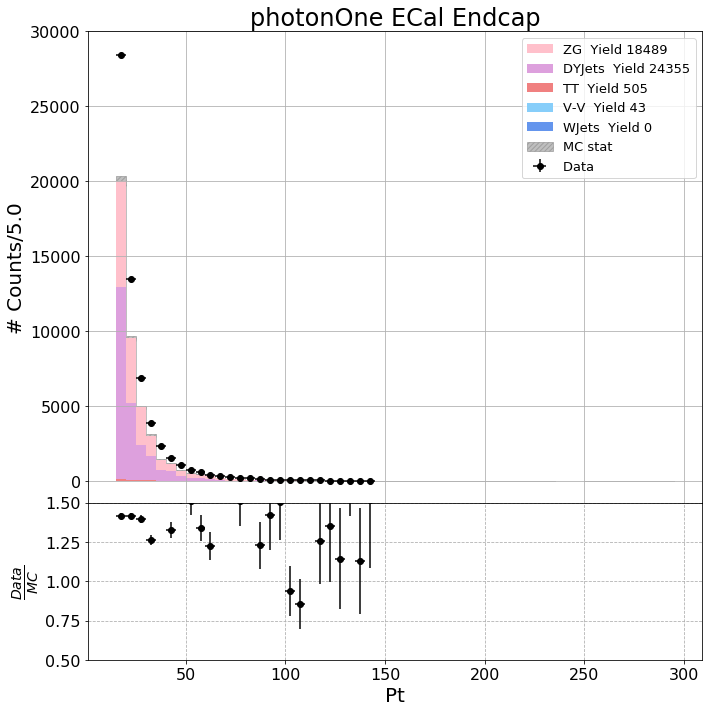

In [84]:
for log in [True,False]:
    for v in ['Pt']:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType+SampleSet,
                            );

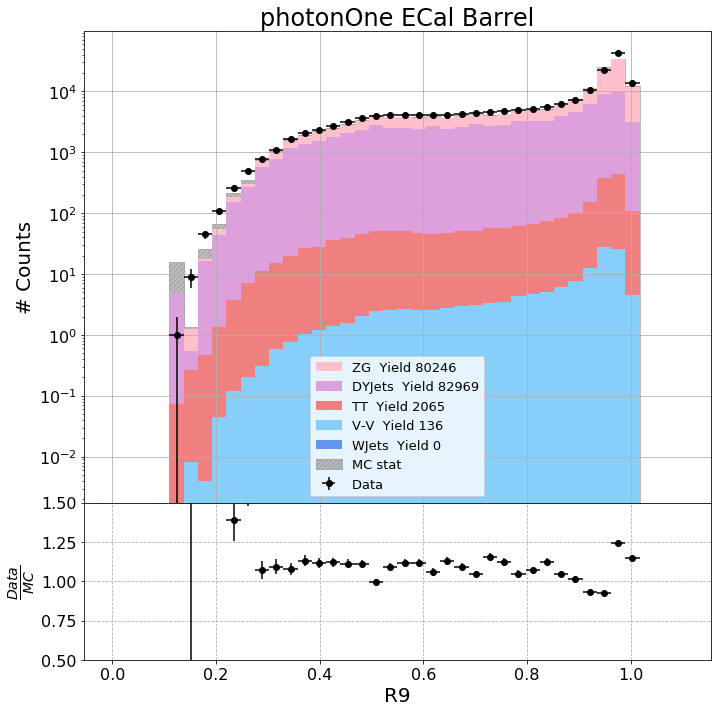

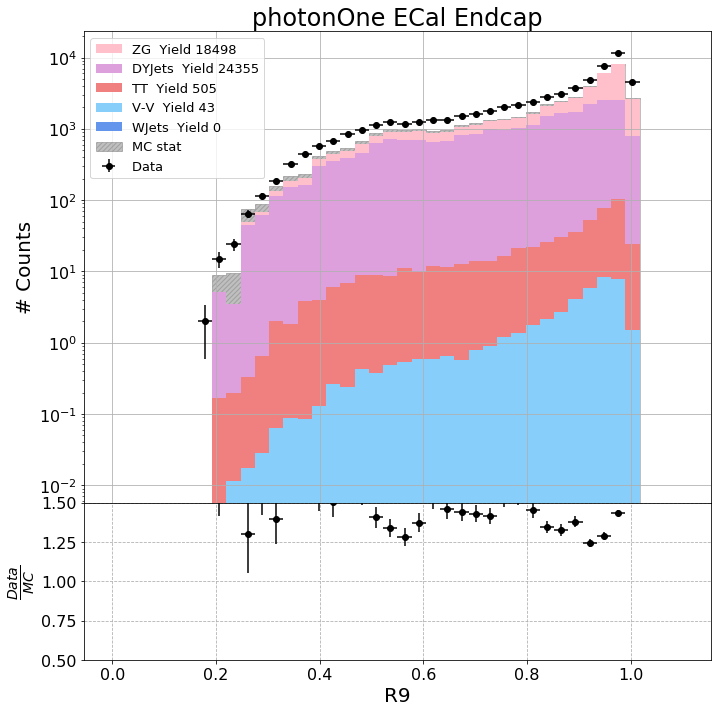

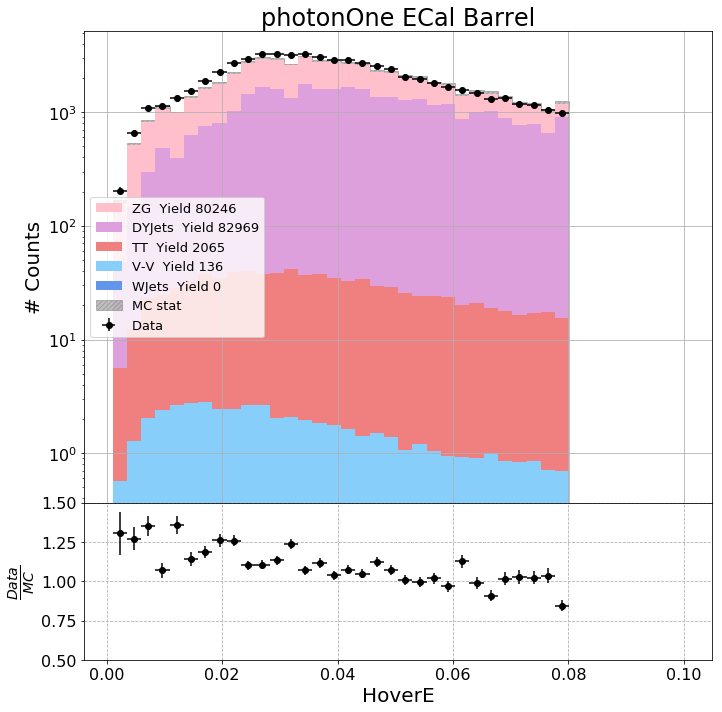

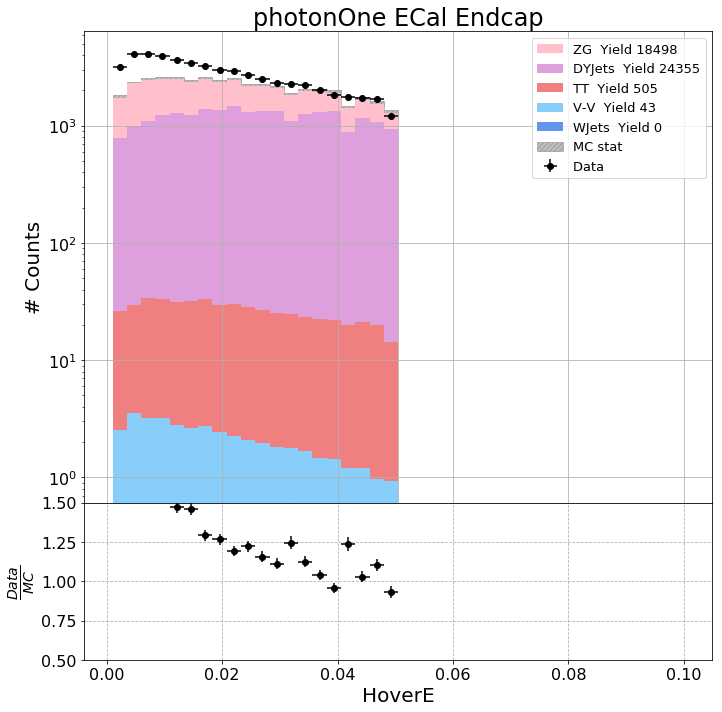

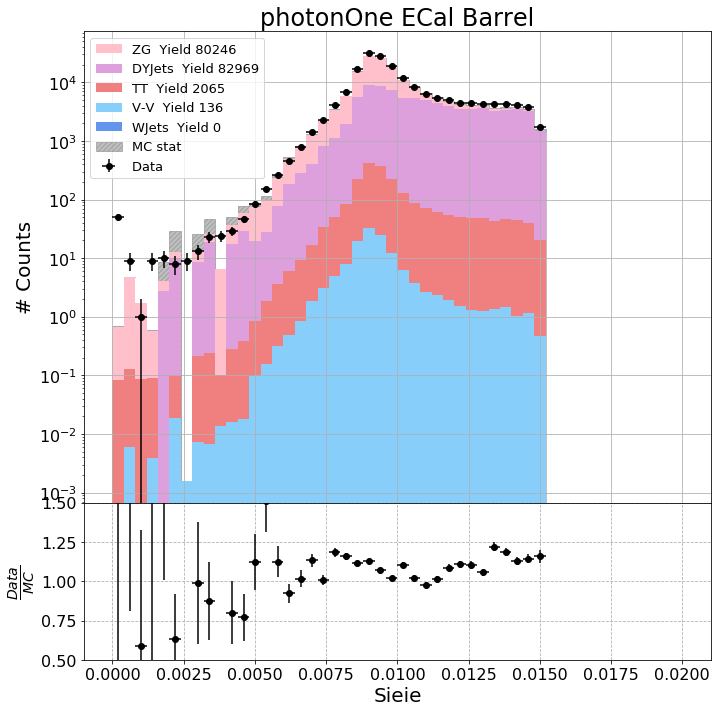

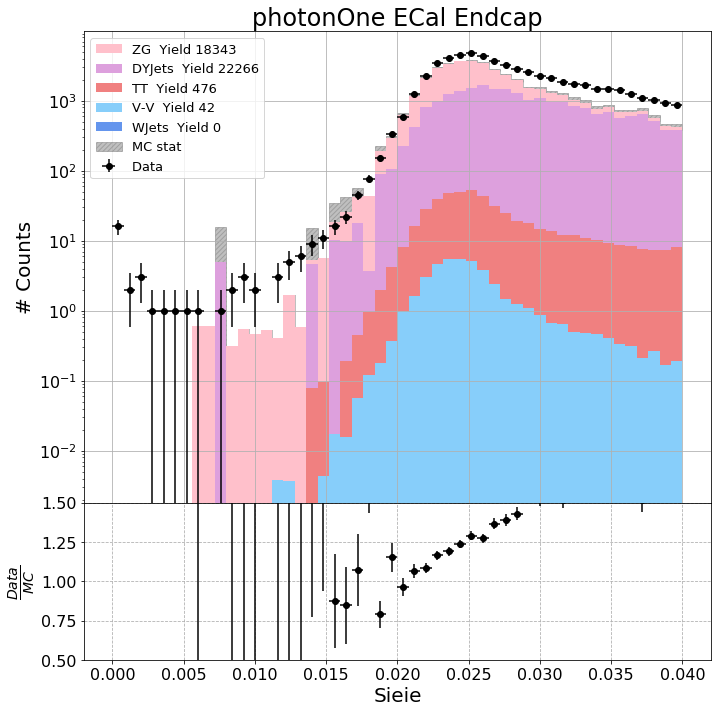

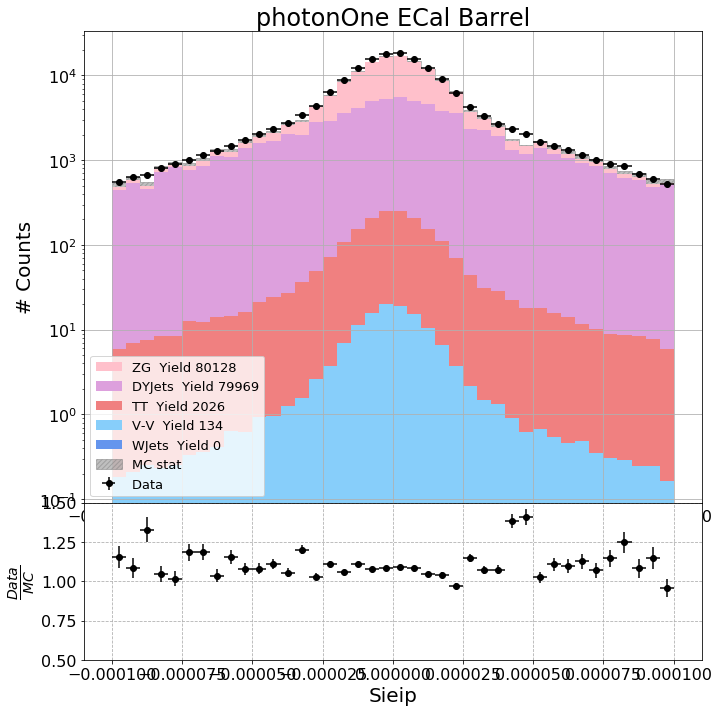

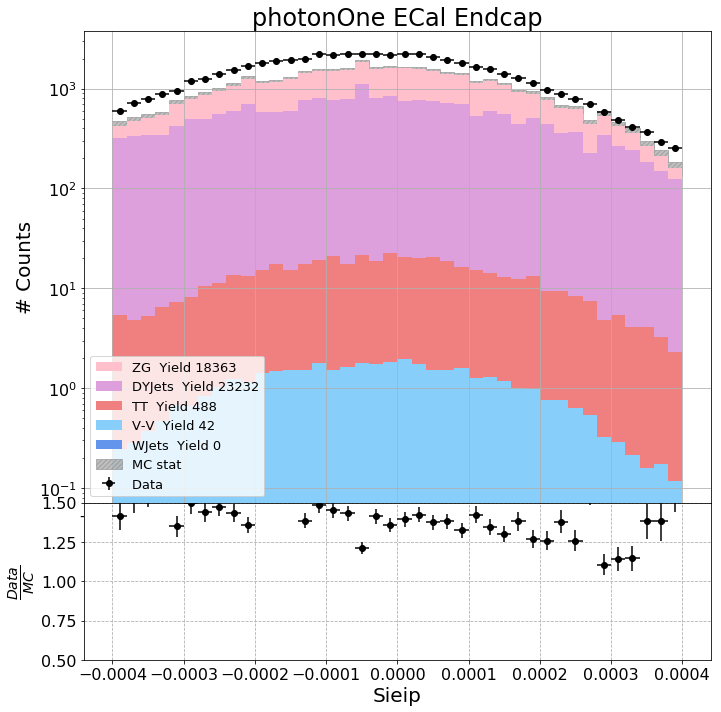

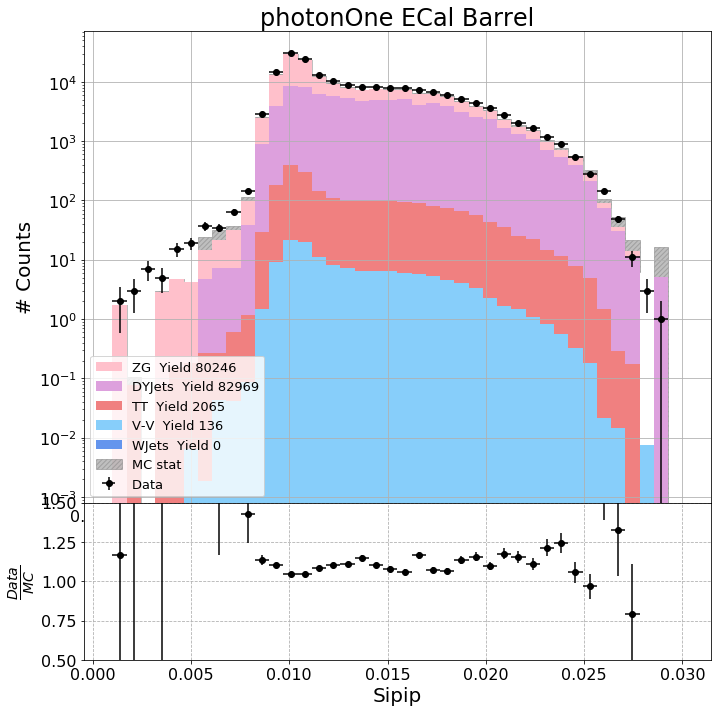

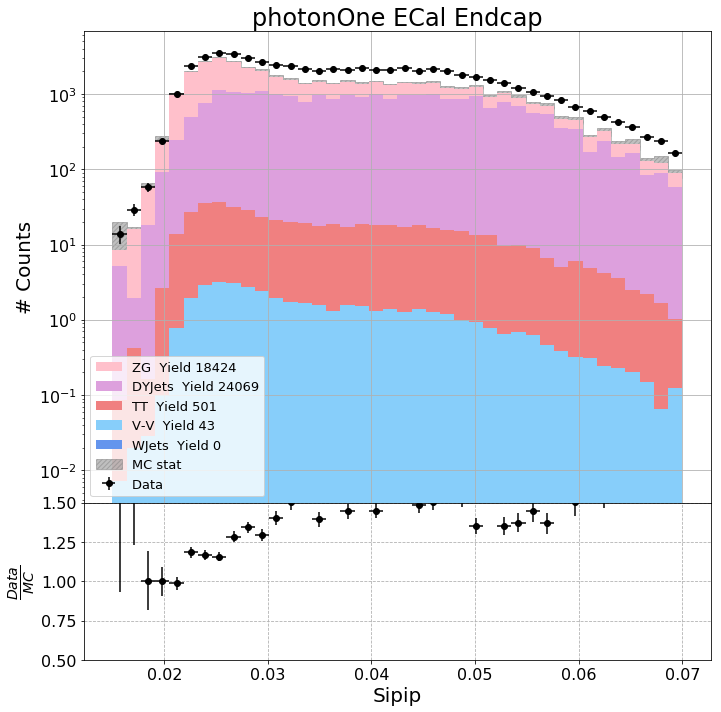

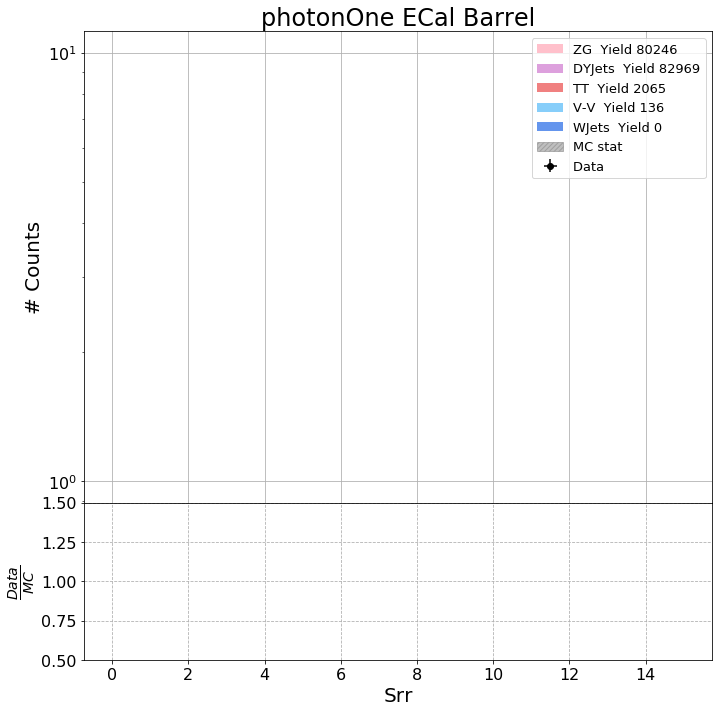

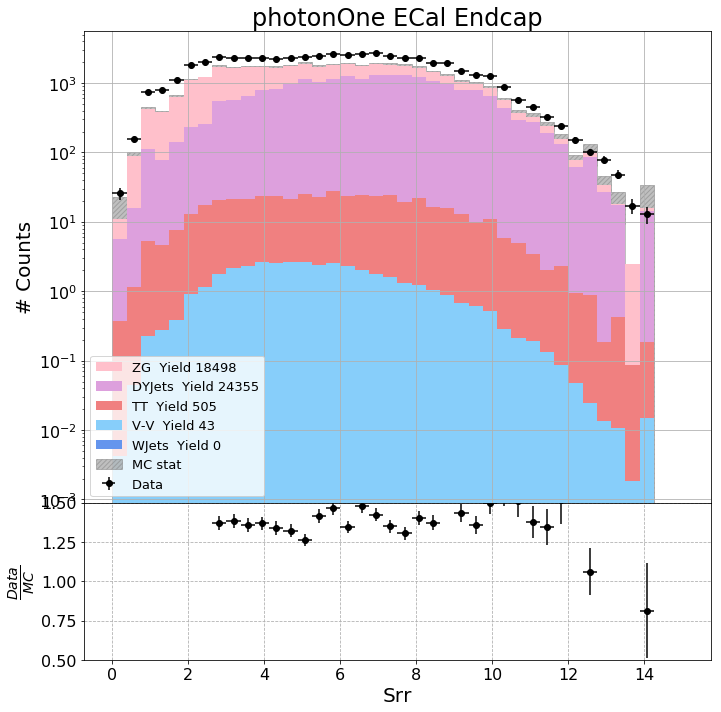

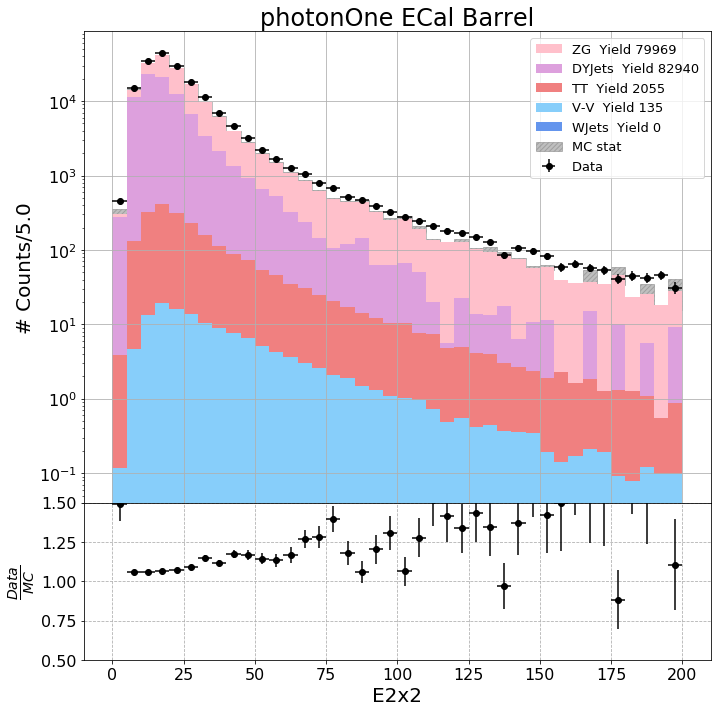

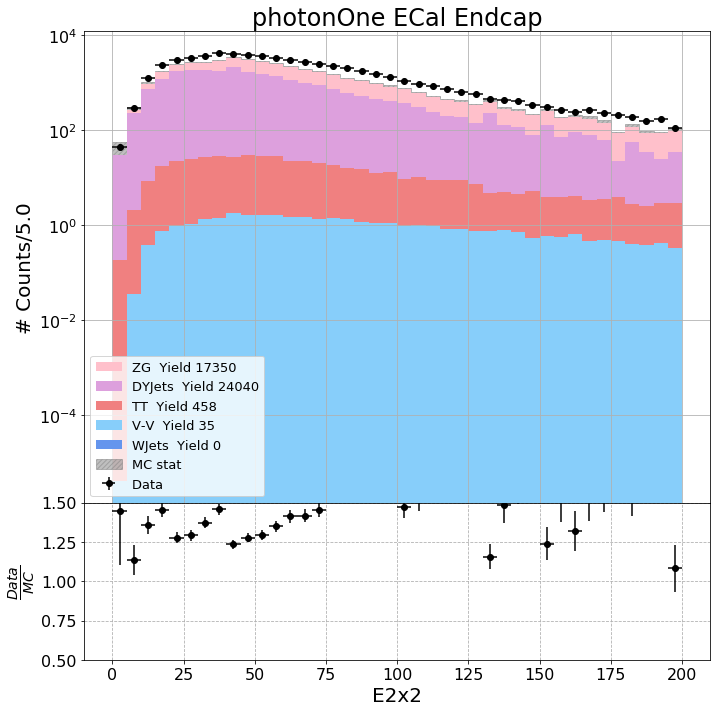

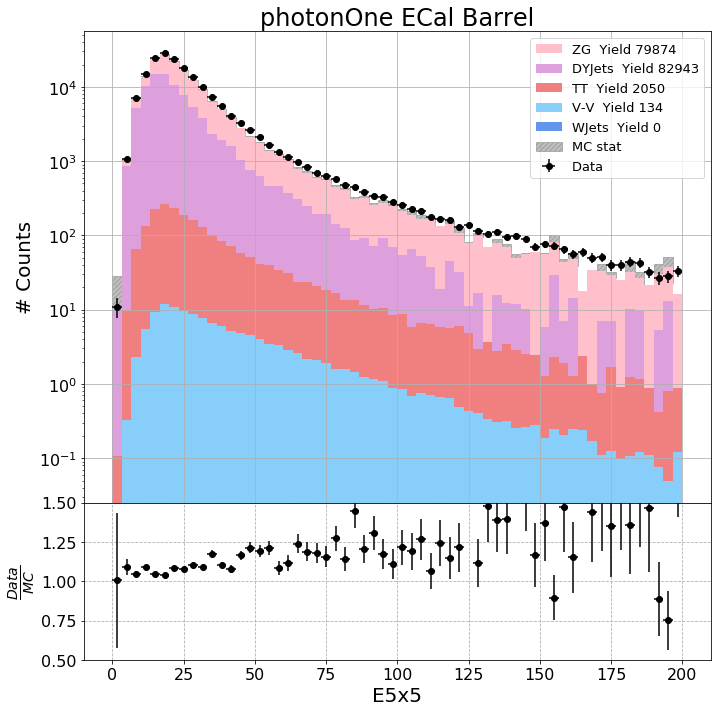

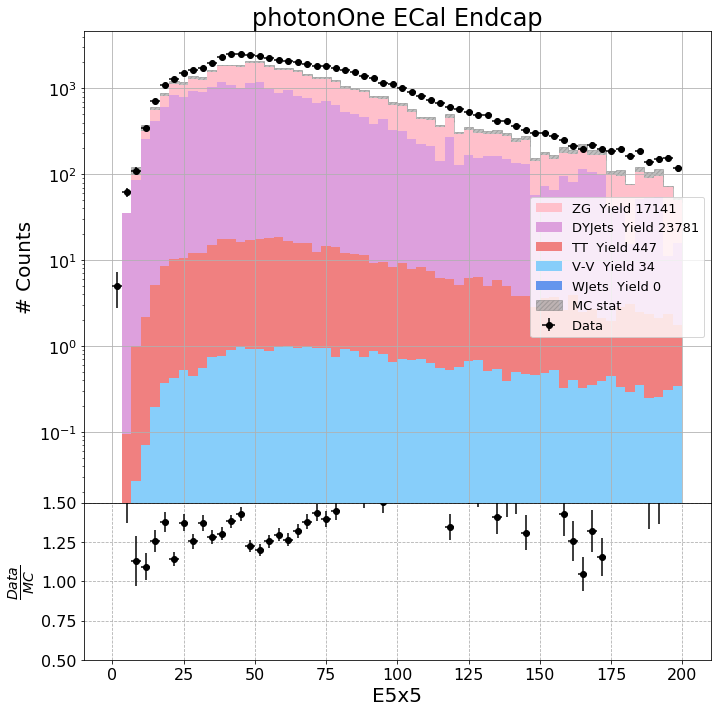

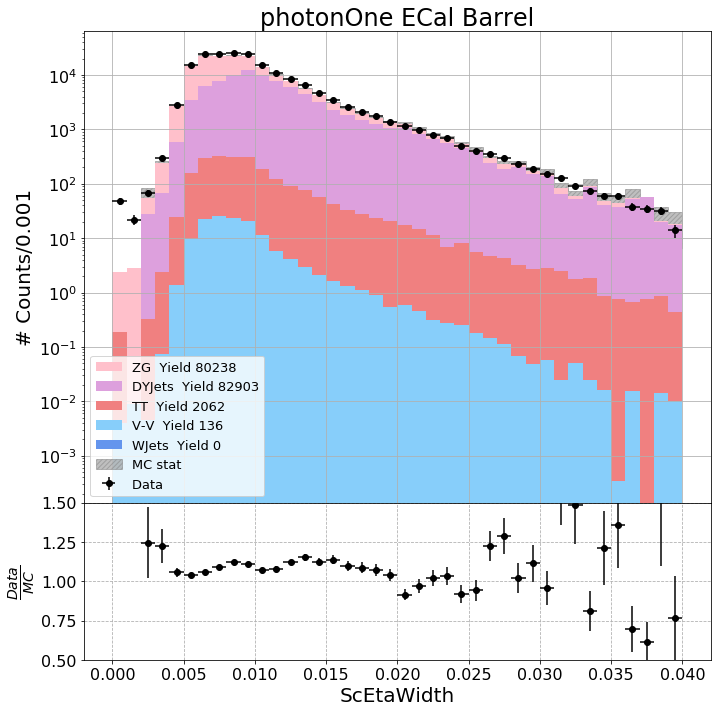

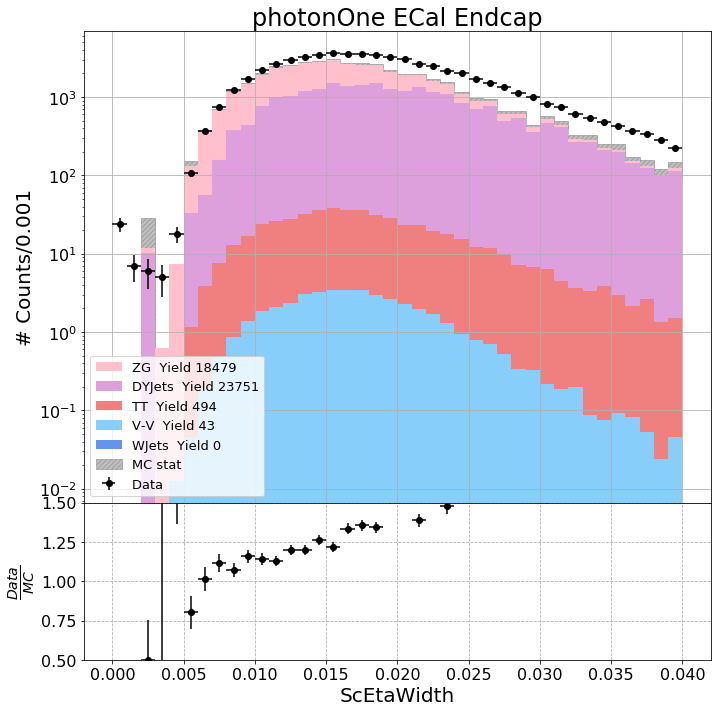

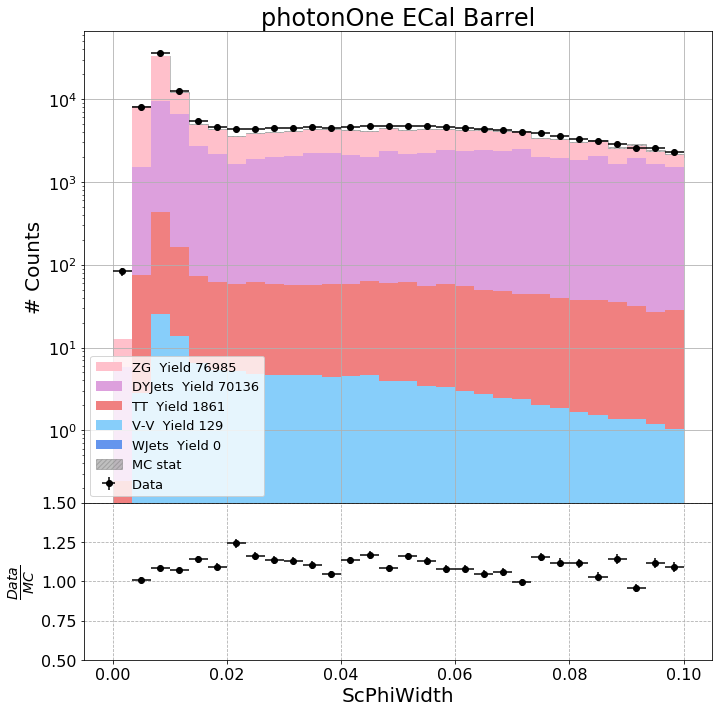

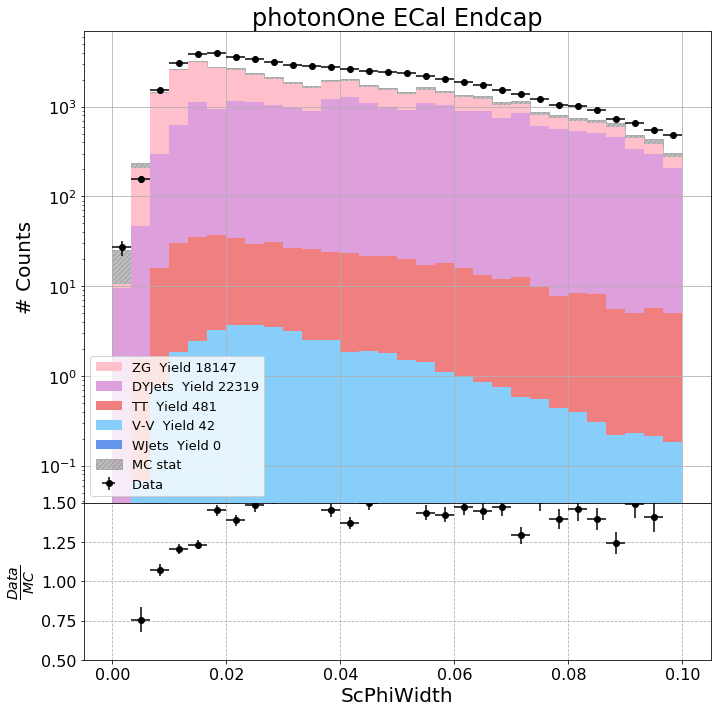

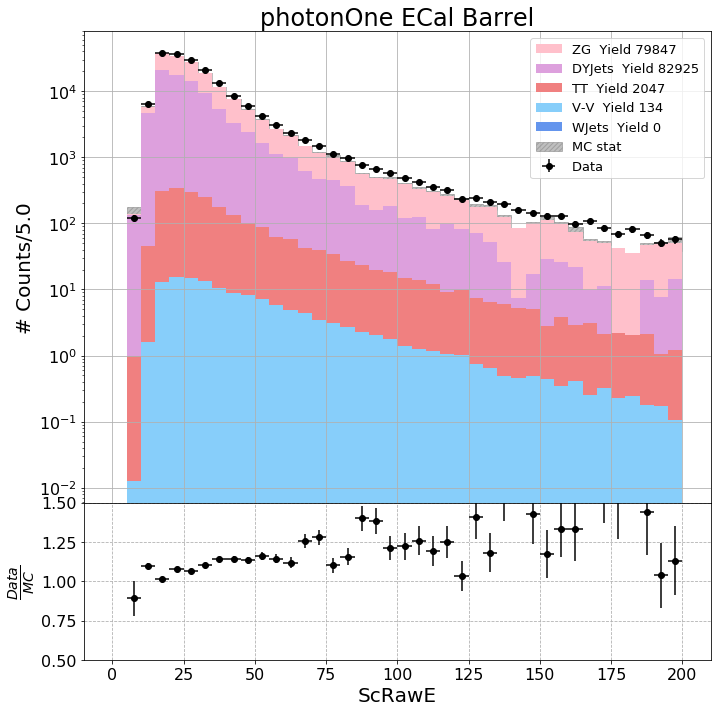

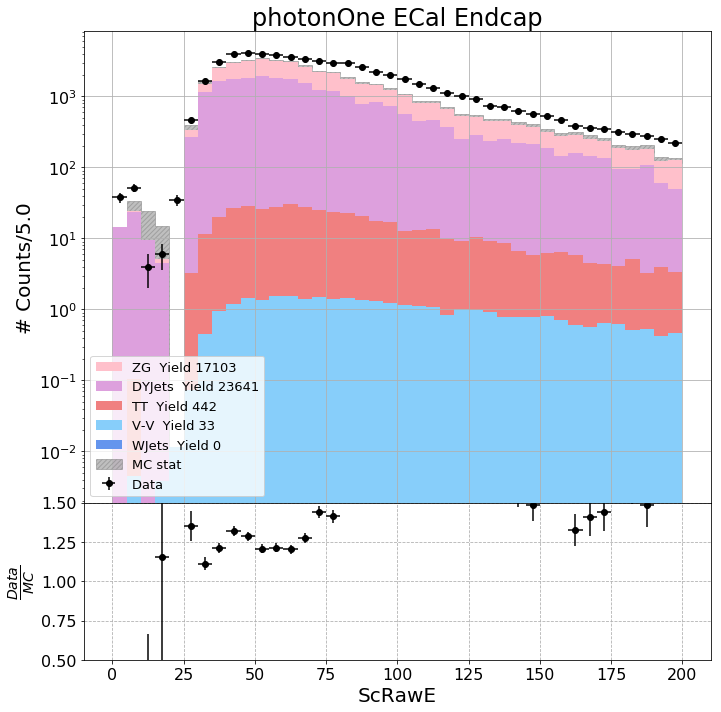

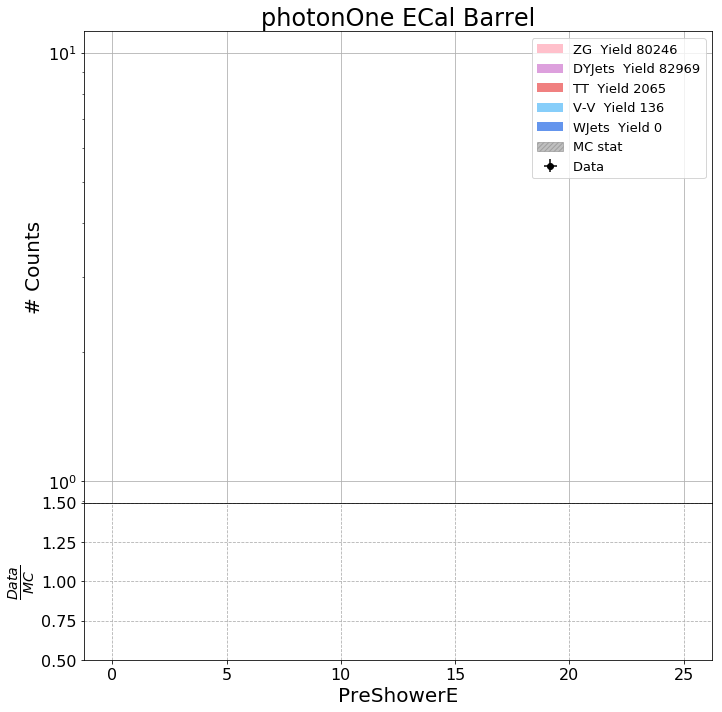

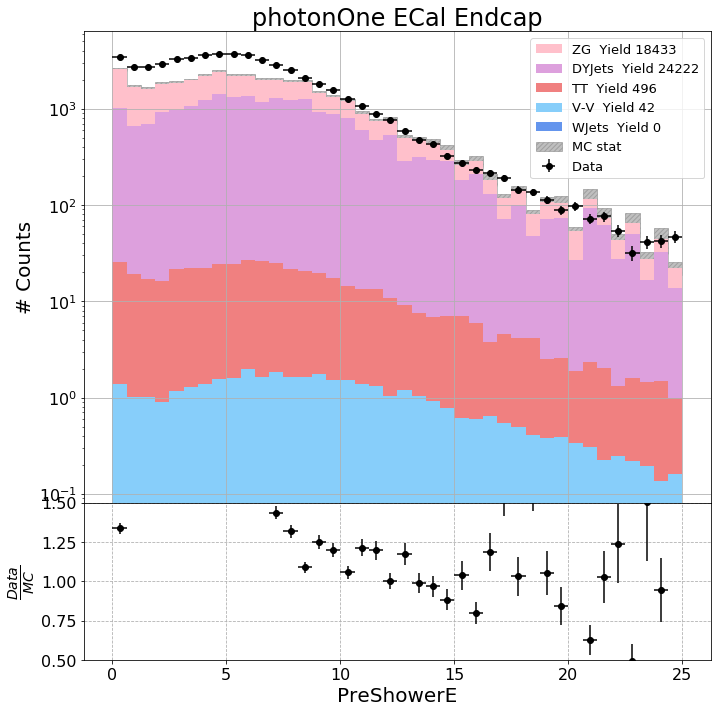

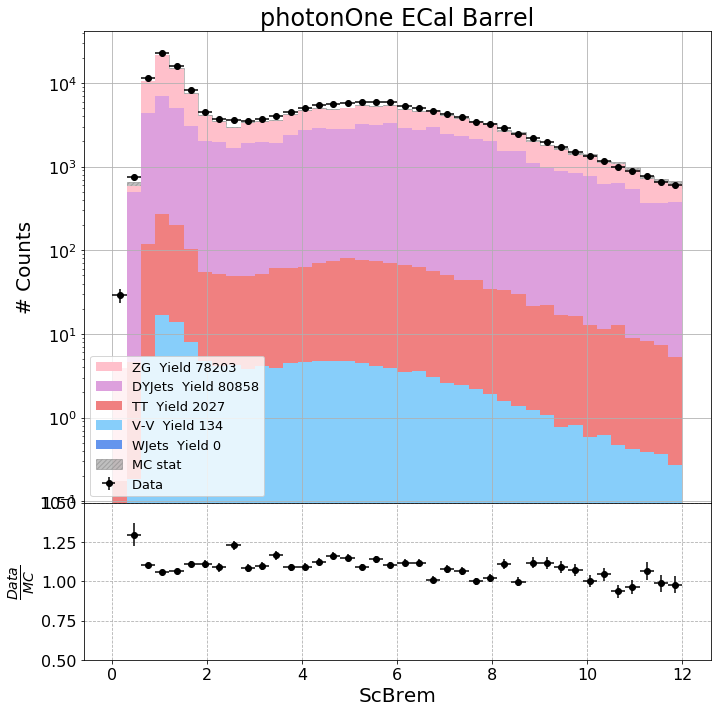

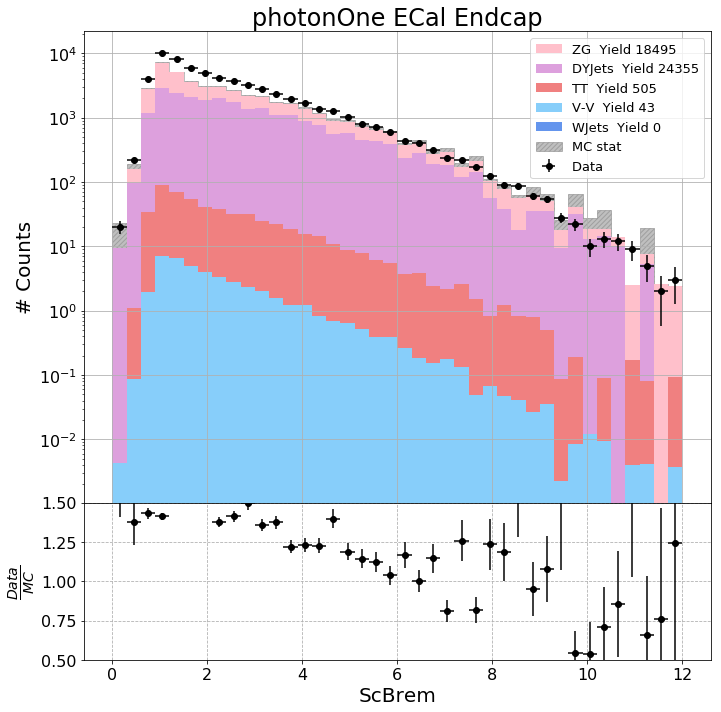

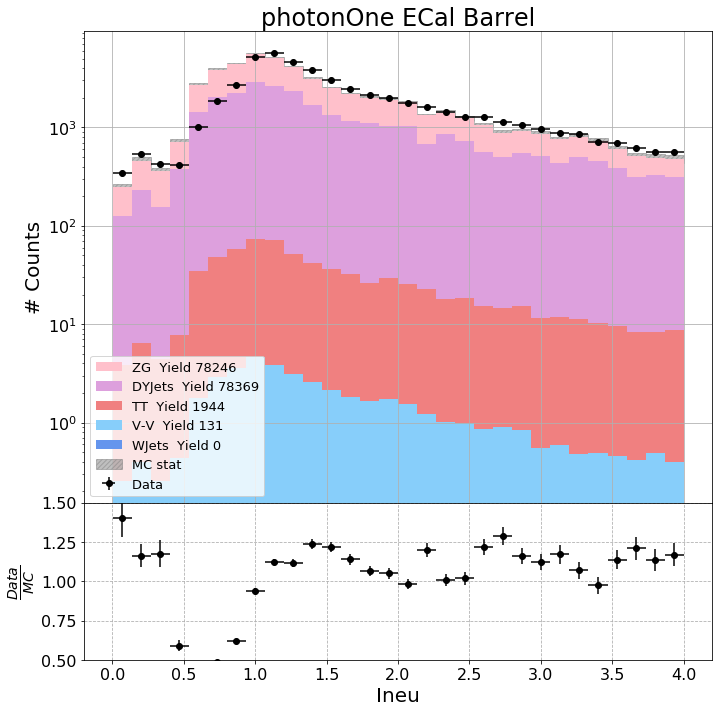

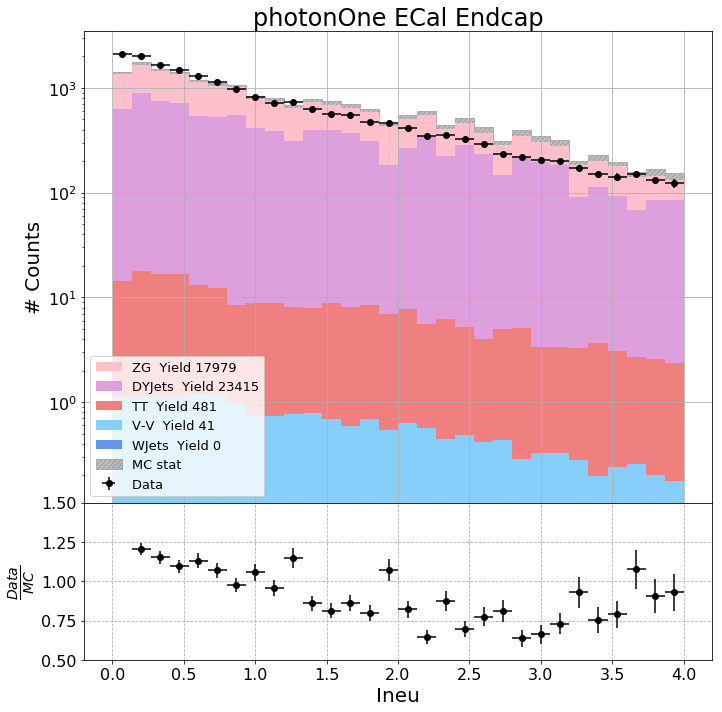

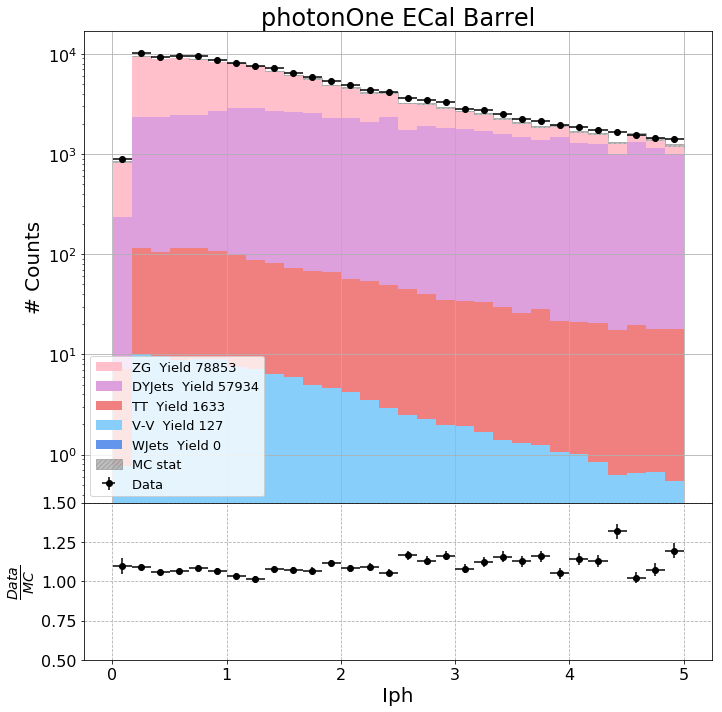

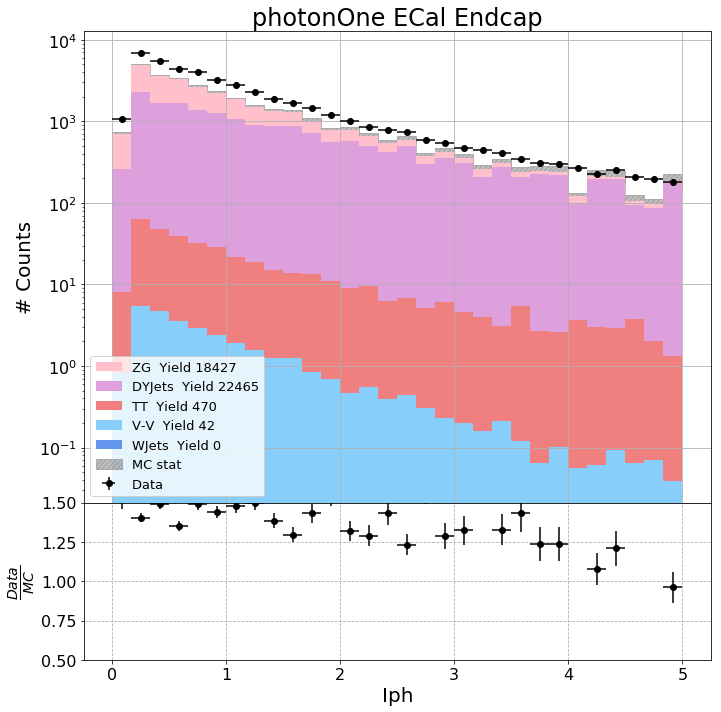

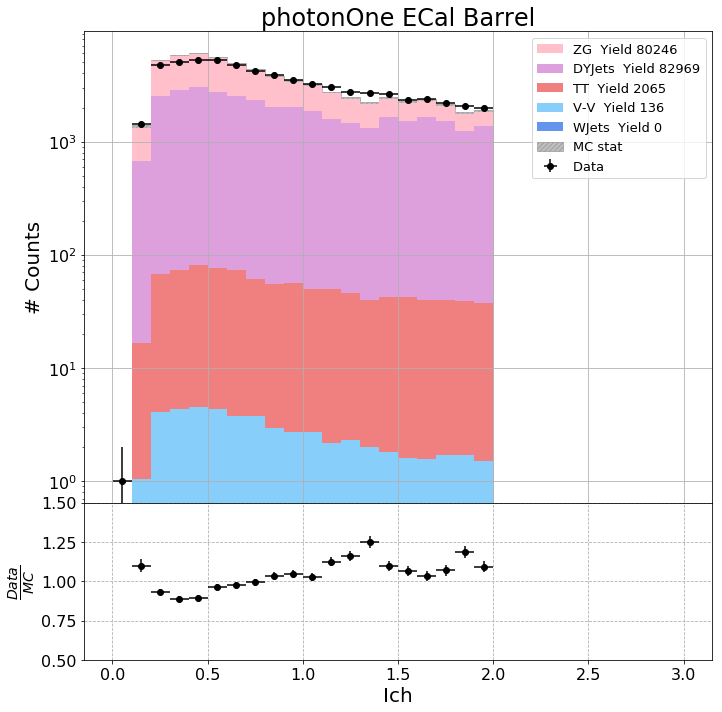

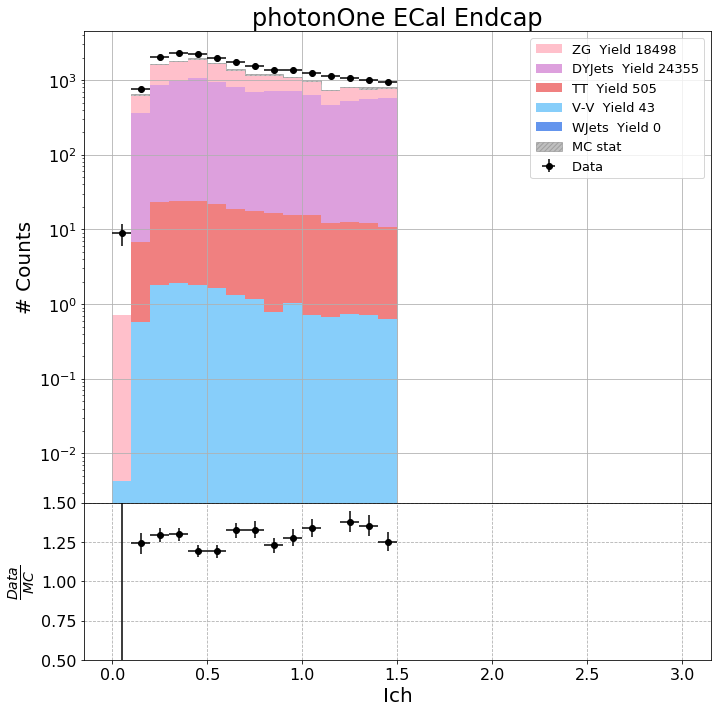

KeyError: 'ERes'

In [85]:
for log in [True,False]:
    for v in ['R9','HoverE',
              'Sieie','Sieip','Sipip','Srr',
              'E2x2','E5x5',
              'ScEtaWidth','ScPhiWidth',
              'ScRawE','PreShowerE','ScBrem',
              'Ineu','Iph','Ich',
              'ERes',]:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType+SampleSet,
                            );

In [ ]:
for log in [True,False]:
    for v in ['Sieie']:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType+SampleSet,
                            );

In [ ]:
for log in [True,False]:
    for v in ['Phi','Eta','Phi']:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType+SampleSet,
                            );

In [ ]:
for log in [True,False]:
    for v in ['DPhi','DEta','DR']:
        for phType in ['_EB','_EE']:
            for p in ['l1Photon'+phType,'l2Photon'+phType,'dilepton'+phType,'dileptonPhoton'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = True,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             Print            = Print,
                             index            = Region+'_'+phType,
                            );